In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
#from sklearn_extra.cluster import KMedoids # pip install scikit-learn-extra

import matplotlib.pyplot as plt



In [56]:
data = pd.read_csv('ar41_for_ulb_cleaned.csv', delimiter=';')

## Scaling

In [57]:
# Select the relevant columns for clustering
features = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
            'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
            'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
            'precipitation', 'windspeed_10m', 'sum_pollen']


# drop timestamp feature
#data = data.drop(columns=['timestamps_UTC'])

# Extract the selected features from the DataFrame
X = data[features]

# Standardize (robust) the data
Robustscaler = RobustScaler() # Test with robust scaler
X_Robustscaled = Robustscaler.fit_transform(X)

# Standardize (standard) the data
standardscaler = StandardScaler()
X_Standardscaled = standardscaler.fit_transform(X)



## K-means

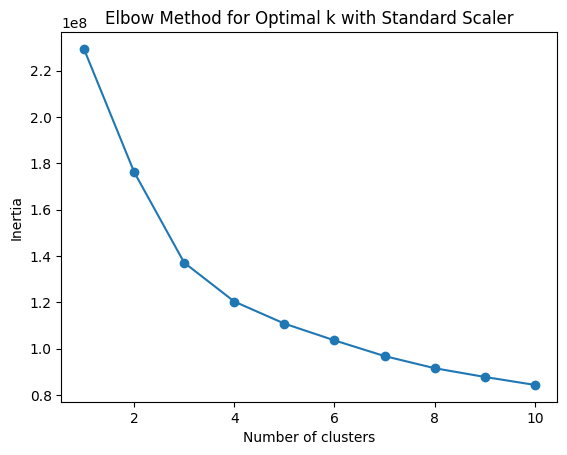

In [58]:
# Find the optimal number of clusters using the Elbow method


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X_Robustscaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k with Robust Scaler')
plt.show()

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X_Standardscaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k with Standard Scaler')
plt.show()



In [119]:
# Choose an appropriate number of clusters (k) based on the Elbow curve
k = 2  # Adjust this value based on the Elbow curve

# Fit the K-means model
kmeansRobust = KMeans(n_clusters=k, random_state=0)
kmeansRobust.fit(X_Robustscaled)

k = 4  # Adjust this value based on the Elbow curve
kmeansStandard = KMeans(n_clusters=k, random_state=0)
kmeansStandard.fit(X_Standardscaled)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [120]:
# Add cluster labels to the original DataFrame
data['cluster_Robust'] = kmeansRobust.labels_

# Calculate the distance of each point to its assigned cluster center
data['distance_to_center_Robust'] = np.min(kmeansRobust.transform(X_Robustscaled), axis=1)

# Add cluster labels to the original DataFrame
data['cluster_Standard'] = kmeansStandard.labels_

# Calculate the distance of each point to its assigned cluster center
data['distance_to_center_Standard'] = np.min(kmeansStandard.transform(X_Standardscaled), axis=1)

In [ ]:
"""
max_temp_air = 65
max_temp_water = 100
max_temp_oil = 115

min_temp = 2

# Get cluster centroids
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame to hold the cluster centroids
cluster_centroids_df = pd.DataFrame(cluster_centers, columns=features)

# Define acceptable ranges for each feature
acceptable_ranges = {
    'RS_E_InAirTemp_PC1': (min_temp, max_temp_air),
    'RS_E_InAirTemp_PC2': (min_temp, max_temp_air),
    'RS_E_WatTemp_PC1': (min_temp, max_temp_water),
    'RS_E_WatTemp_PC2': (min_temp, max_temp_water),
    'RS_T_OilTemp_PC1': (min_temp, max_temp_oil),
    'RS_T_OilTemp_PC2': (min_temp, max_temp_oil),
}

# Check for clusters with centroids outside acceptable ranges
abnormal_clusters = []
for cluster_idx, centroid in enumerate(cluster_centers):
    is_abnormal = False
    for feature, (min_value, max_value) in acceptable_ranges.items():
        if centroid[features.index(feature)] < min_value or centroid[features.index(feature)] > max_value:
            is_abnormal = True
            break
    if is_abnormal:
        abnormal_clusters.append(cluster_idx)

abnormal_clusters
"""

In [ ]:
"""
feature1 = 'RS_E_InAirTemp_PC1'
feature2 = 'RS_E_InAirTemp_PC2'

plt.figure(figsize=(8, 6))
plt.scatter(data[feature1], data[feature2], c=data['cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()
"""

Moyenne des clusters

In [121]:
means = data.groupby('cluster_Robust').mean()
means



/var/folders/fj/rsg75z_s7cq8mvy8kr0fb2ym0000gn/T/ipykernel_20022/938507153.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby('cluster_Robust').mean()


mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
cluster_Robust                                                           
0                  150.398202  50.856209  4.211245           28.600615   
1                  151.679374  50.934994  4.285085           36.729107   

                RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
cluster_Robust                                                             
0                        28.596803         253.541057         261.639193   
1                        36.917638         372.128324         381.366095   

                RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  ...  \
cluster_Robust                                                ...   
0                 810.089789    809.951414         77.364515  ...   
1                1591.579291   1593.489794         83.662206  ...   

                RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  temperature  \
cluster_Robust                                                    
0                      76.074155         75.647129    12.374756   
1                      85.016255         84.930425    13.021023   

                precipitation  windspeed_10m  sum_pollen  cluster_Standard  \
cluster_Robust                                                               
0                    0.102640      13.295779   17.601001          1.627445   
1                    0.107279      13.507855   17.790671          1.998869   

                distance_to_center_Robust  distance_to_center_Standard  \
cluster_Robust                                                           
0                                4.056623                     2.357339   
1                               13.432959                     2.609515   

                   month  
cluster_Robust            
0               4.895299  
1               4.951478  

[2 rows x 21 columns]

In [122]:
means = data.groupby('cluster_Standard').mean()
means

/var/folders/fj/rsg75z_s7cq8mvy8kr0fb2ym0000gn/T/ipykernel_20022/3950800550.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby('cluster_Standard').mean()


mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
cluster_Standard                                                           
0                    149.885058  50.798240  4.204006           15.913022   
1                    150.641821  50.866480  4.190368           36.550122   
2                    151.318344  50.917864  4.285484           37.158895   
3                    150.438104  50.869969  4.241935           20.919720   

                  RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
cluster_Standard                                                             
0                          15.568426         396.811531         402.147483   
1                          36.293914         219.909964         223.689580   
2                          37.396158         379.999373         389.704727   
3                          21.340696         251.220325         265.913961   

                  RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  ...  \
cluster_Standard                                                ...   
0                   807.583349    807.724619         54.888245  ...   
1                   814.064318    814.465777         82.748059  ...   
2                  1571.265443   1572.623215         83.910221  ...   
3                   812.190137    811.554200         76.397577  ...   

                  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  temperature  \
cluster_Standard                                                    
0                        47.716591         46.789646     9.354528   
1                        83.032204         82.986746    16.221637   
2                        85.192073         85.165814    13.214669   
3                        74.702930         73.848931     7.747758   

                  precipitation  windspeed_10m  sum_pollen  cluster_Robust  \
cluster_Standard                                                             
0                      0.086931      13.191080   16.149440        0.013266   
1                      0.116547      13.137667   22.831720        0.004131   
2                      0.108775      13.545658   18.020002        0.952570   
3                      0.086823      13.523338   10.531875        0.013127   

                  distance_to_center_Robust  distance_to_center_Standard  \
cluster_Standard                                                           
0                                  7.386362                     3.195512   
1                                  3.801481                     2.129674   
2                                 13.224407                     2.667210   
3                                  3.465147                     2.383217   

                     month  
cluster_Standard            
0                 4.276564  
1                 5.866785  
2                 5.013139  
3                 3.675604  

[4 rows x 21 columns]

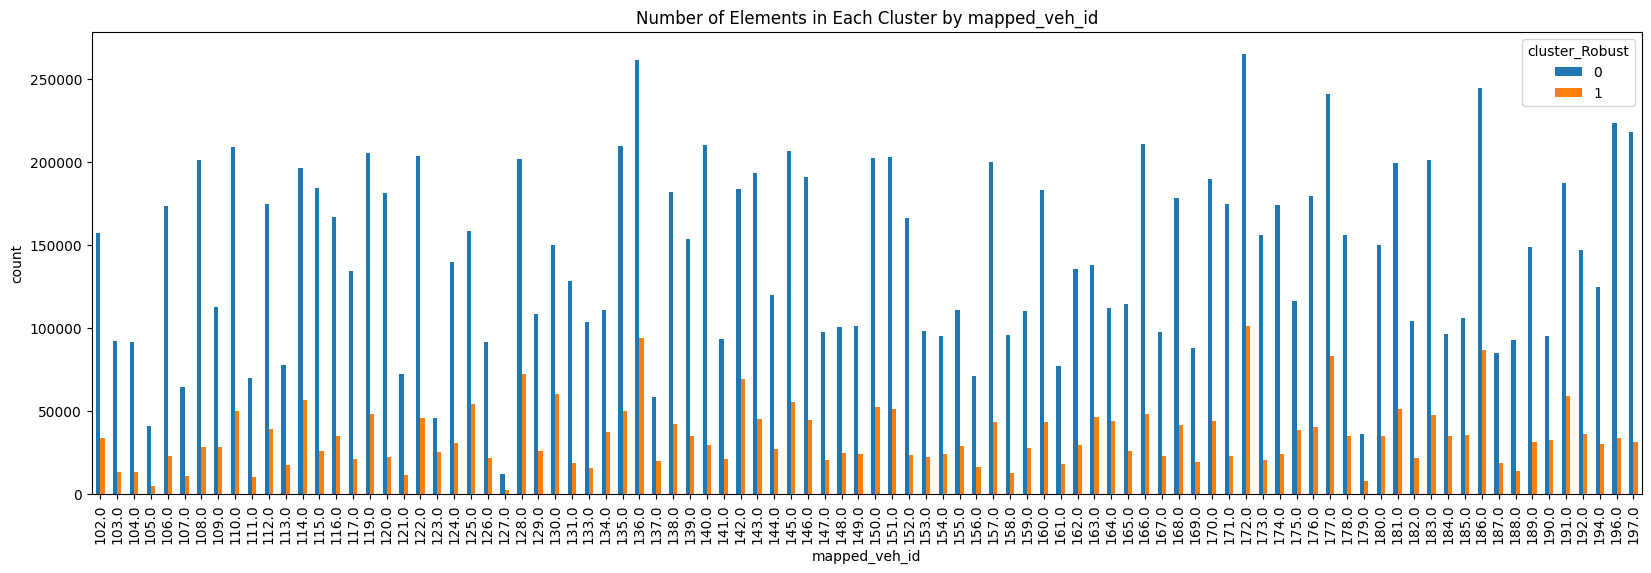

In [123]:
# Group the data by 'mapped_veh_id' and 'cluster_Robust' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'cluster_Robust']).size().reset_index(name='count')

# Pivot the data to have 'mapped_veh_id' as the index, 'cluster_Robust' as the columns, and 'count' as the values
pivot_data = cluster_elements.pivot(index='mapped_veh_id', columns='cluster_Robust', values='count')

# Plot the bar graph
pivot_data.plot(kind='bar', stacked=False, figsize=(20, 6))
plt.xlabel('mapped_veh_id')
plt.ylabel('count')
plt.title('Number of Elements in Each Cluster by mapped_veh_id')
plt.show()


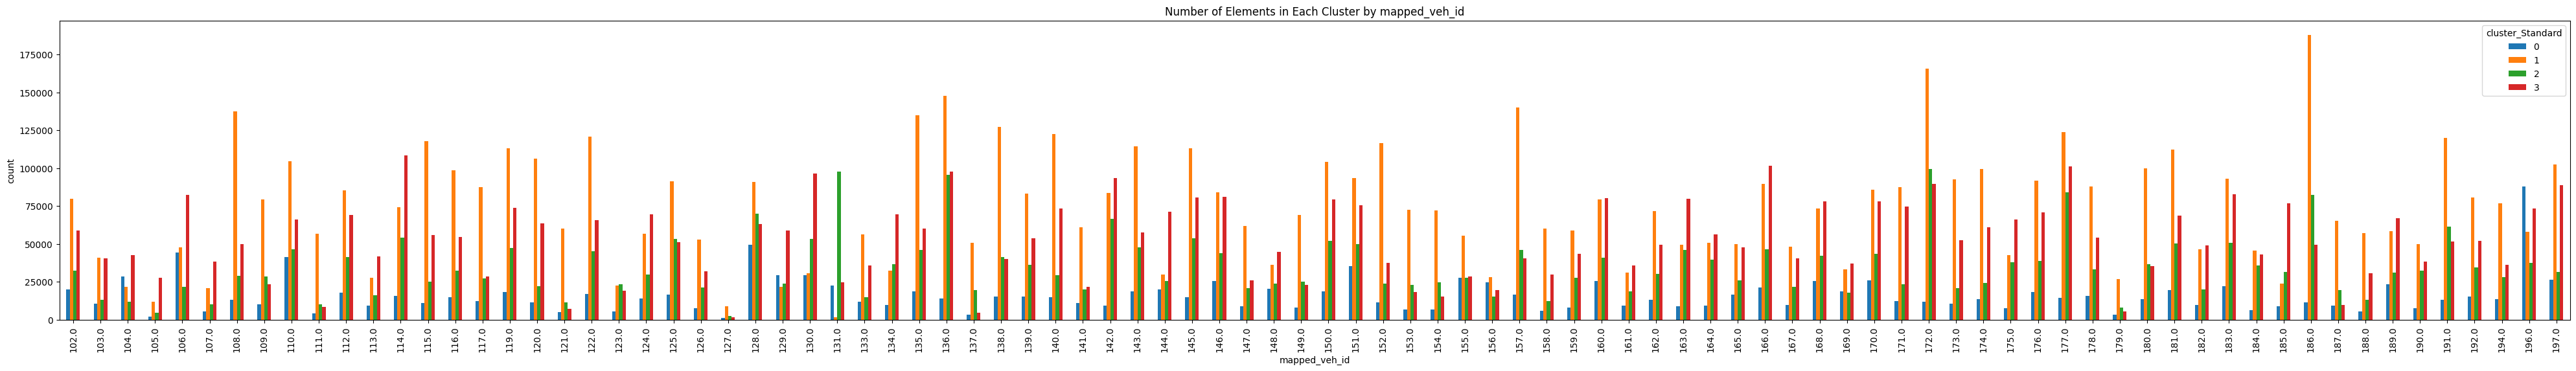

In [108]:
# Group the data by 'mapped_veh_id' and 'cluster_Standard' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'cluster_Standard']).size().reset_index(name='count')

# Pivot the data to have 'mapped_veh_id' as the index, 'cluster_Standard' as the columns, and 'count' as the values
pivot_data = cluster_elements.pivot(index='mapped_veh_id', columns='cluster_Standard', values='count')

# Plot the bar graph
pivot_data.plot(kind='bar', stacked=False, figsize=(50, 6))
plt.xlabel('mapped_veh_id')
plt.ylabel('count')
plt.title('Number of Elements in Each Cluster by mapped_veh_id')
plt.show()

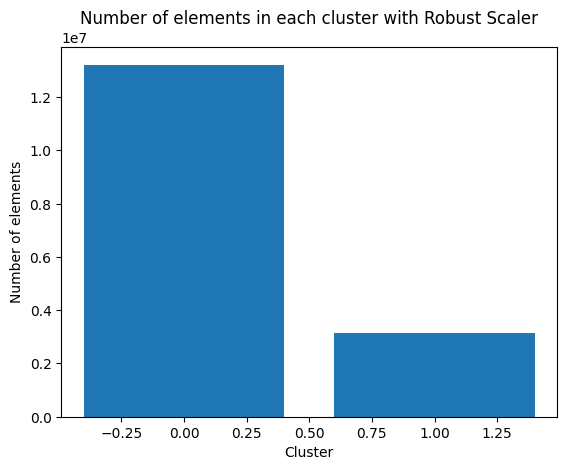

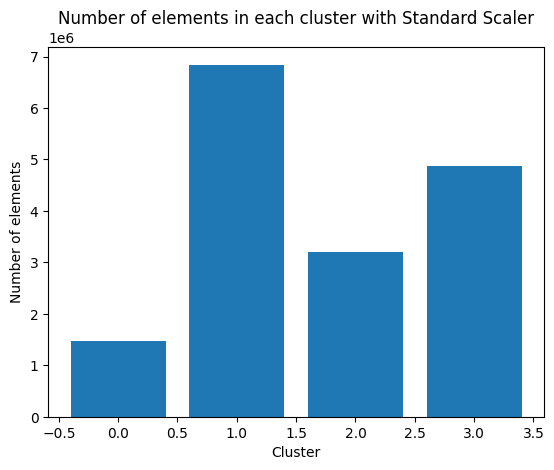

In [124]:
# count the number of elements in each cluster
cluster_elements = data.groupby(['cluster_Robust']).size().reset_index(name='count')
# plot the results
plt.bar(cluster_elements['cluster_Robust'], cluster_elements['count'])
plt.xlabel('Cluster')
plt.ylabel('Number of elements')
plt.title('Number of elements in each cluster with Robust Scaler')
plt.show()

# count the number of elements in each cluster
cluster_elements = data.groupby(['cluster_Standard']).size().reset_index(name='count')
# plot the results
plt.bar(cluster_elements['cluster_Standard'], cluster_elements['count'])
plt.xlabel('Cluster')
plt.ylabel('Number of elements')
plt.title('Number of elements in each cluster with Standard Scaler')
plt.show()


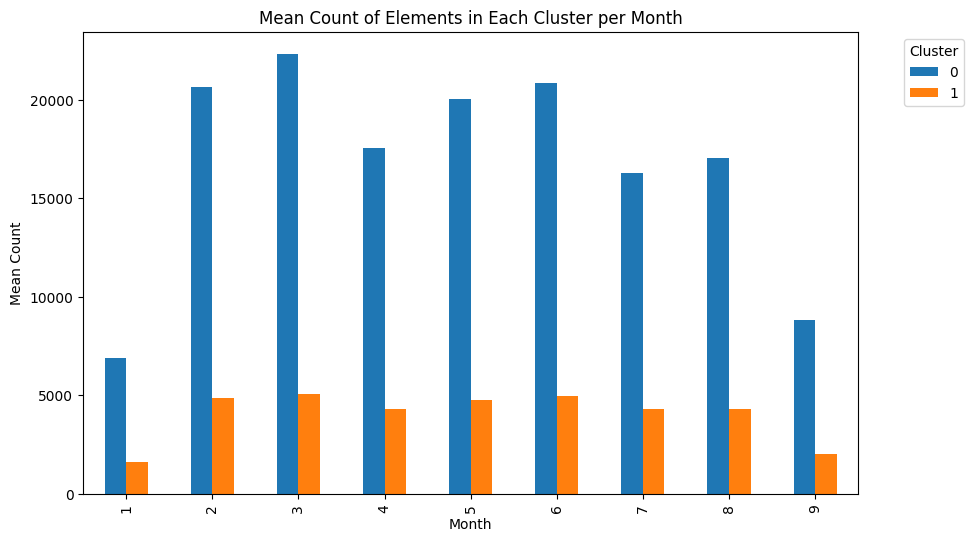

In [125]:
# Extract the month from the 'timestamps_UTC' column
data['month'] = pd.to_datetime(data['timestamps_UTC']).dt.month

# Group the data by 'mapped_veh_id', 'month', and 'cluster_Robust' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'month', 'cluster_Robust']).size().reset_index(name='count')

# Group by 'month' and 'cluster_Robust' and calculate the mean count
mean_count = cluster_elements.groupby(['month', 'cluster_Robust'])['count'].mean().reset_index()

# Pivot the data to have 'month' as the index, 'cluster_Robust' as the columns, and 'count' as the values
pivot_data = mean_count.pivot(index='month', columns='cluster_Robust', values='count')

# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the bar graph for mean count for each cluster per month
pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=custom_colors)
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.title('Mean Count of Elements in Each Cluster per Month')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

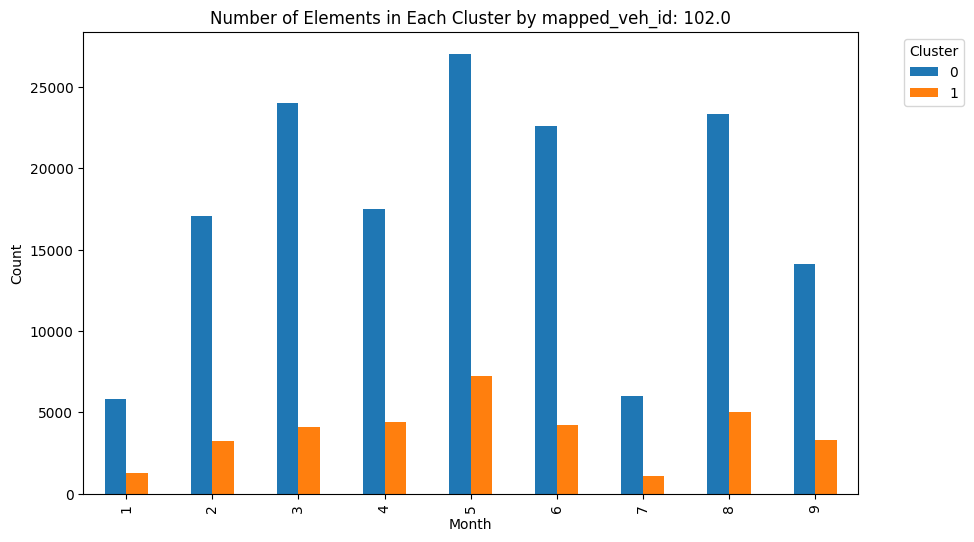

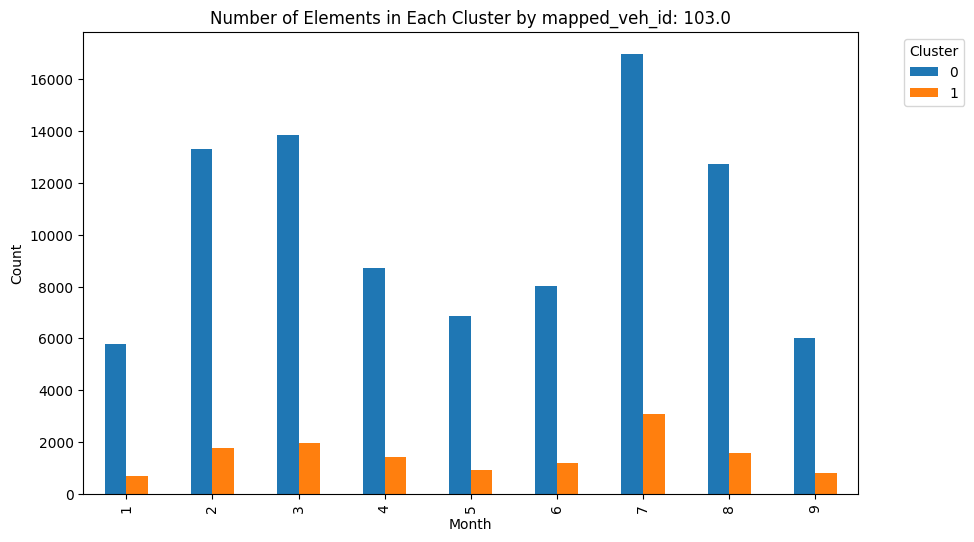

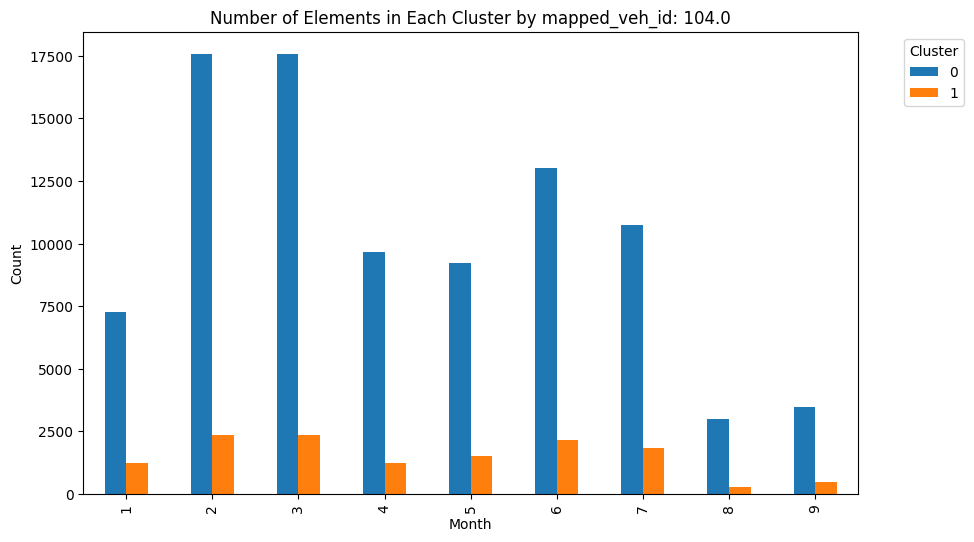

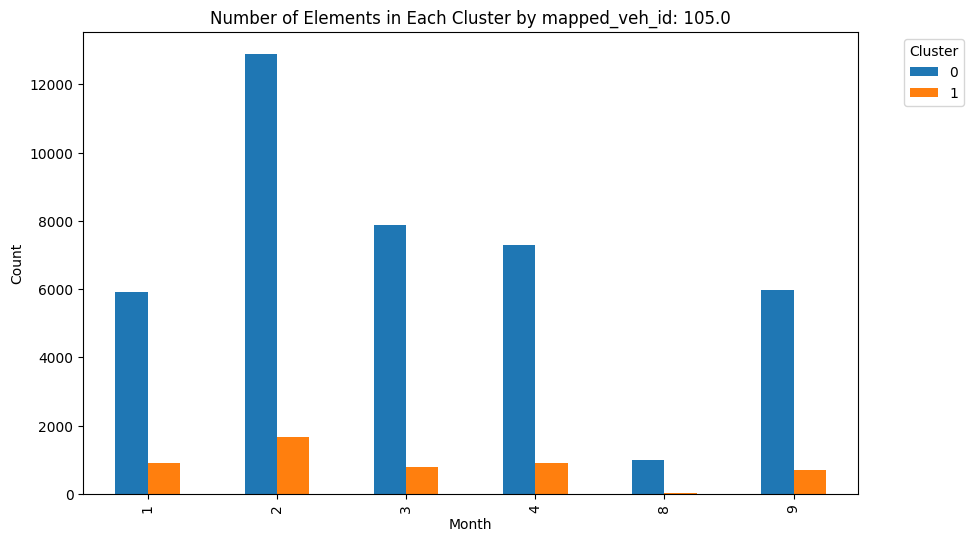

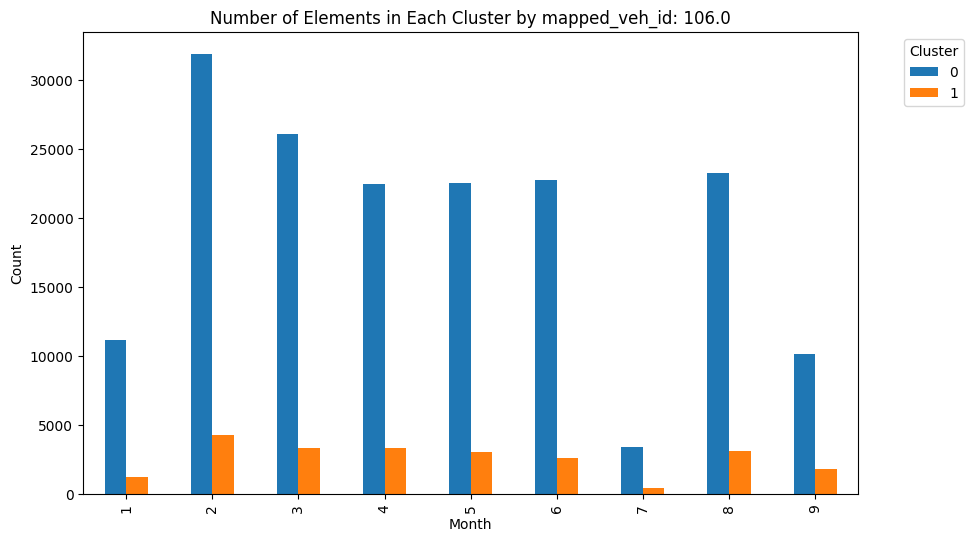

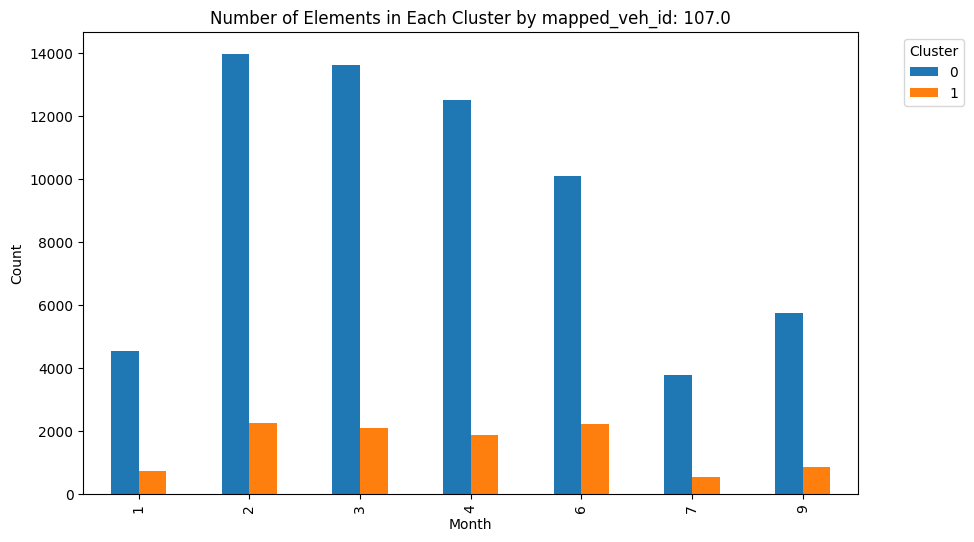

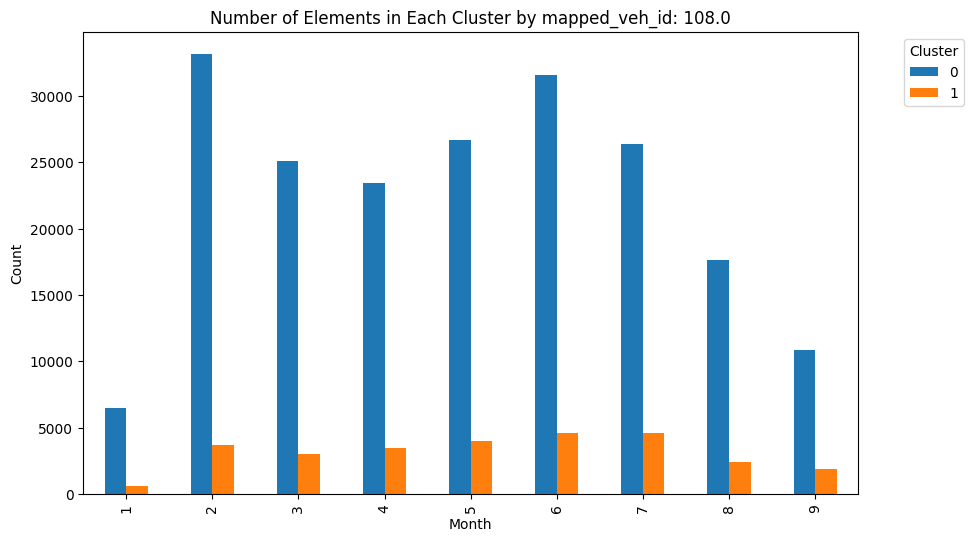

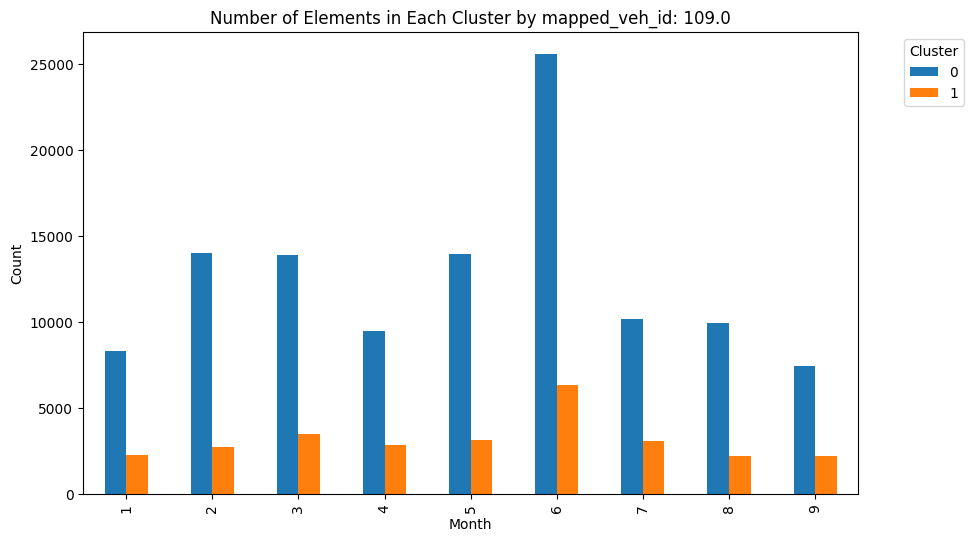

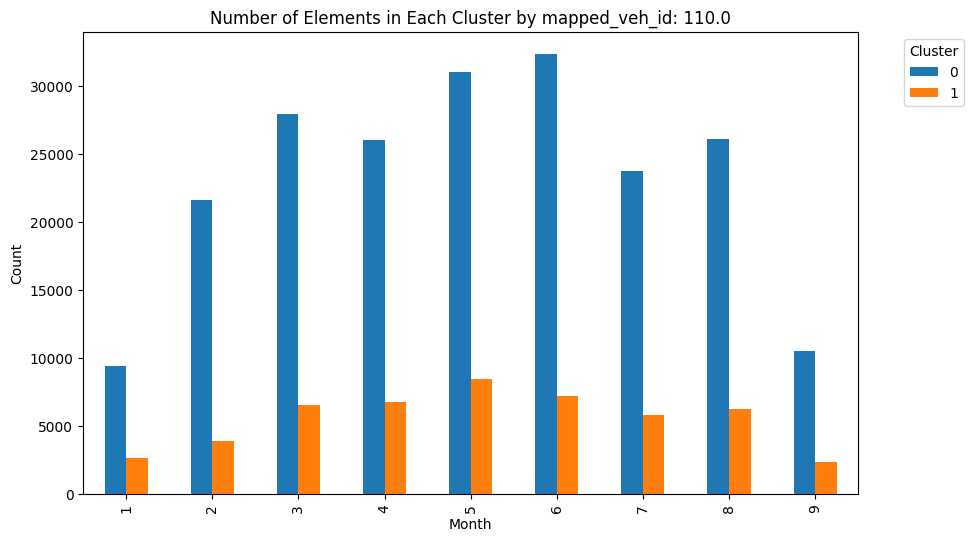

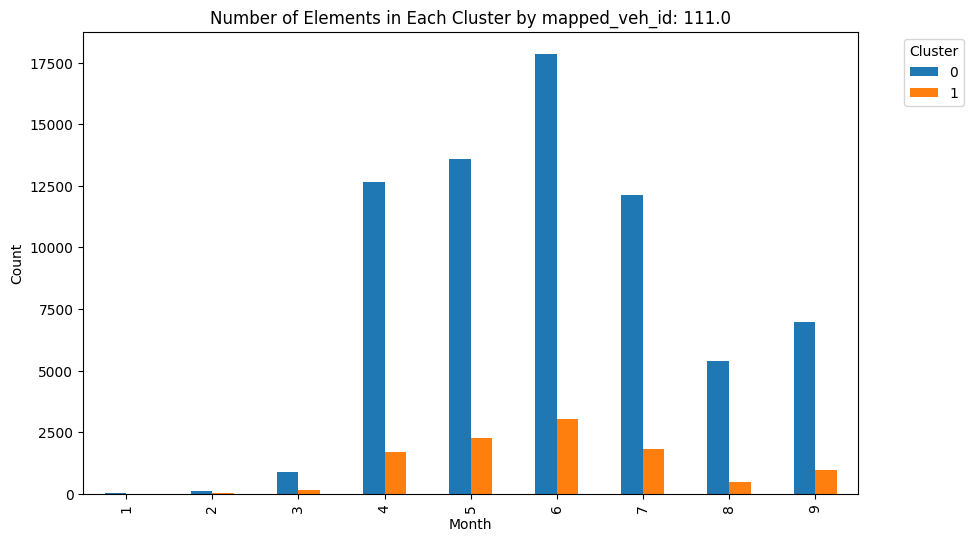

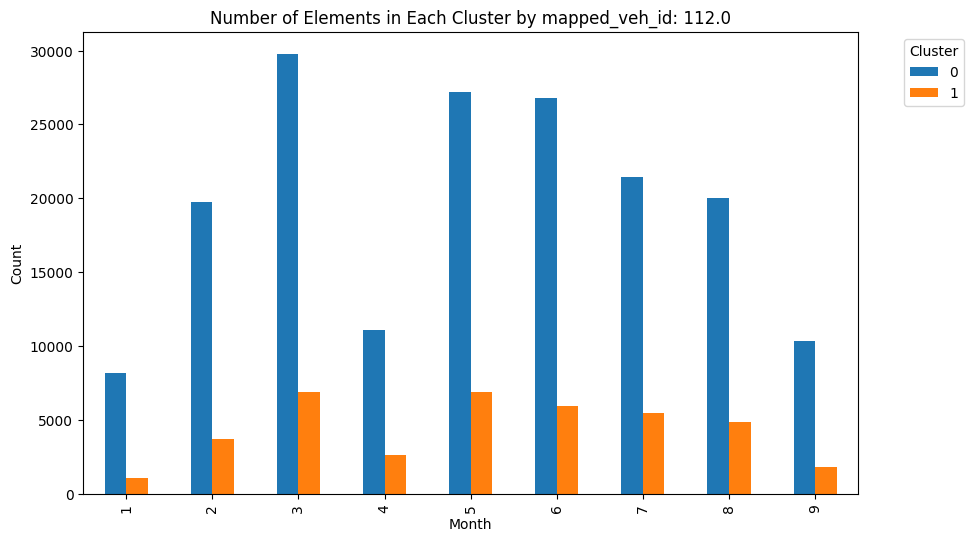

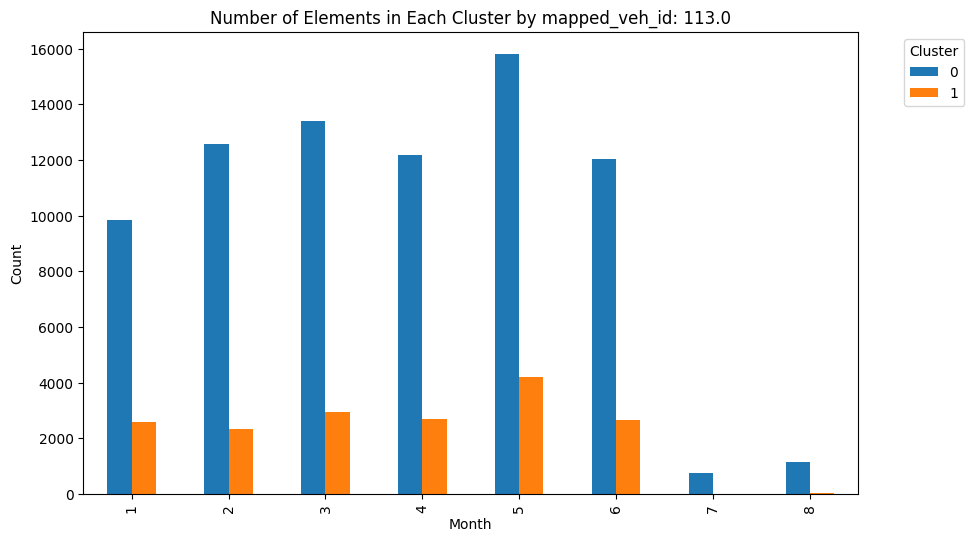

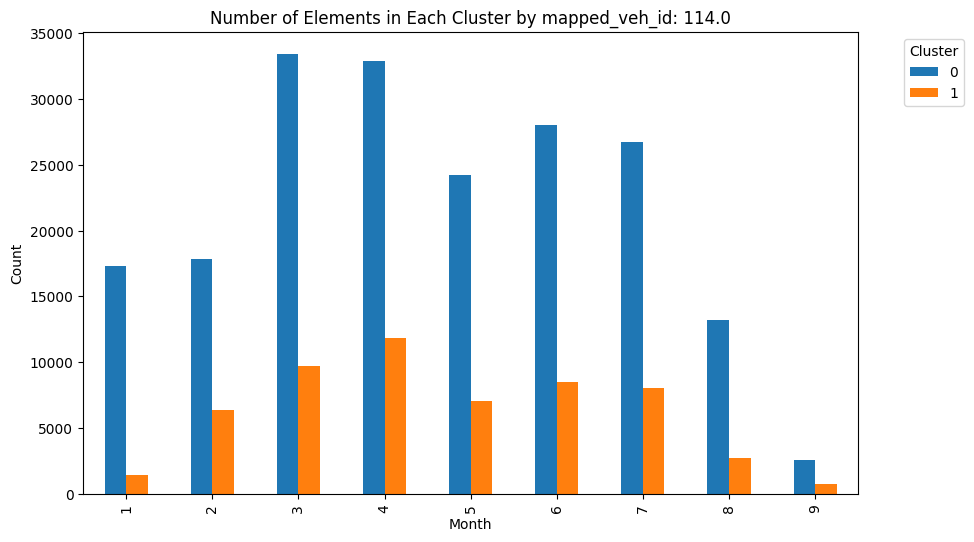

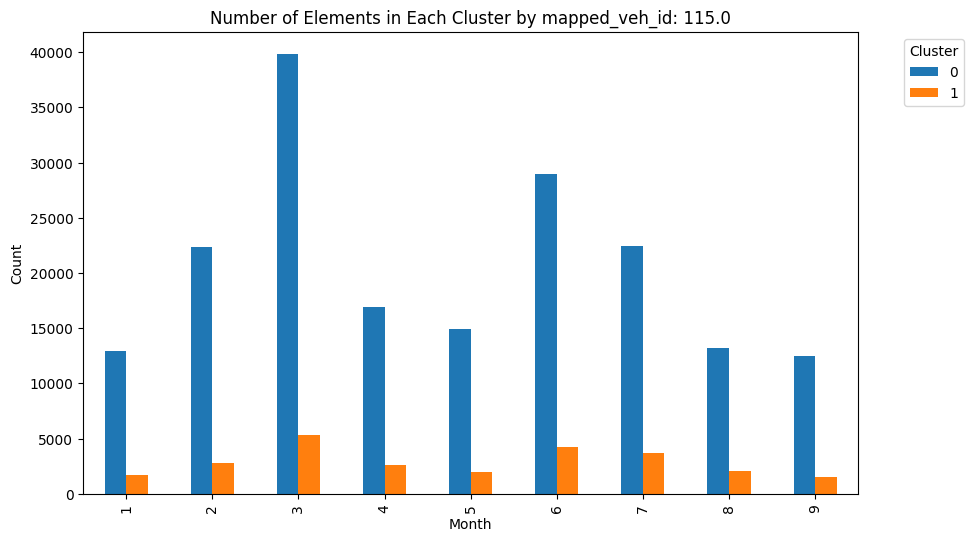

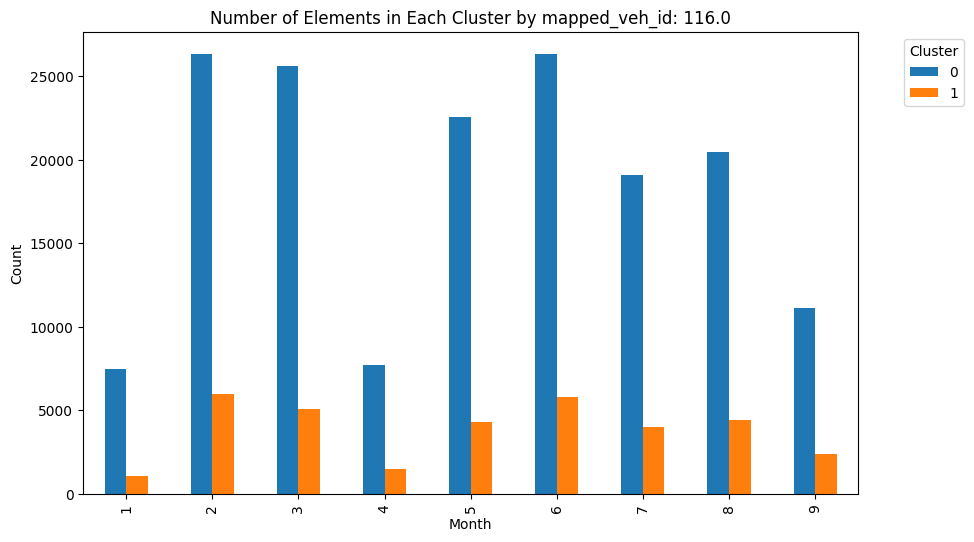

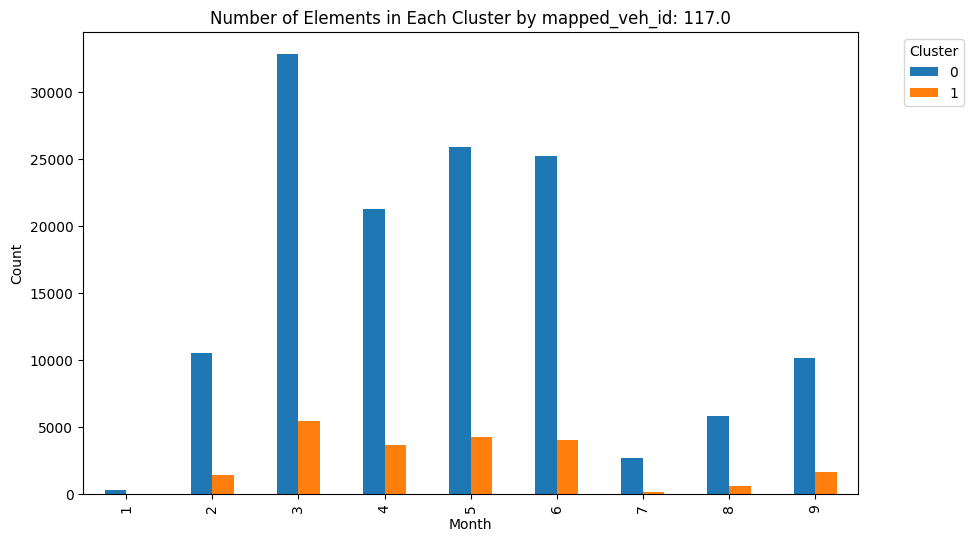

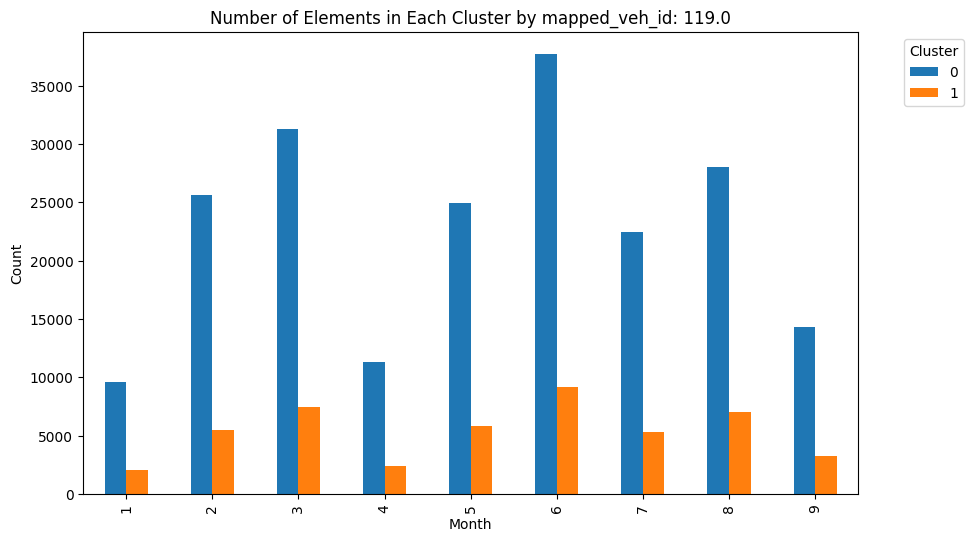

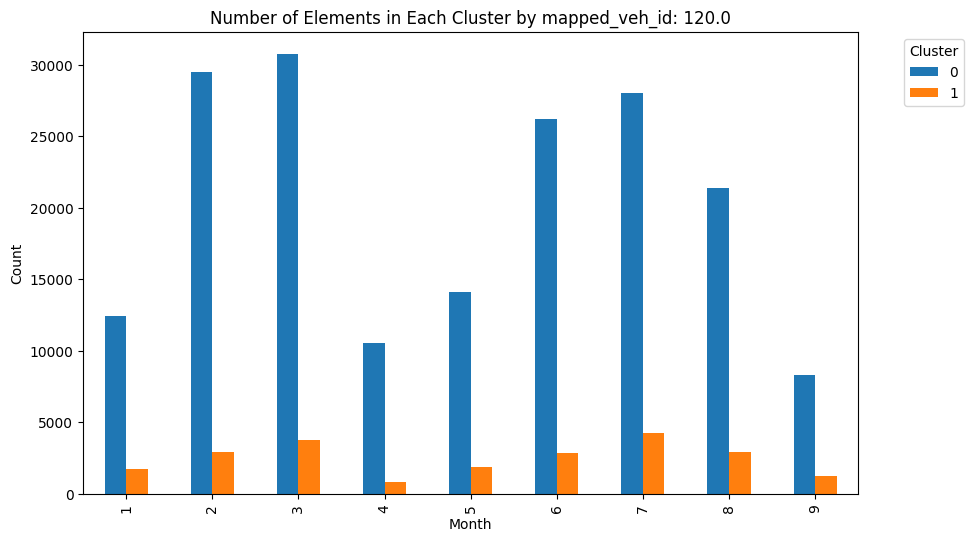

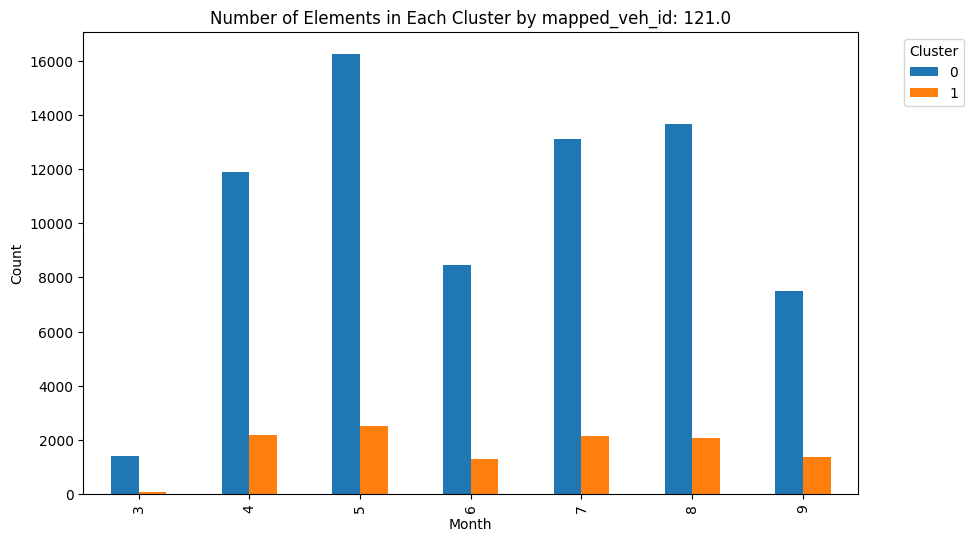

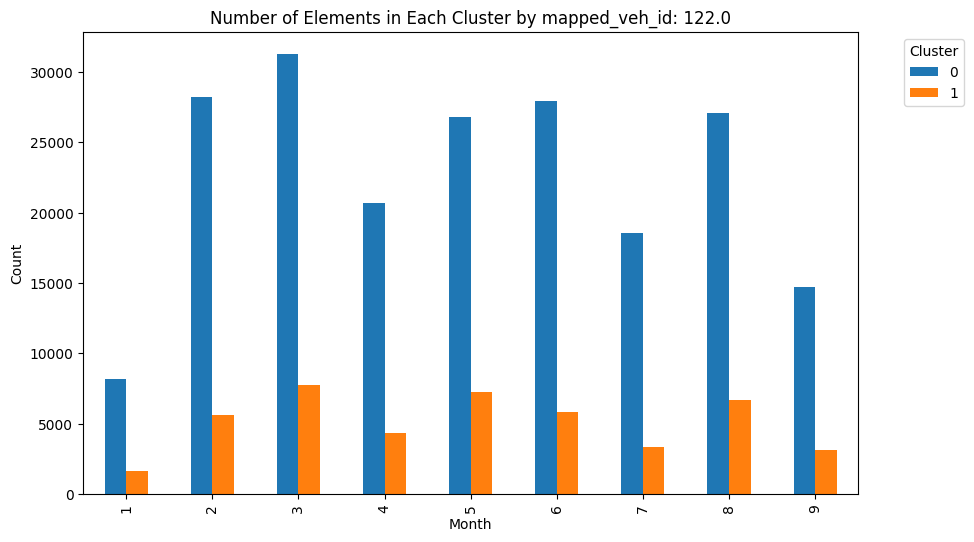

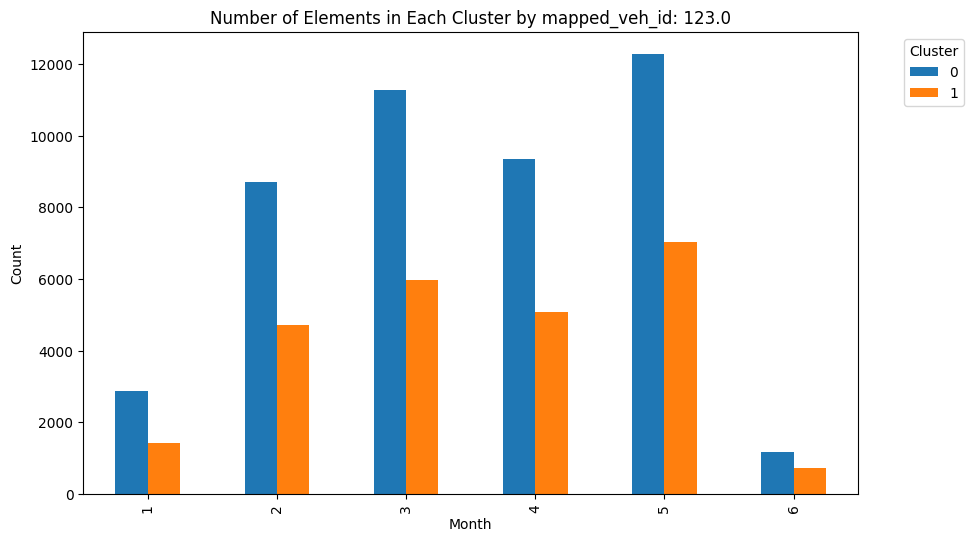

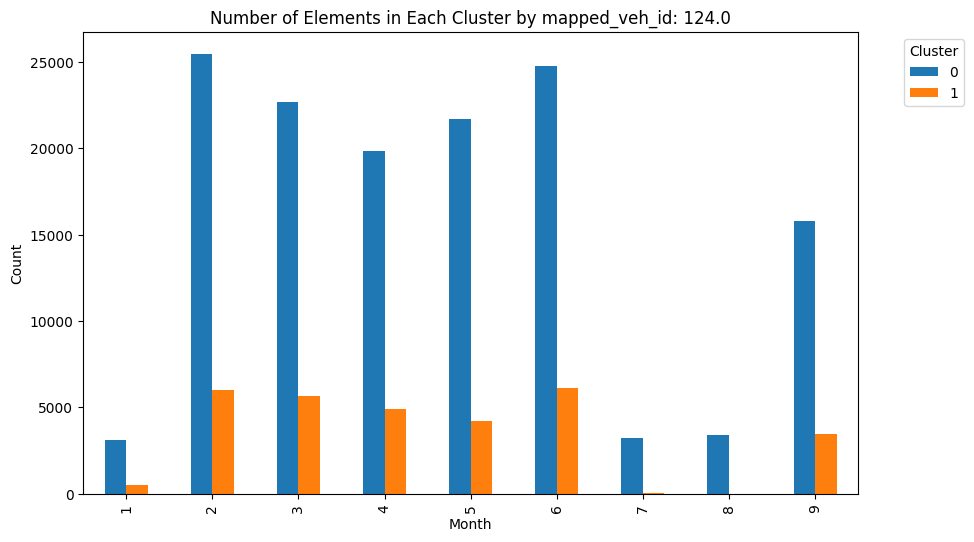

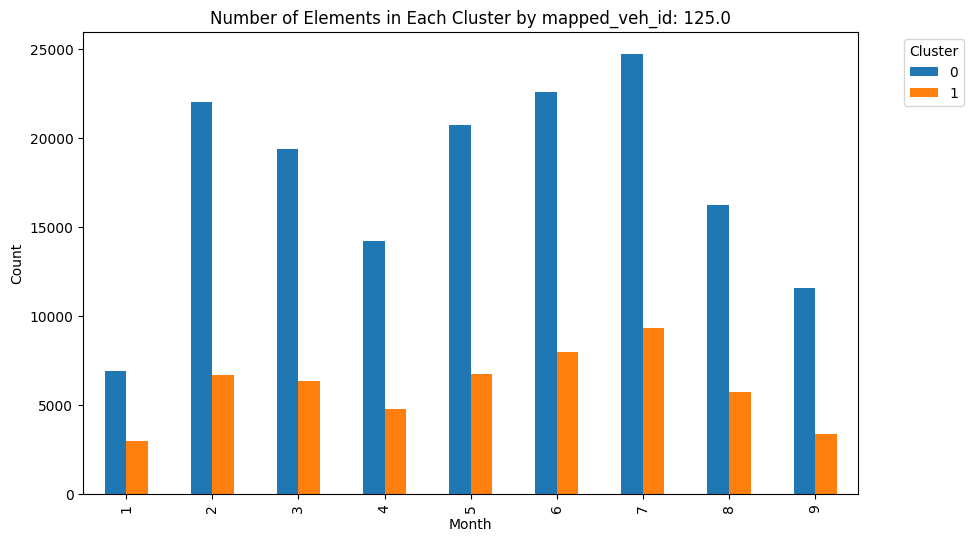

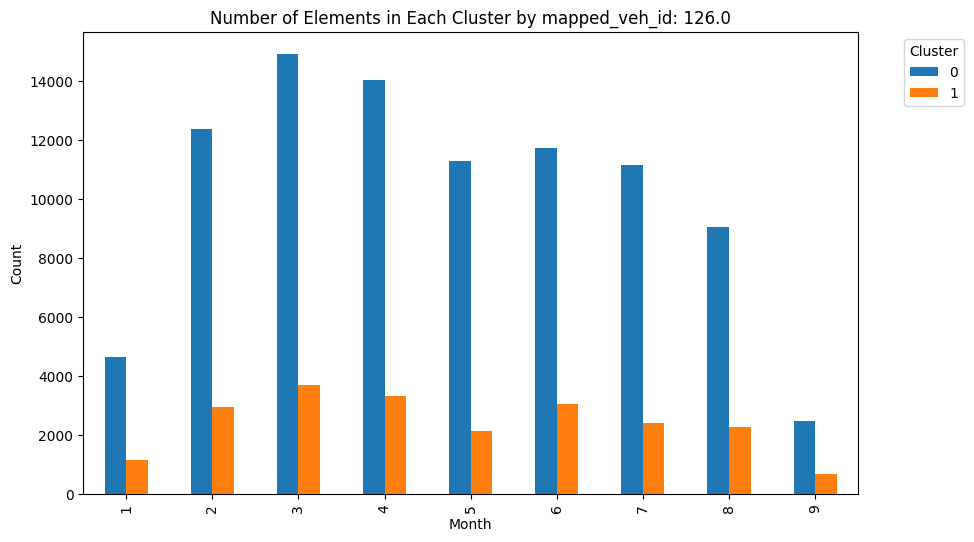

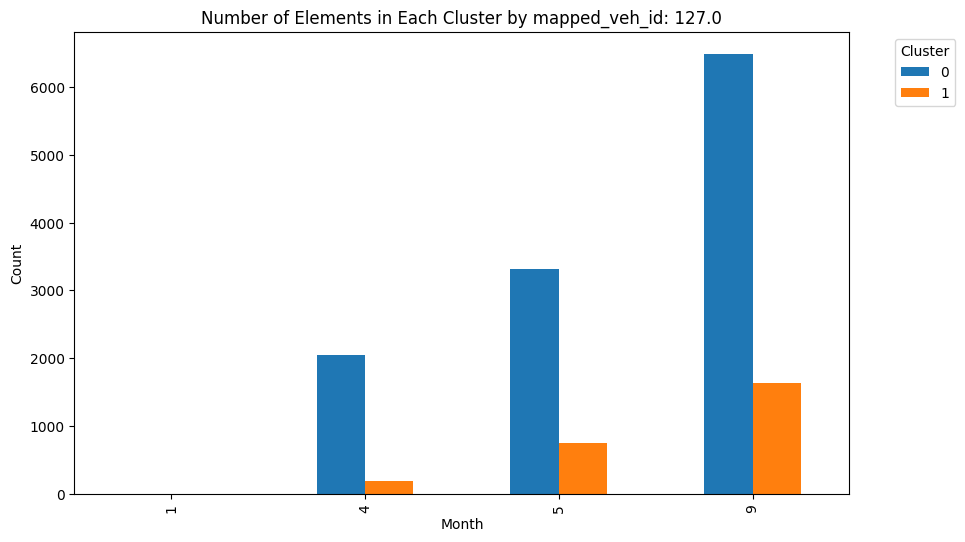

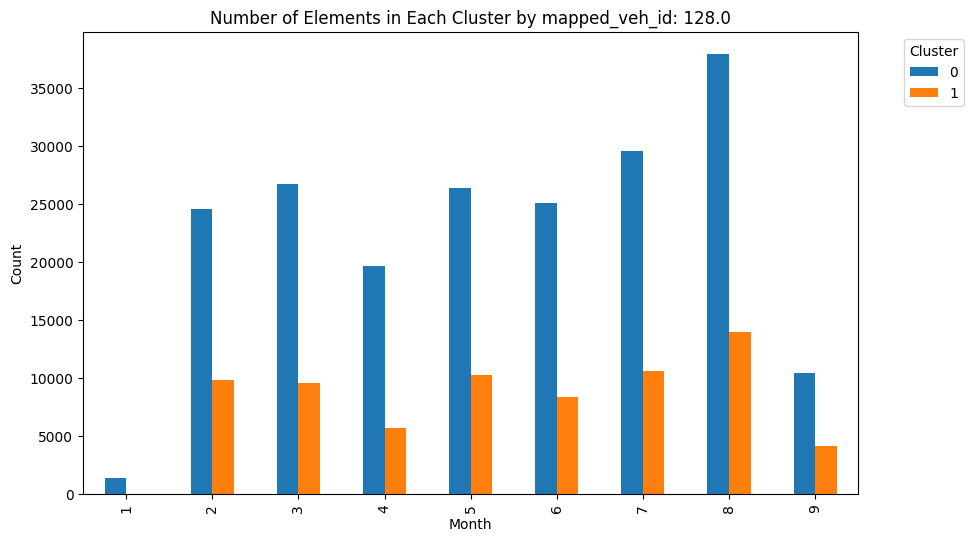

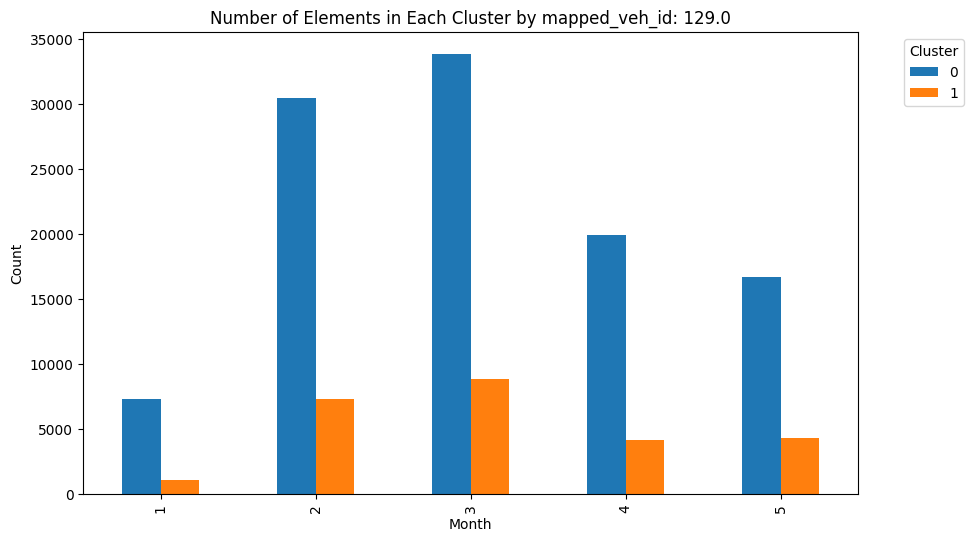

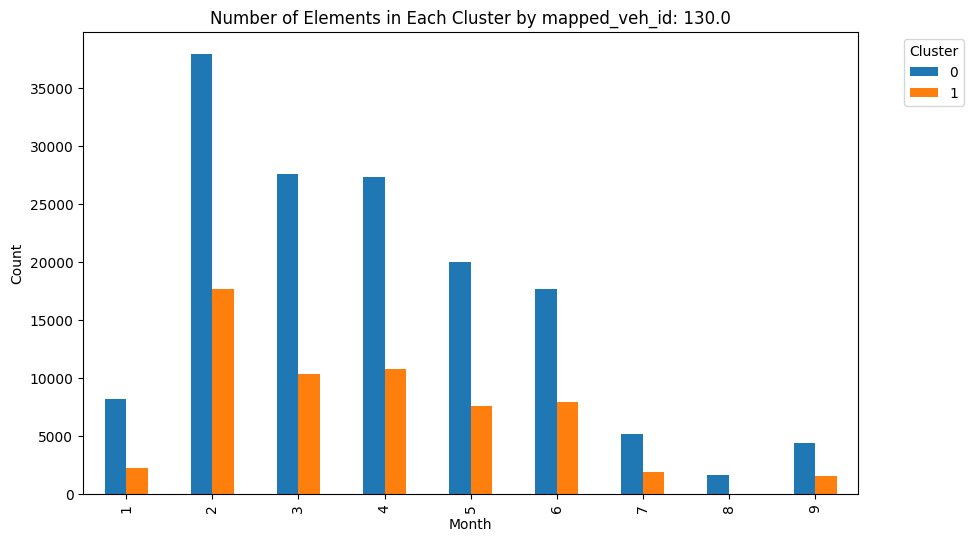

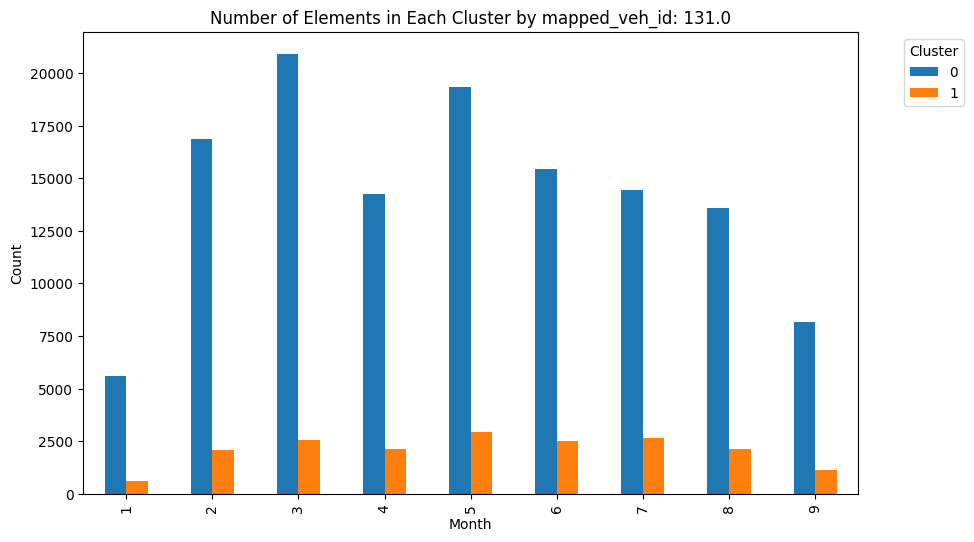

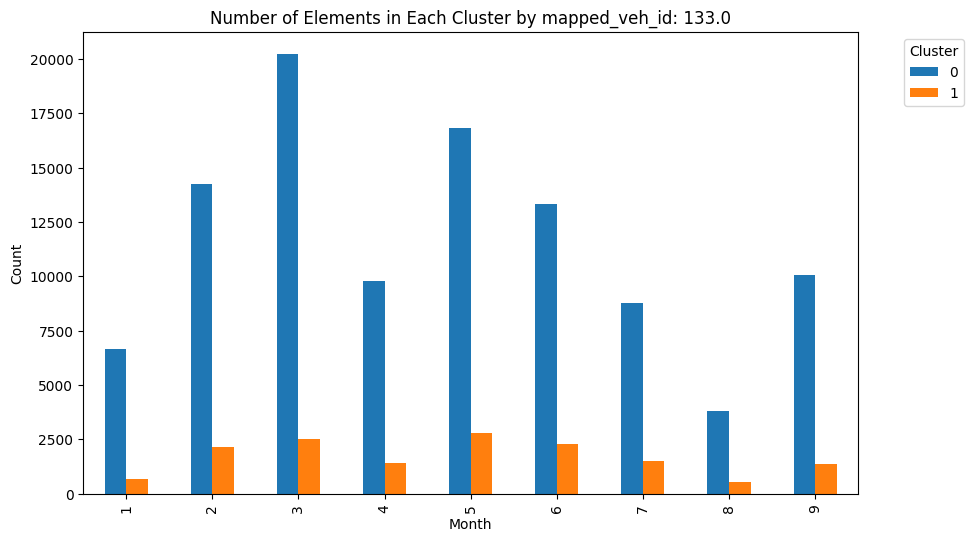

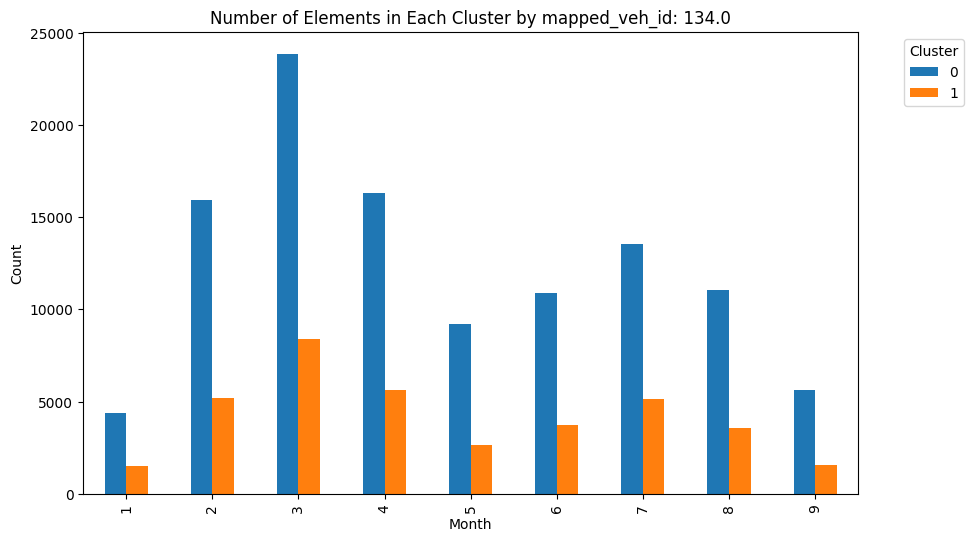

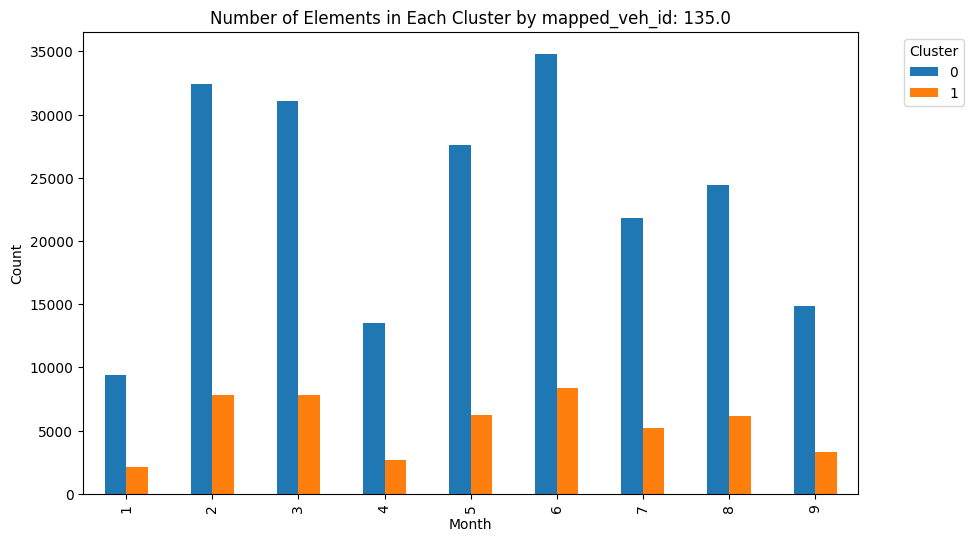

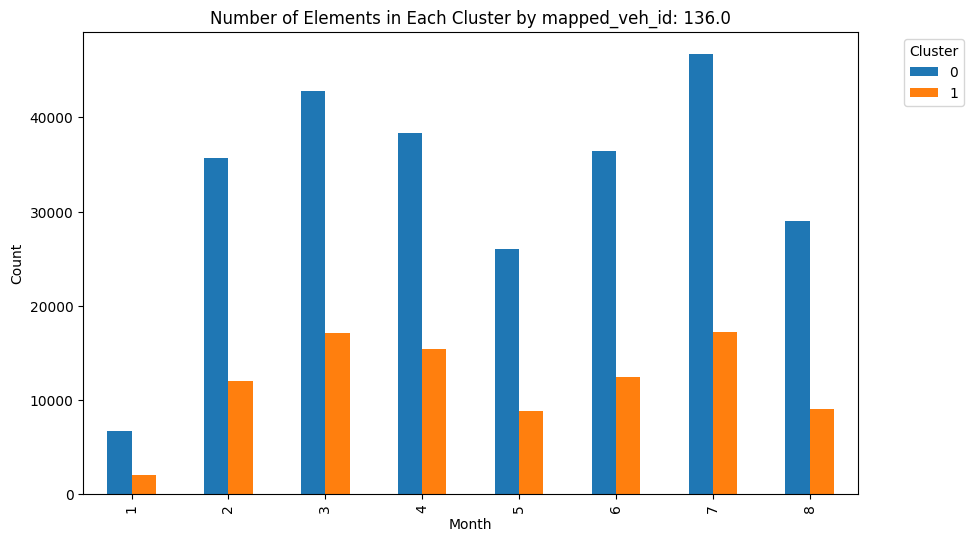

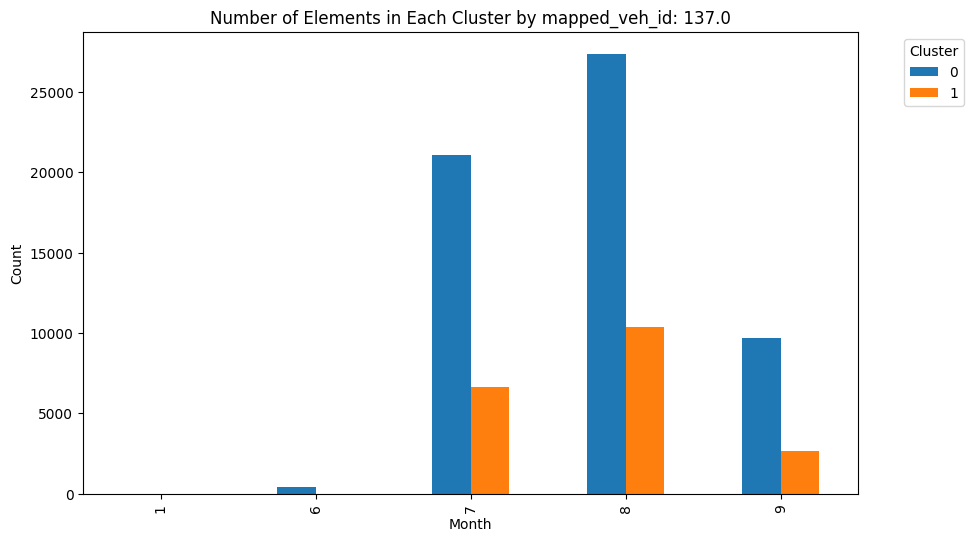

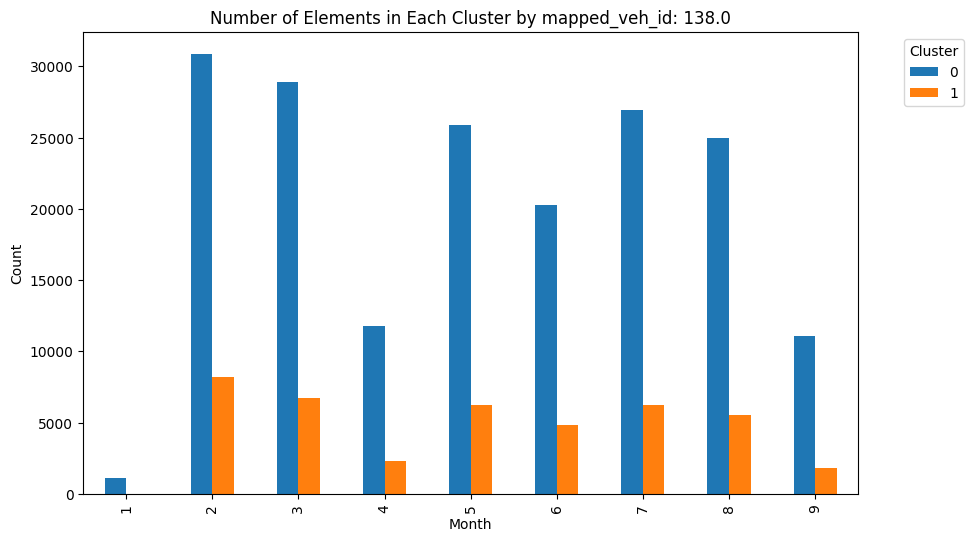

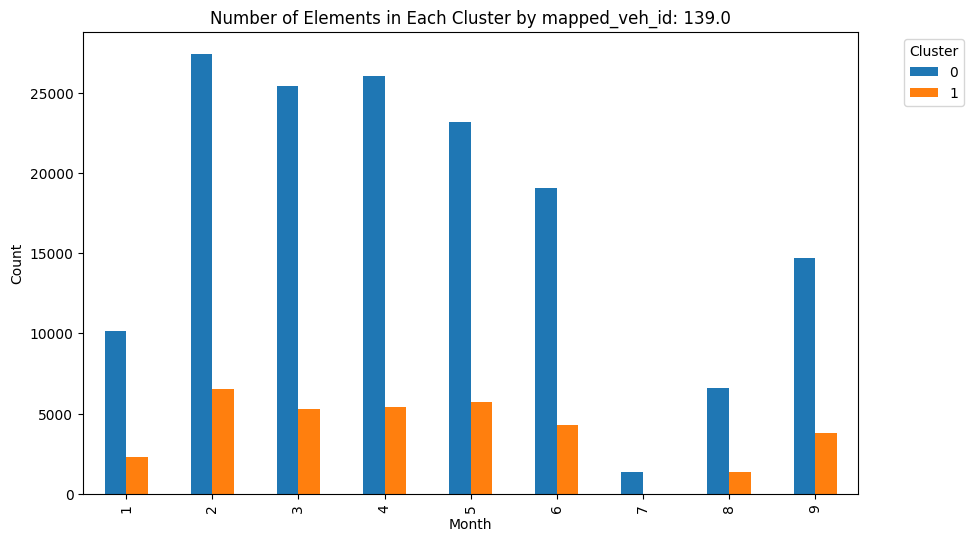

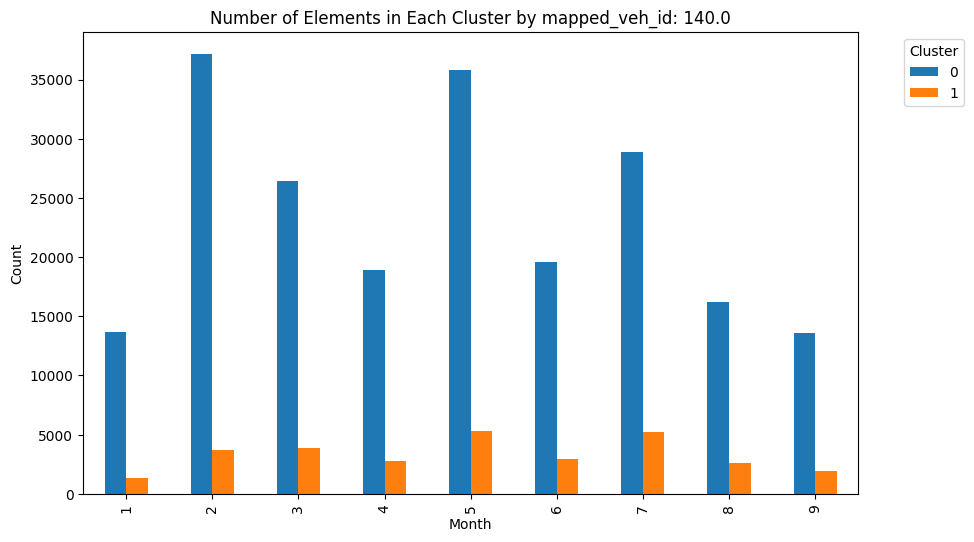

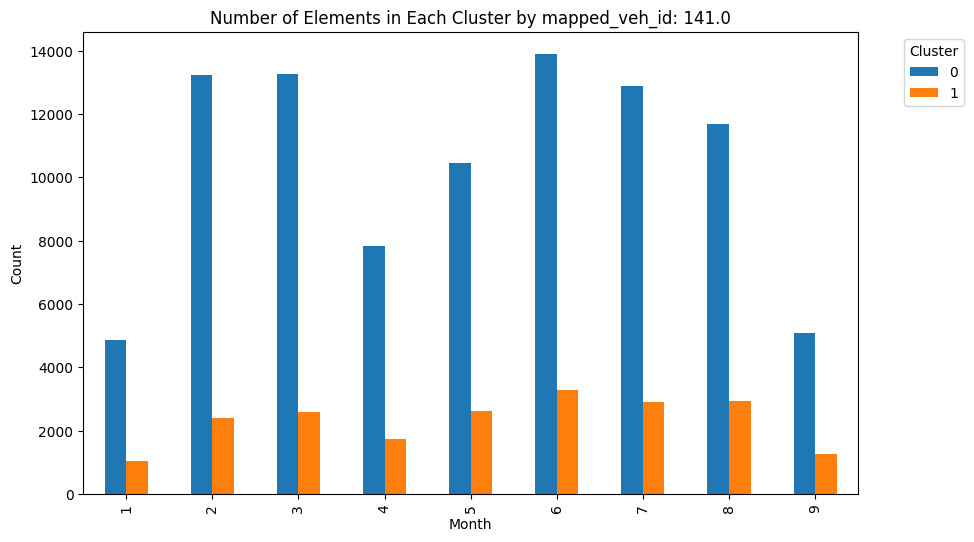

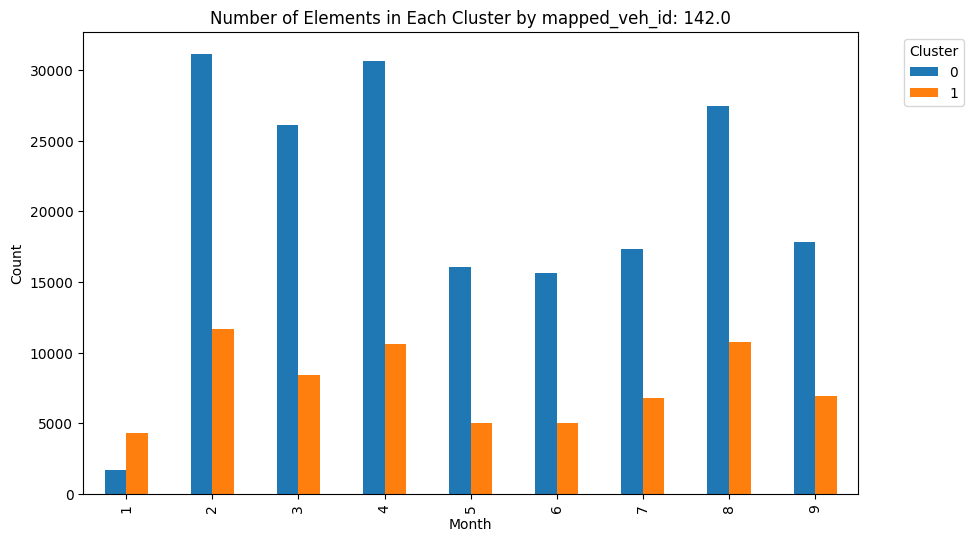

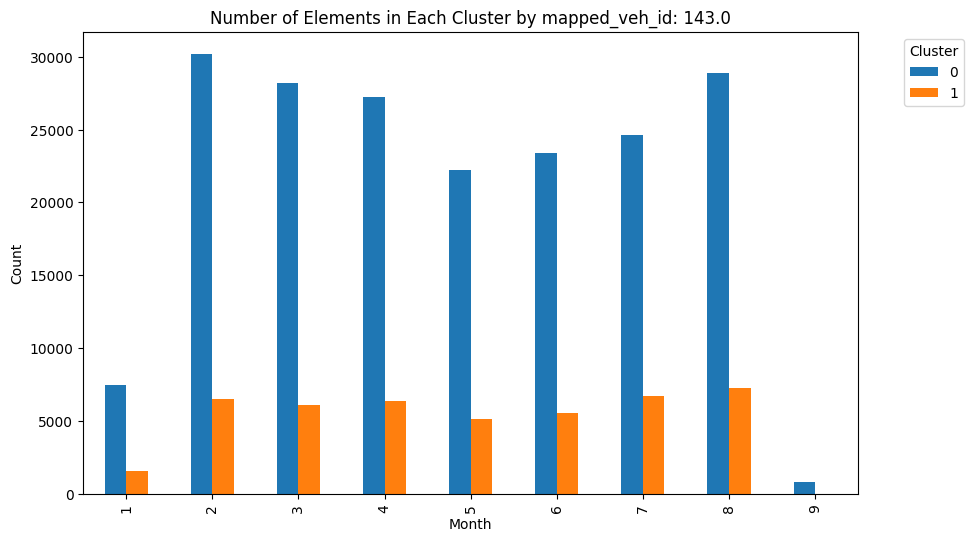

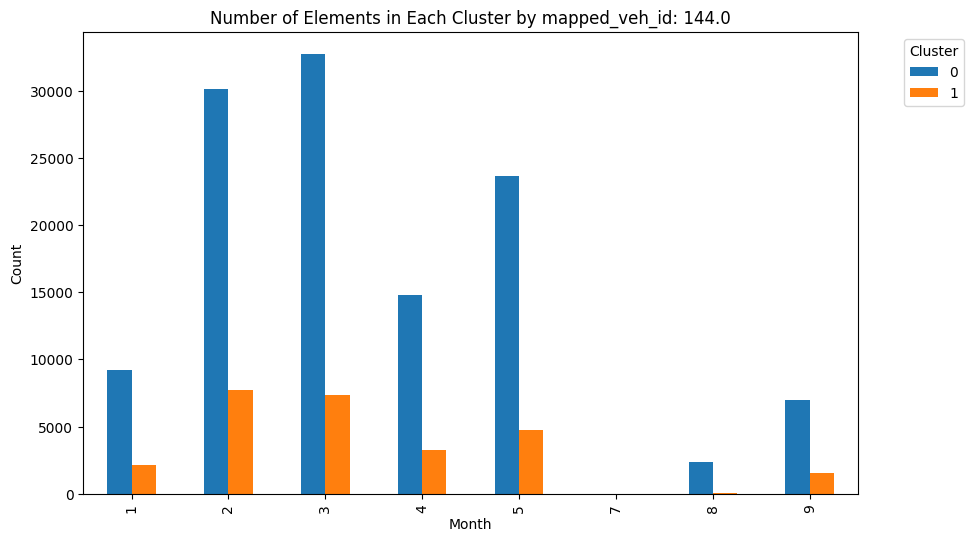

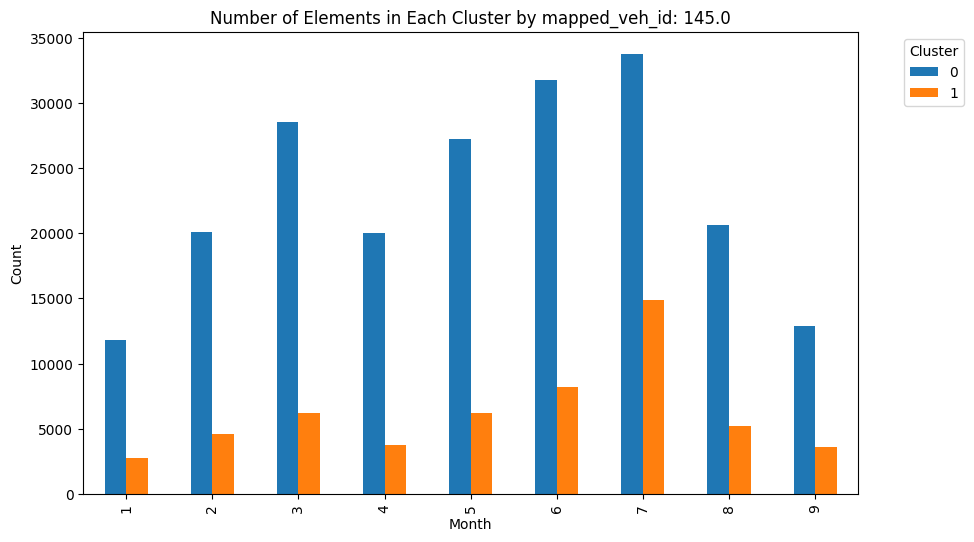

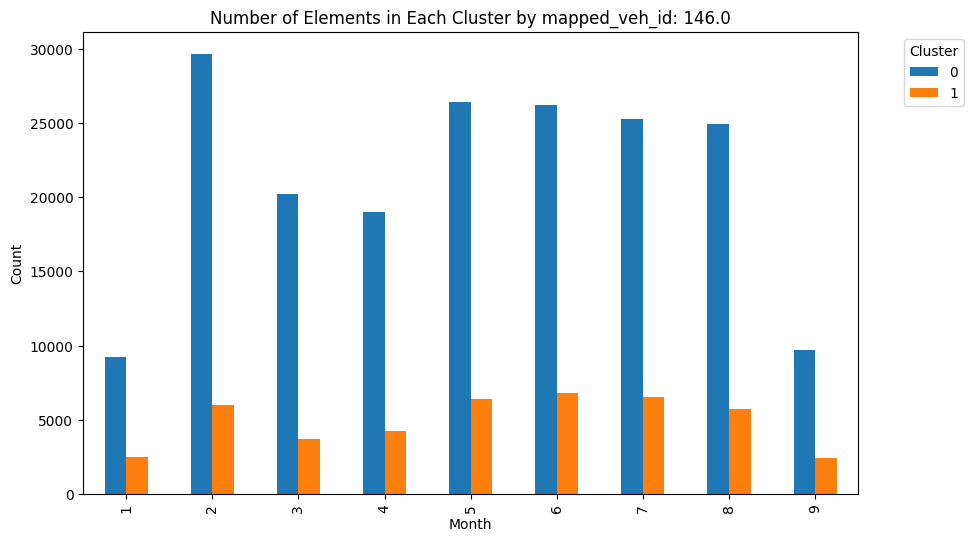

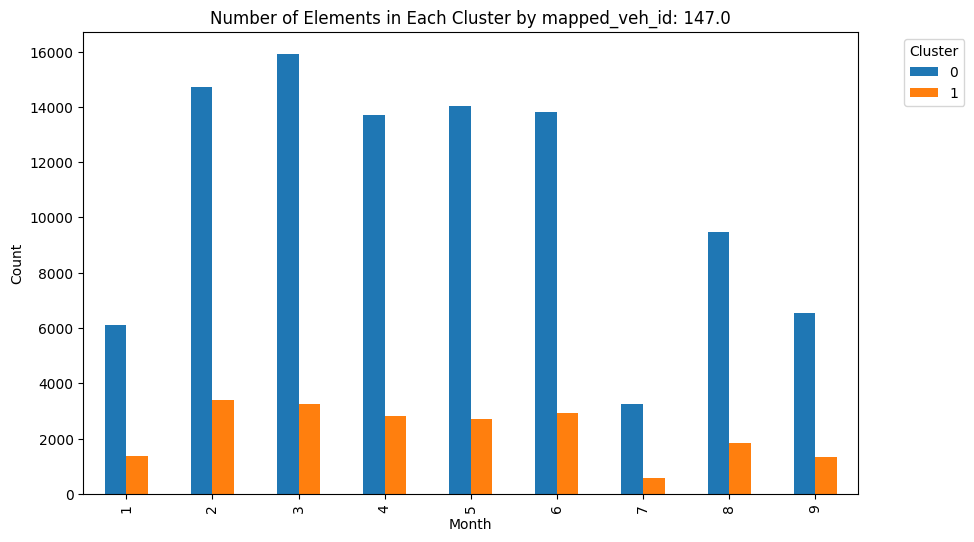

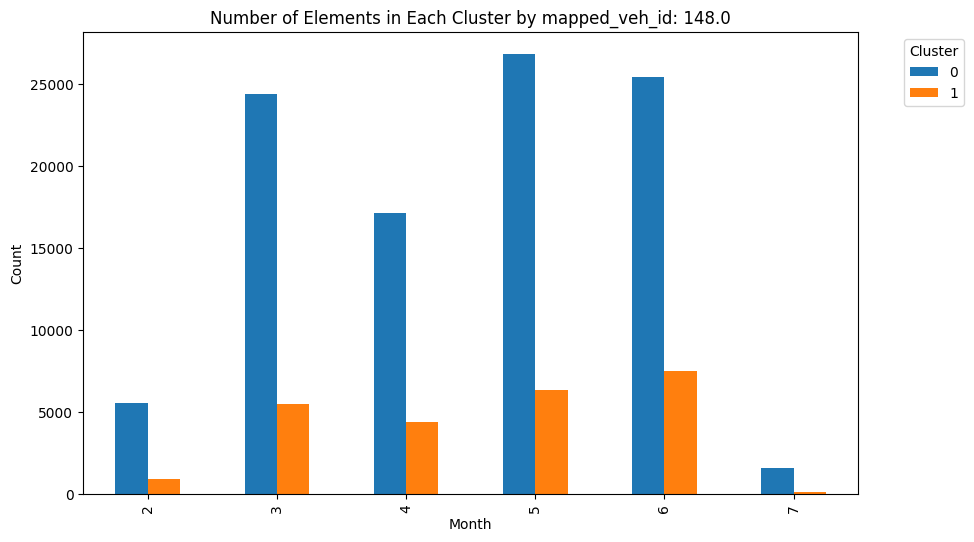

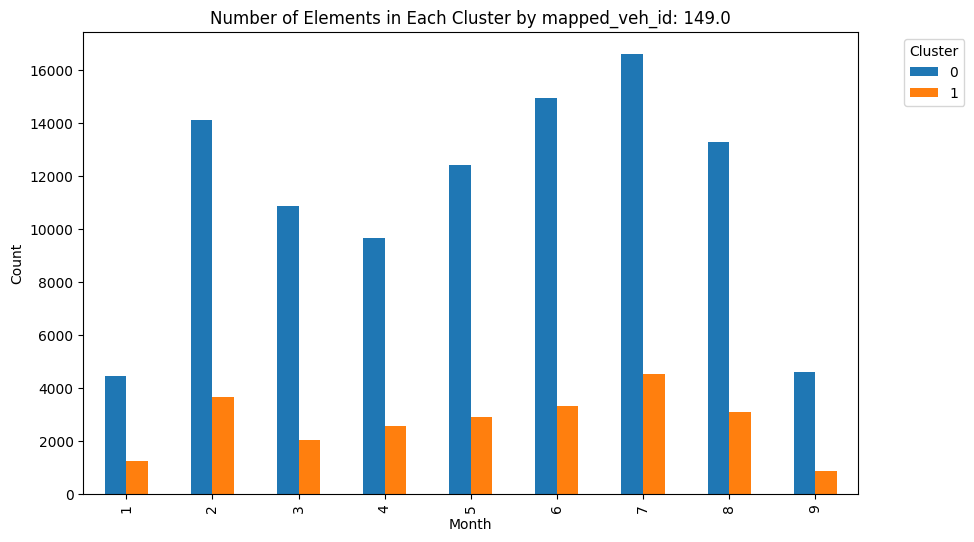

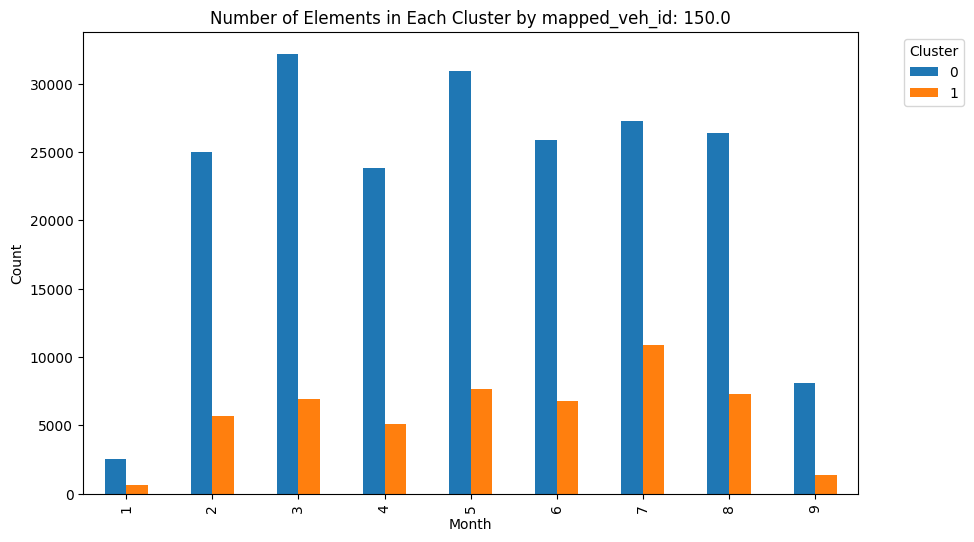

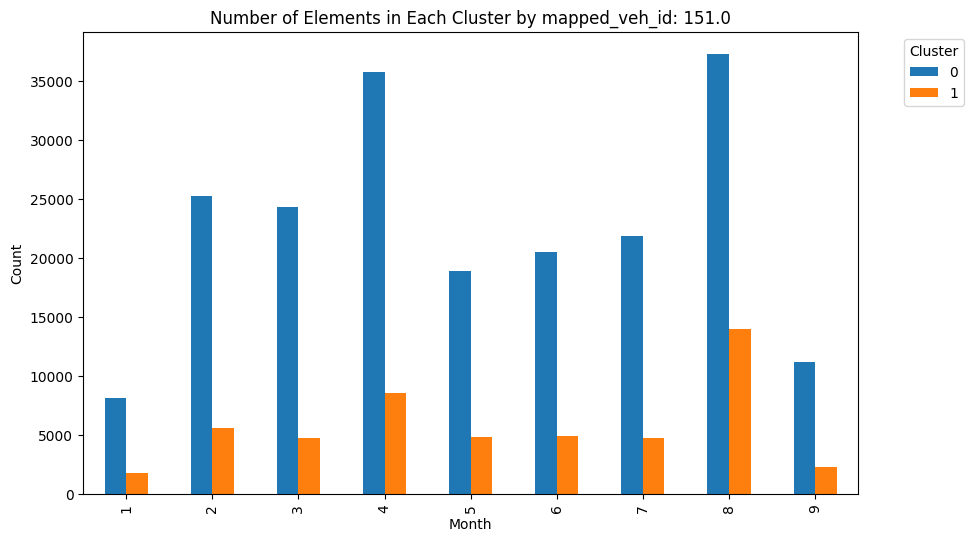

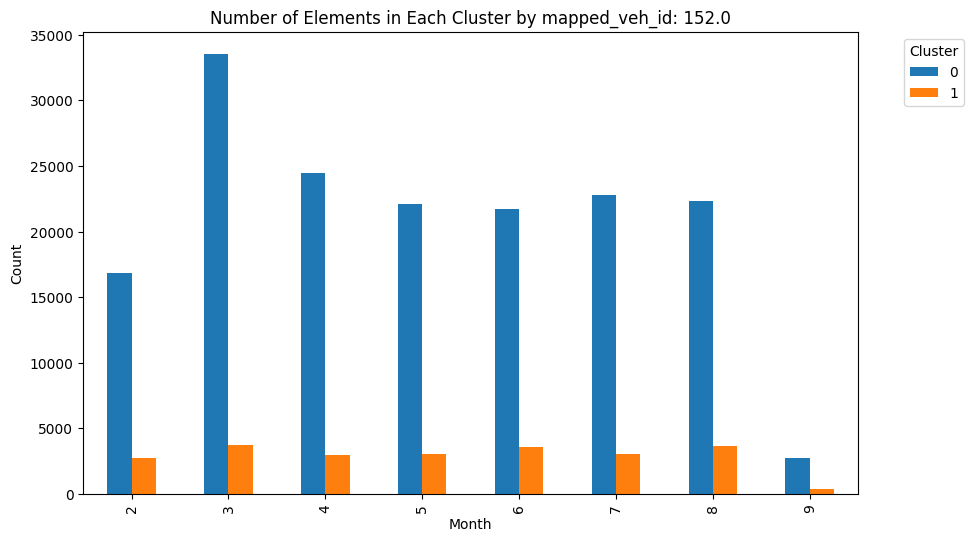

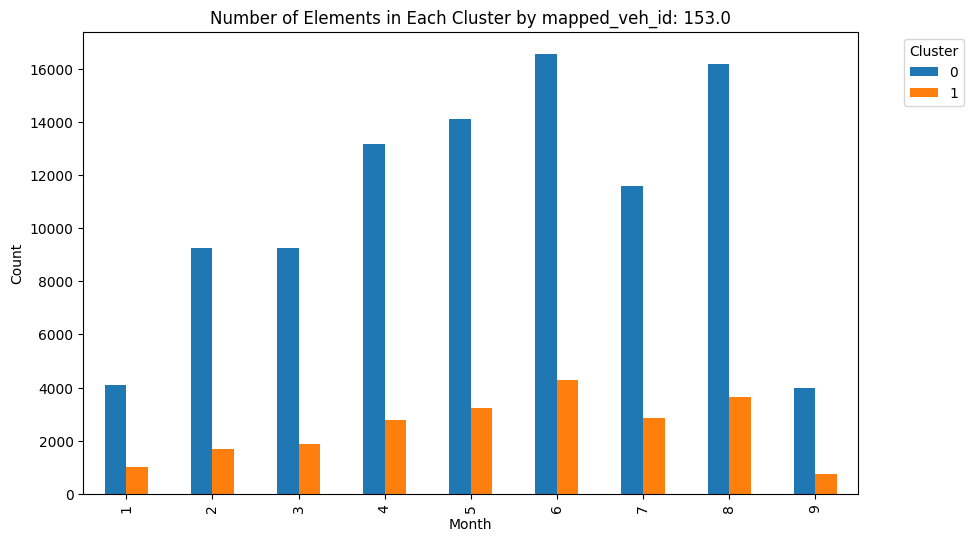

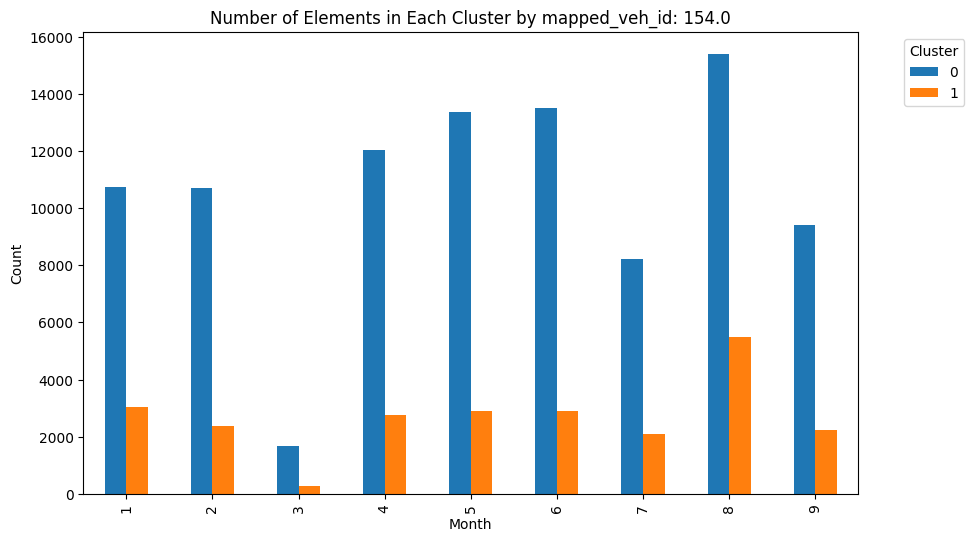

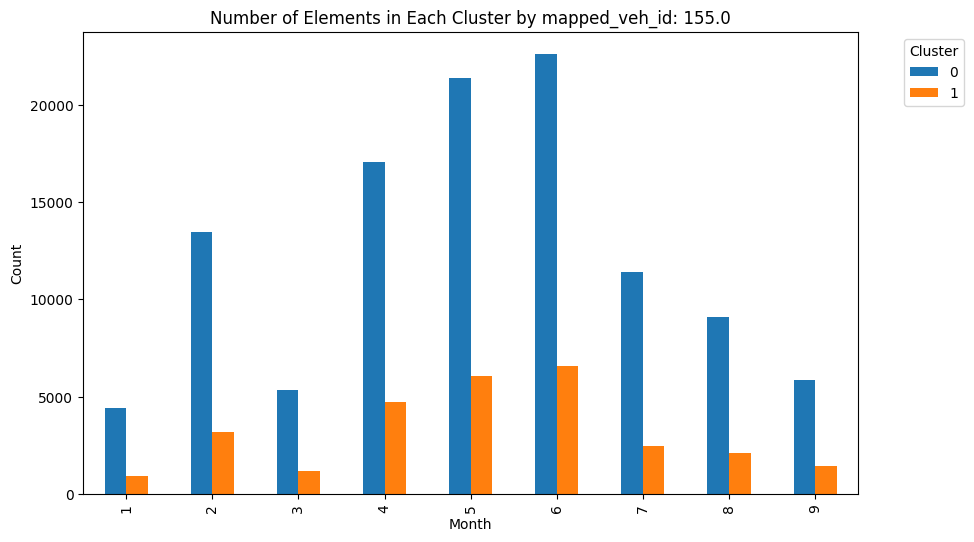

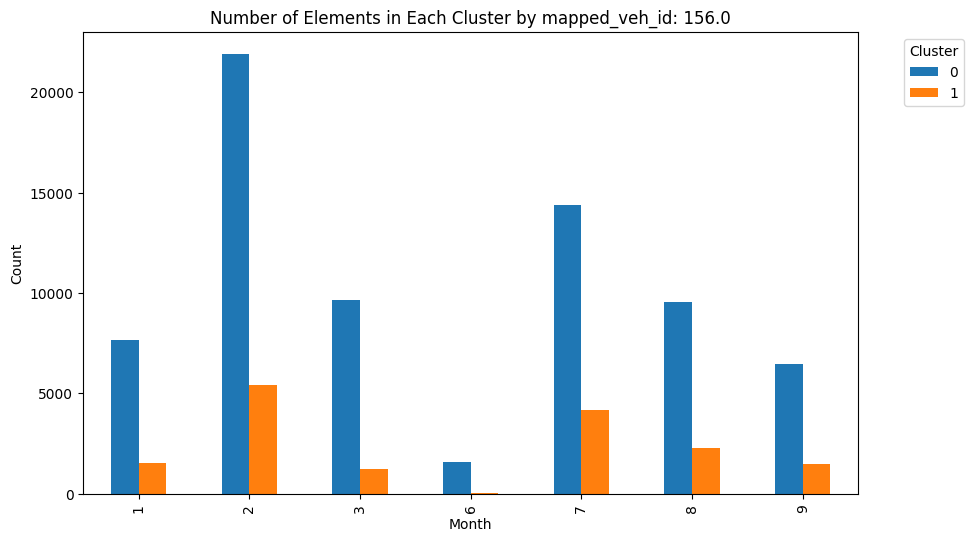

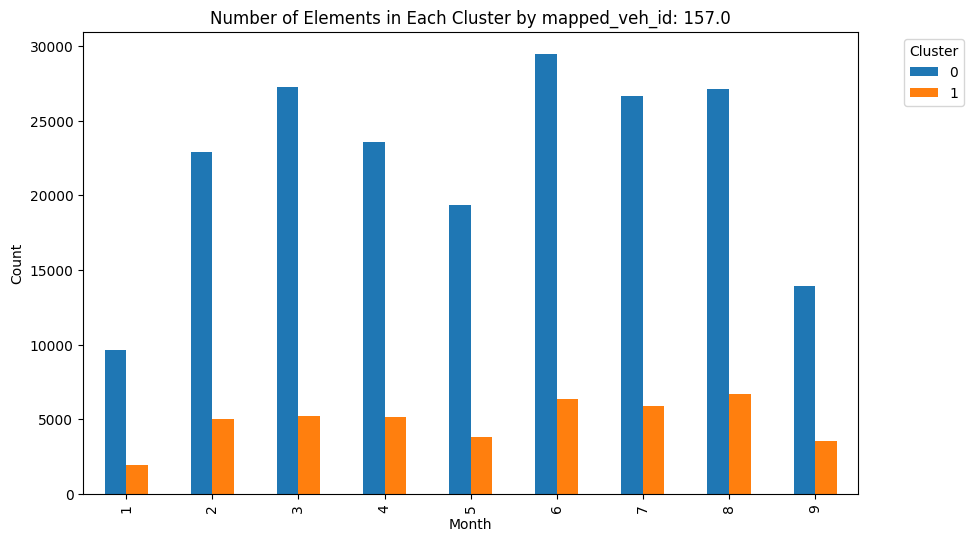

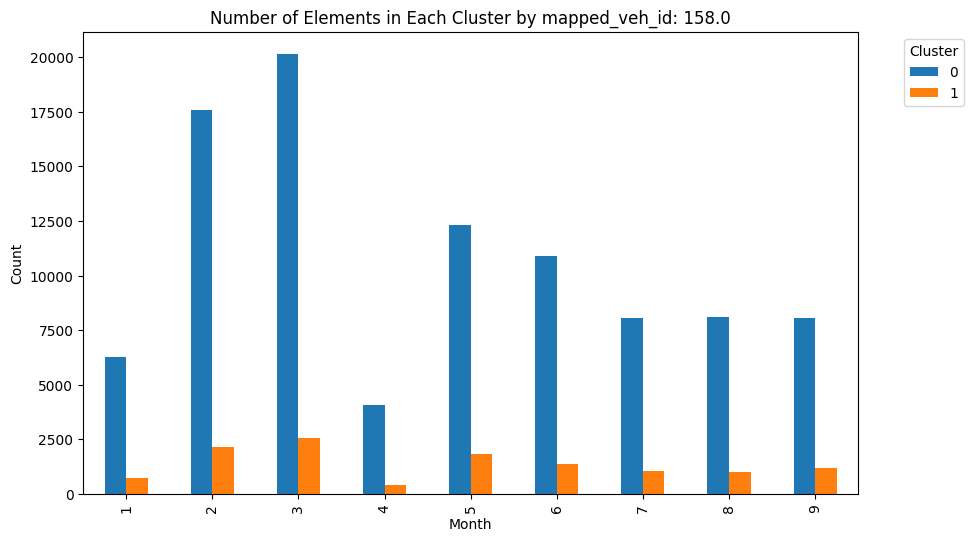

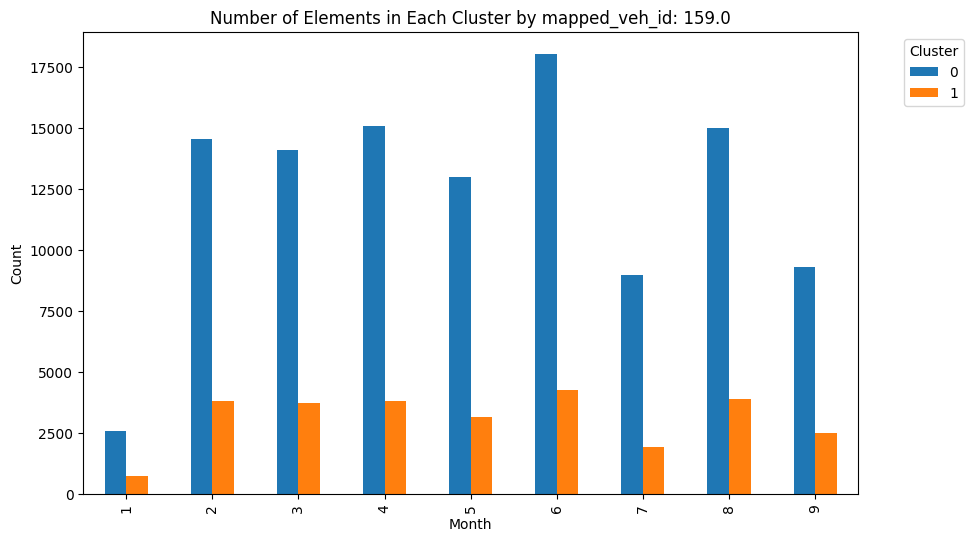

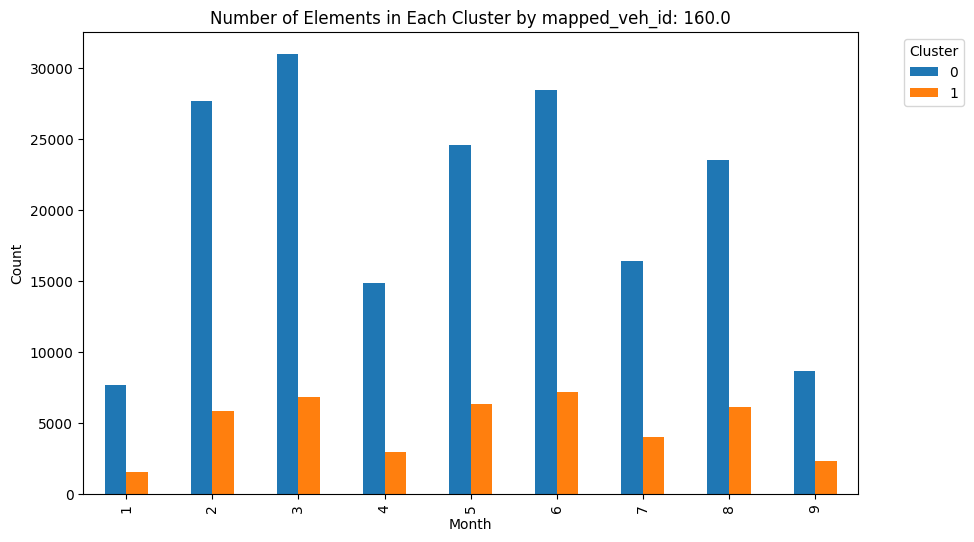

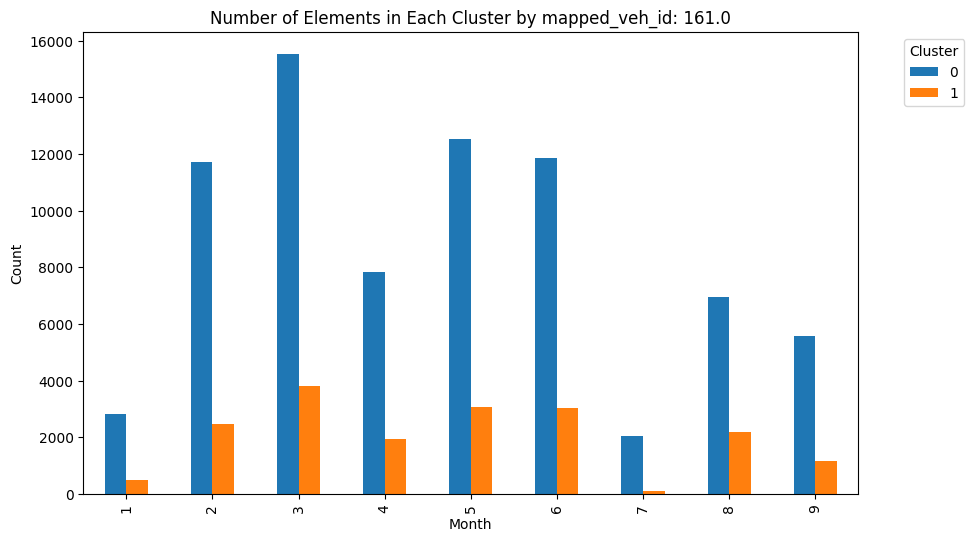

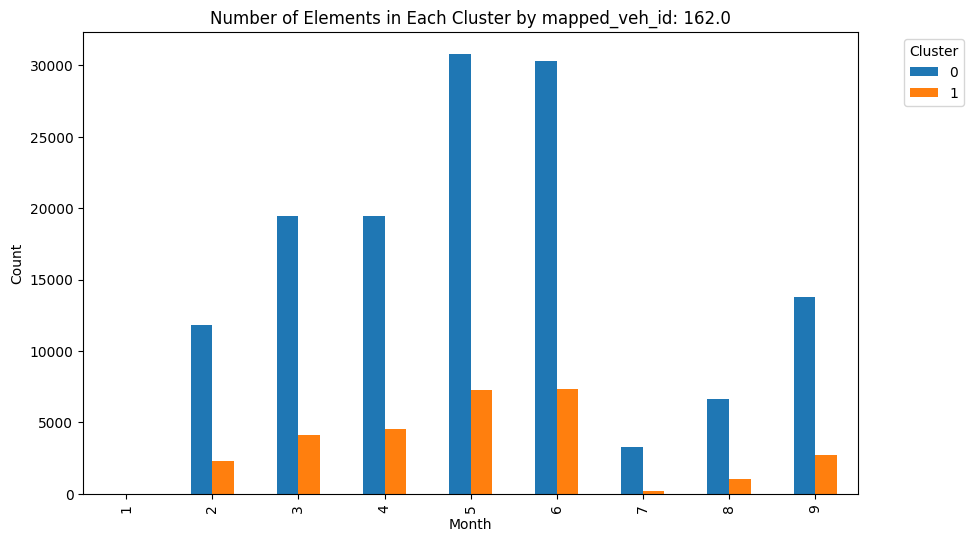

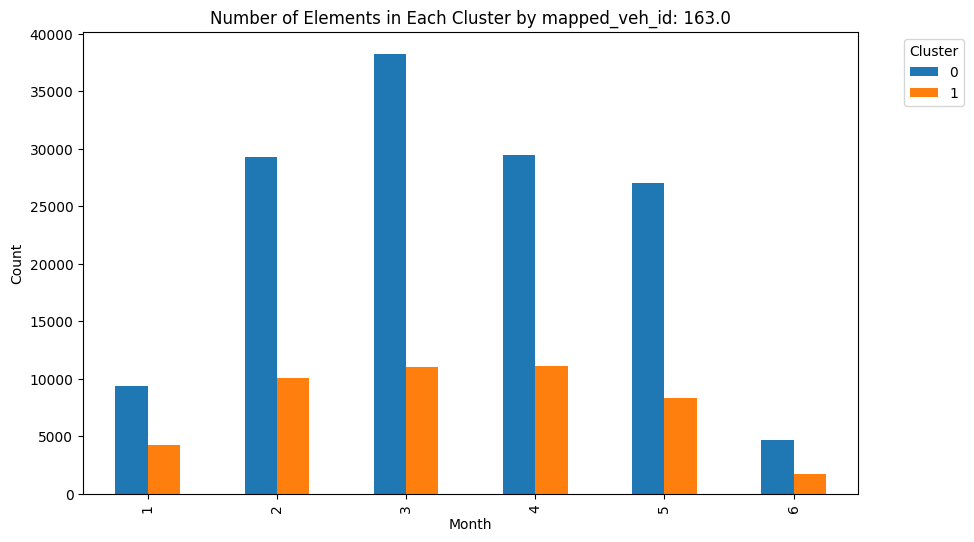

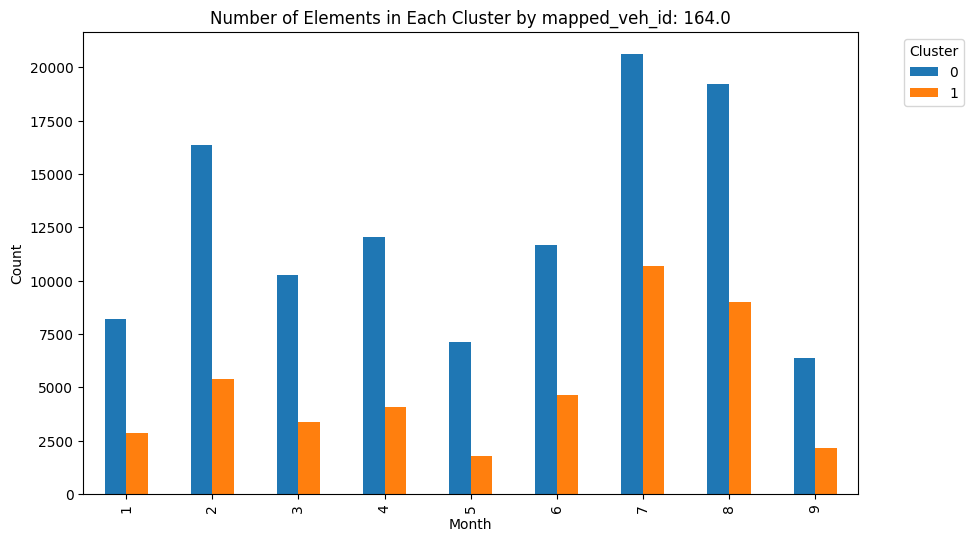

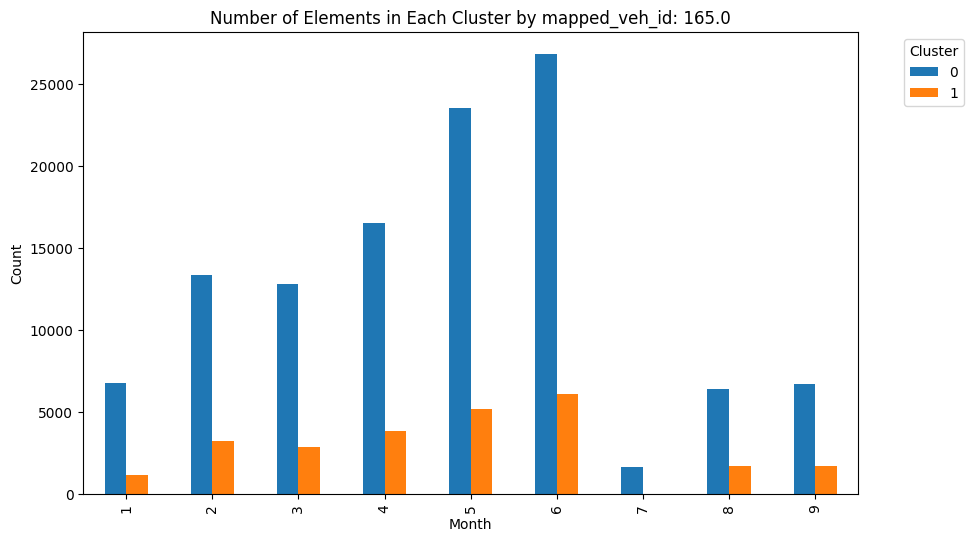

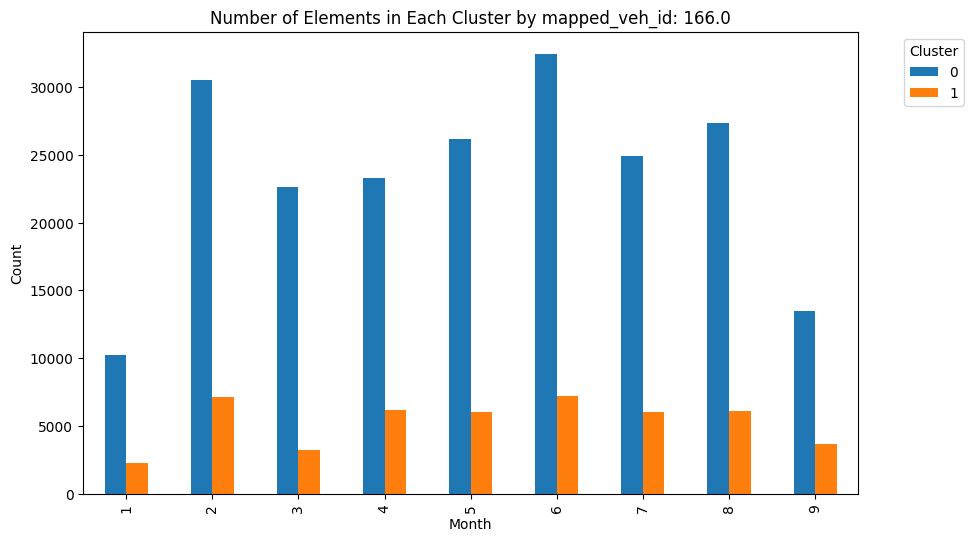

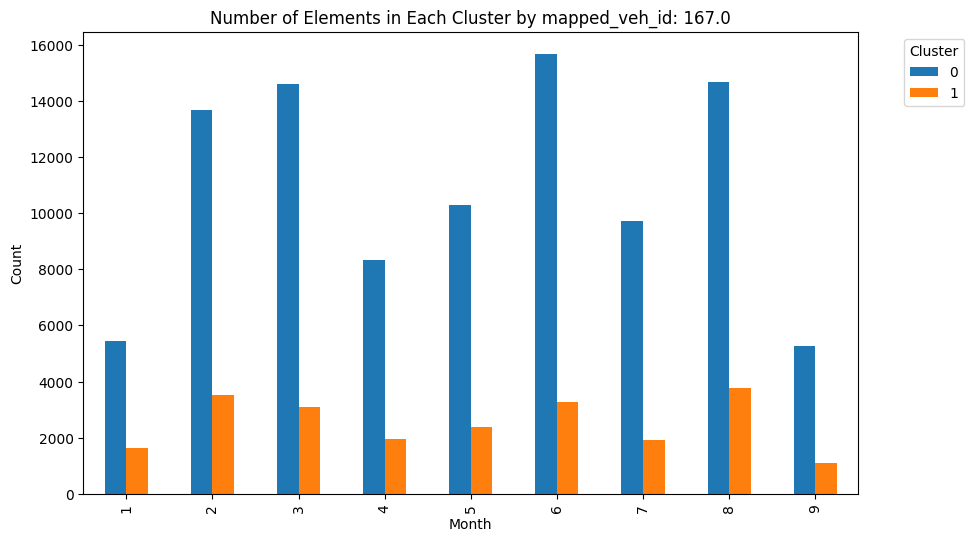

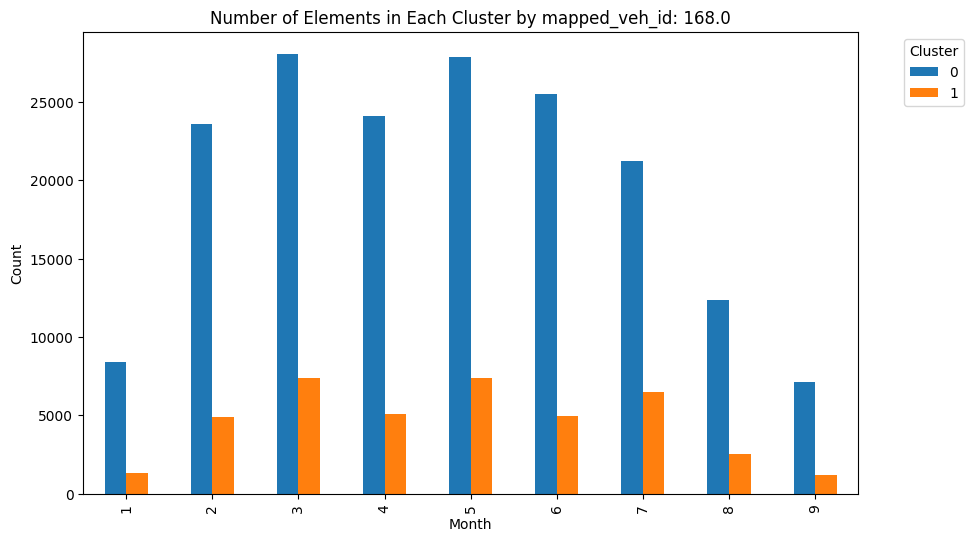

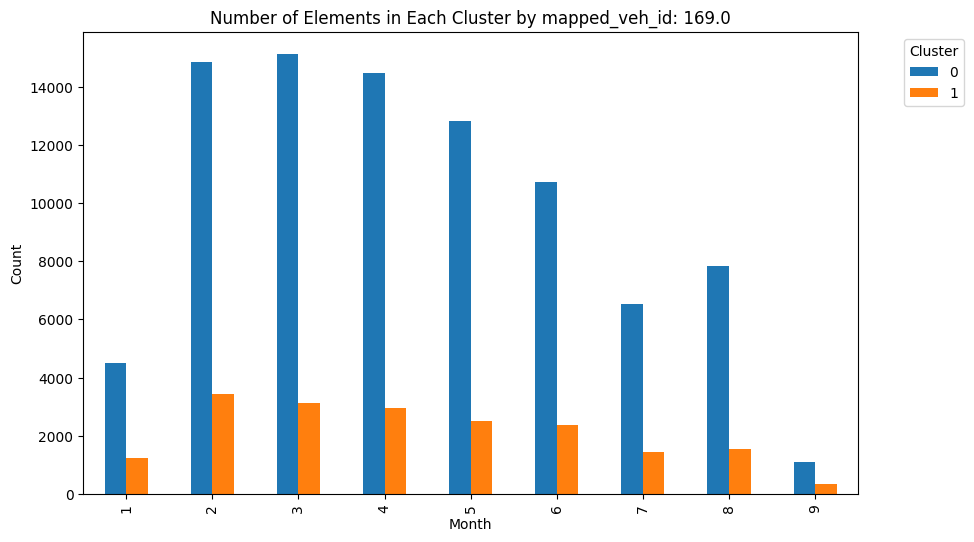

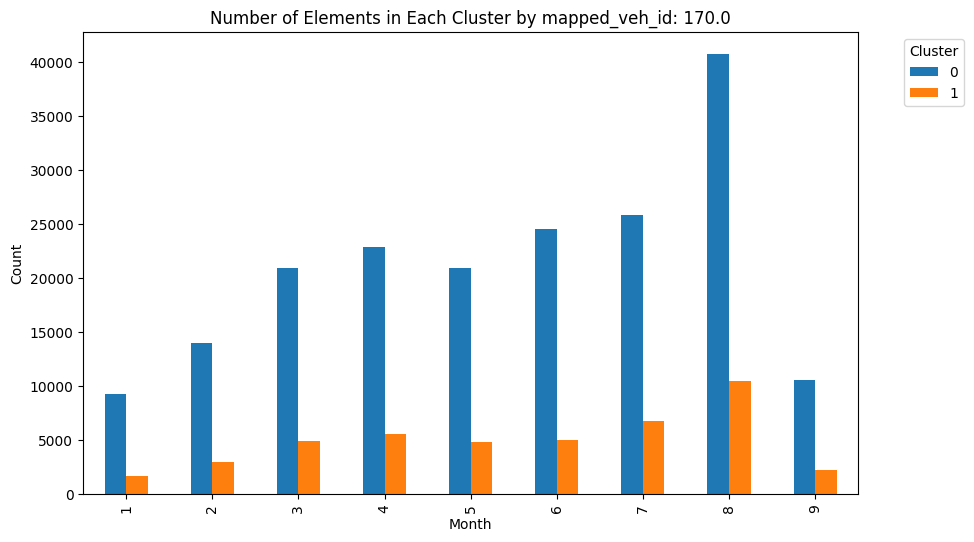

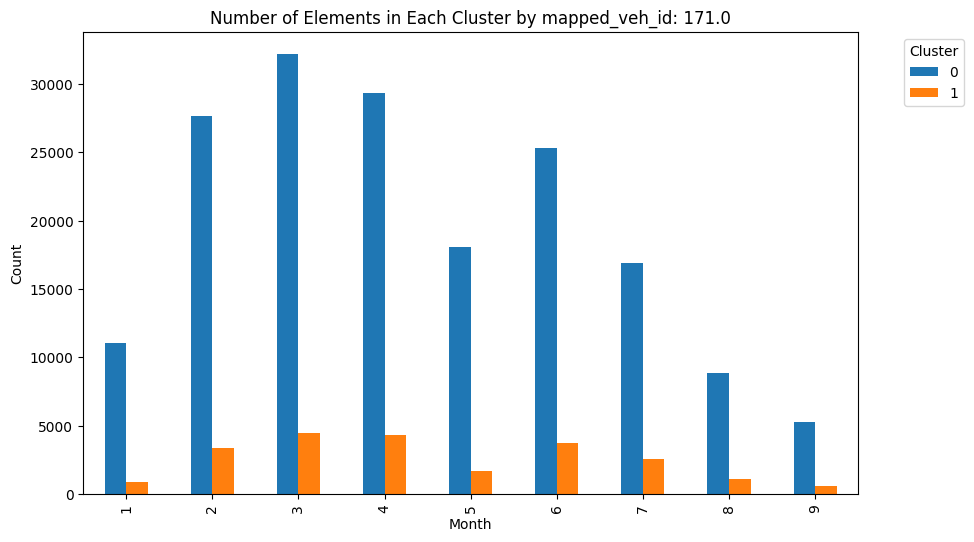

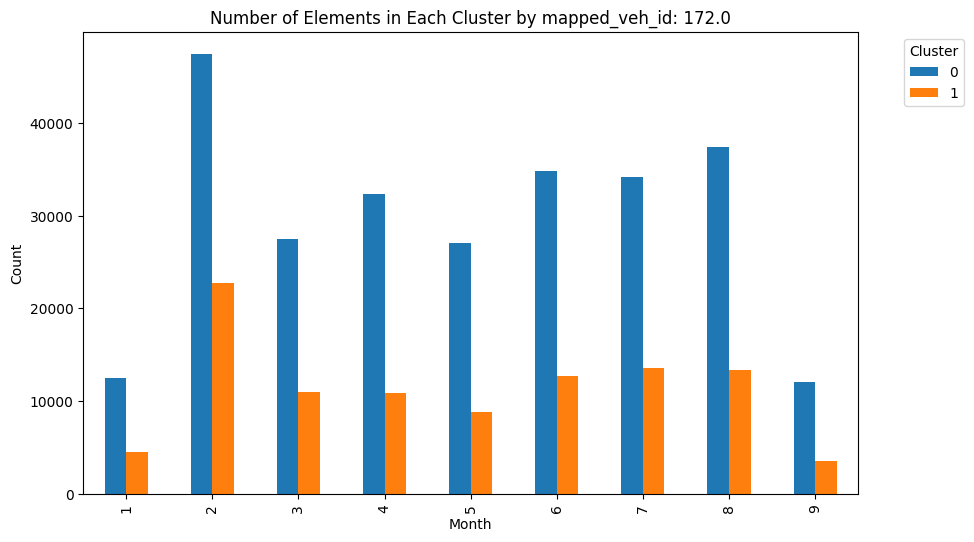

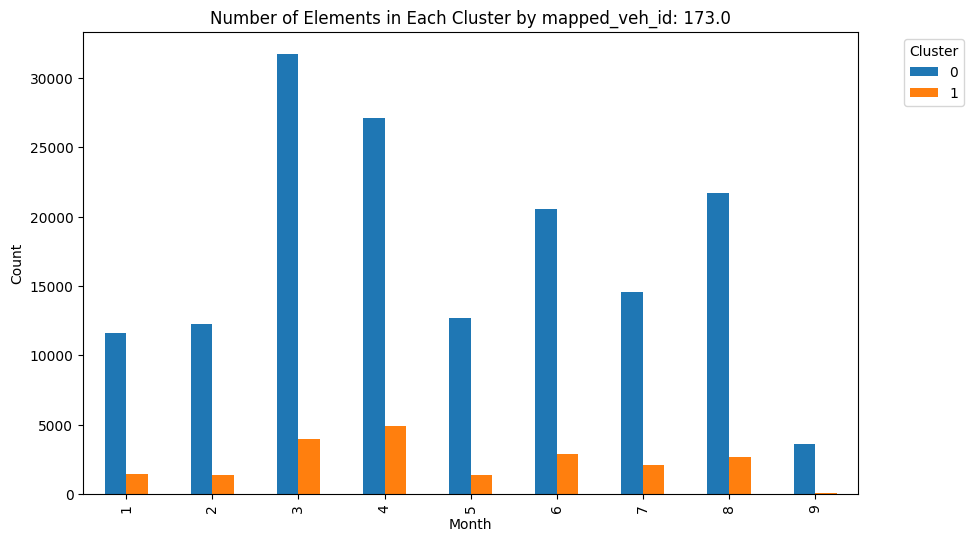

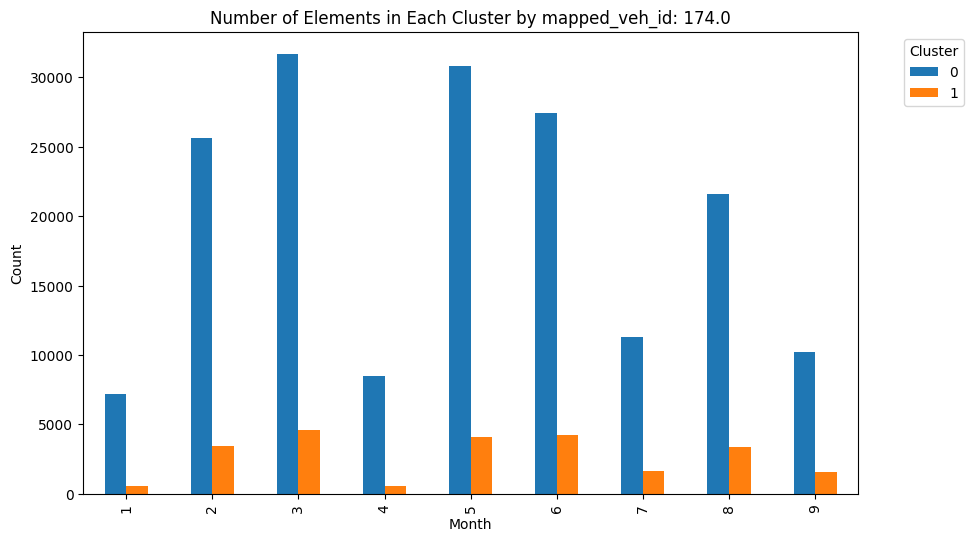

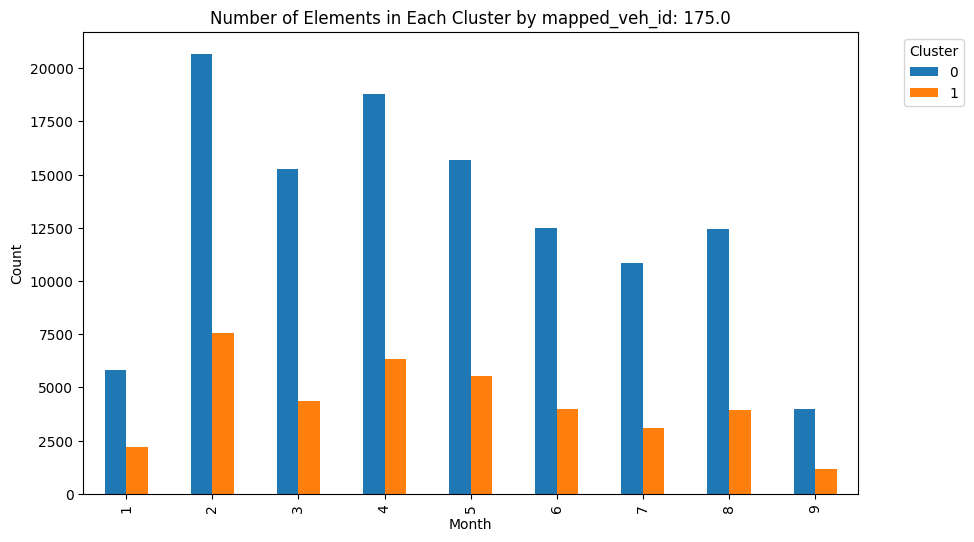

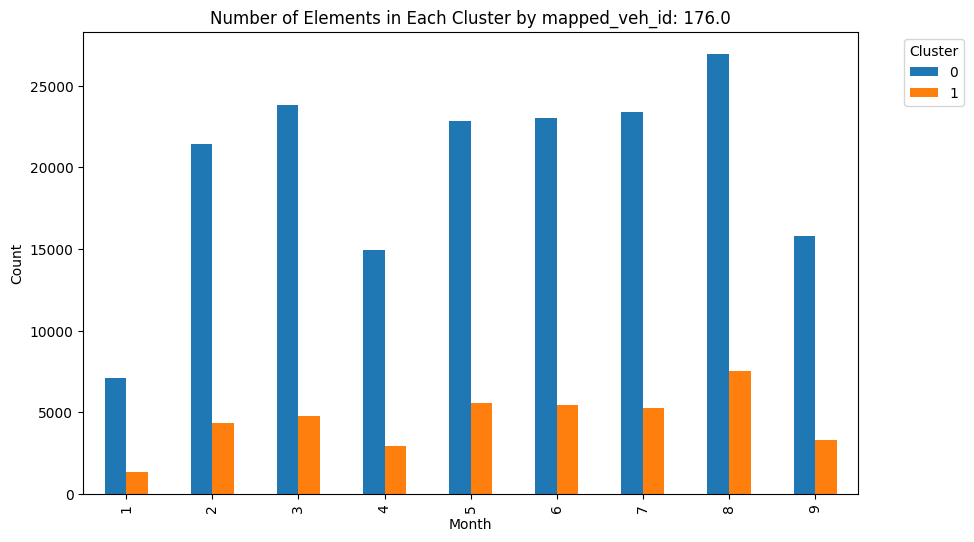

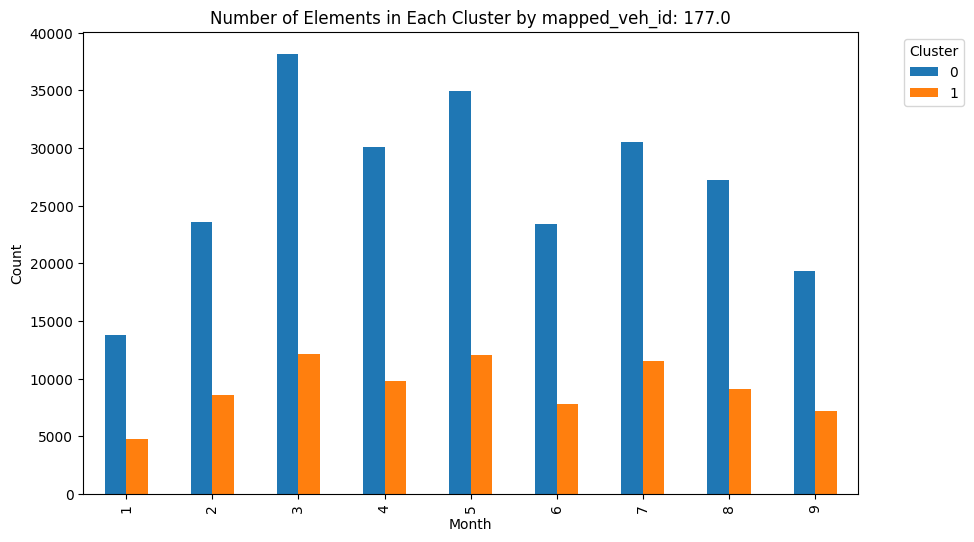

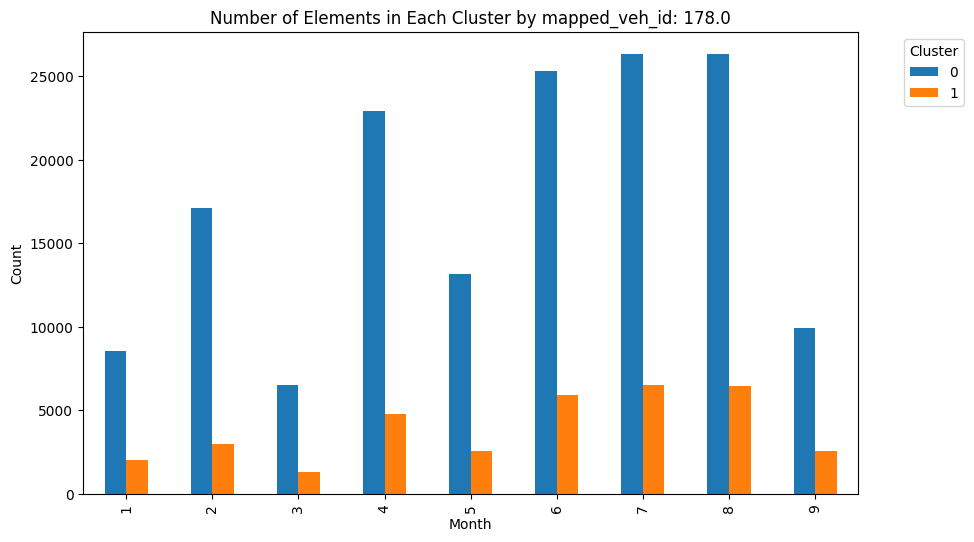

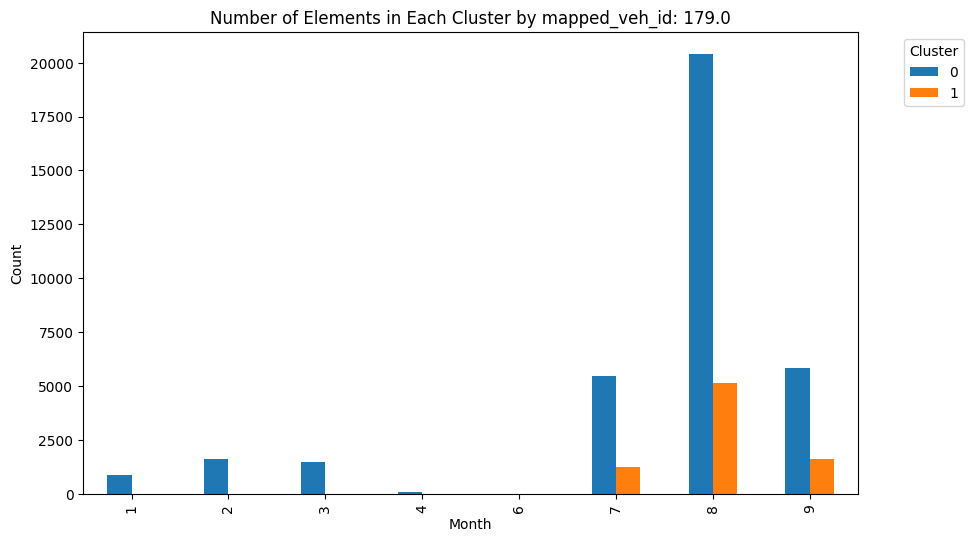

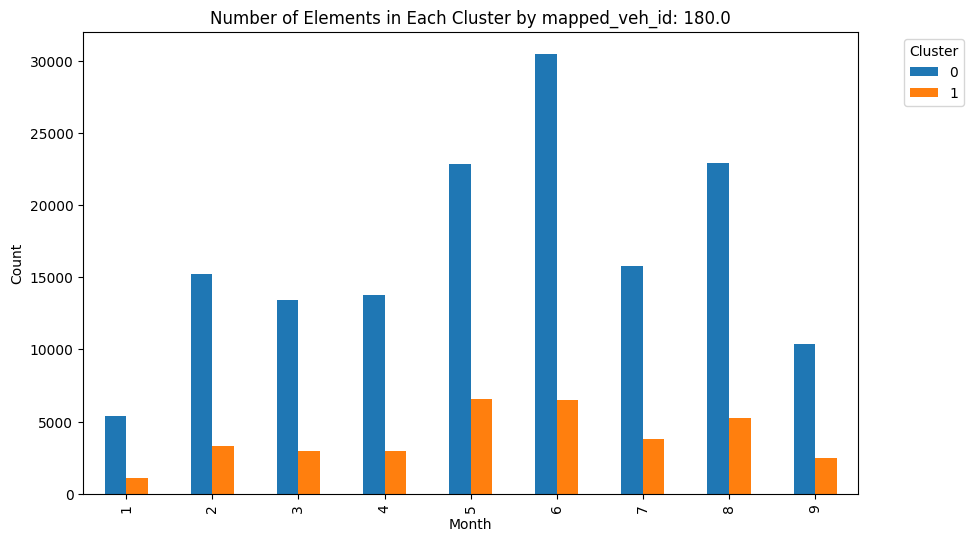

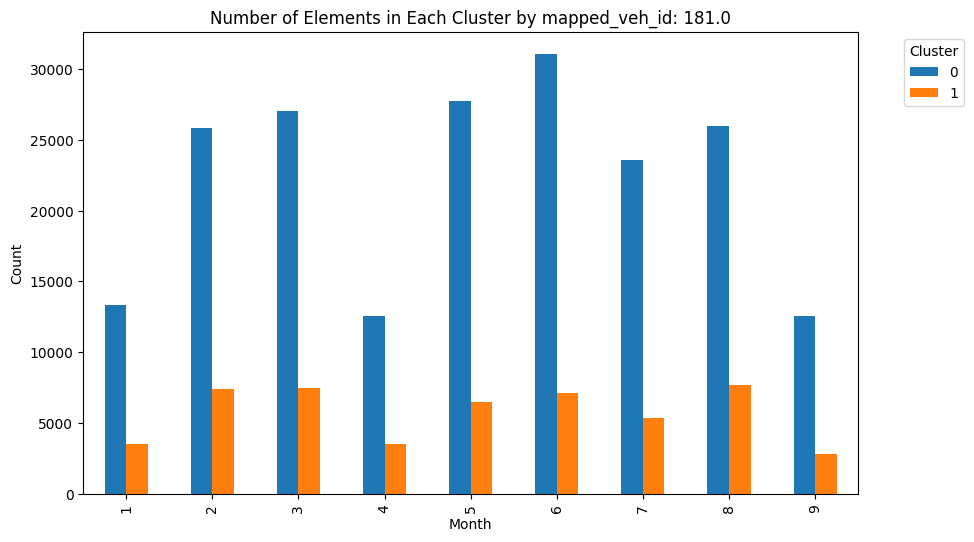

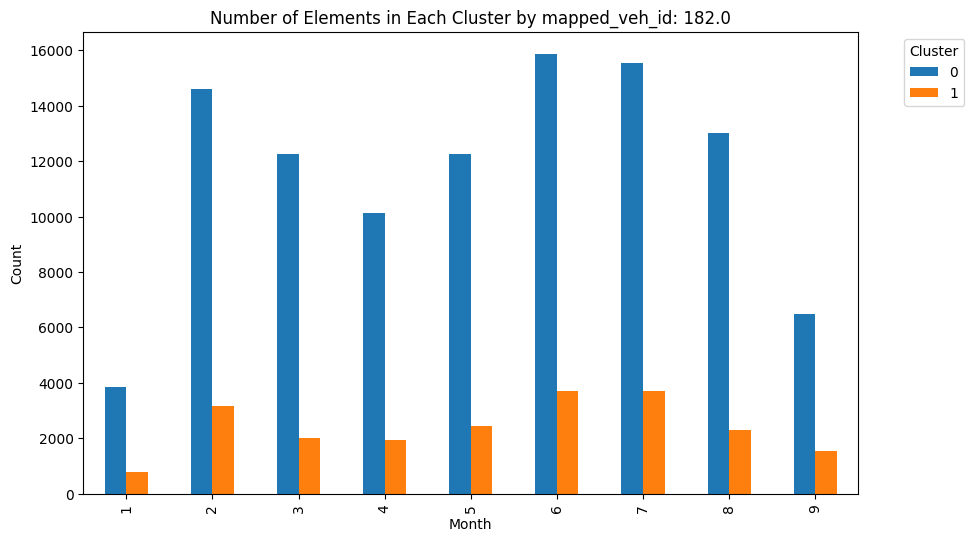

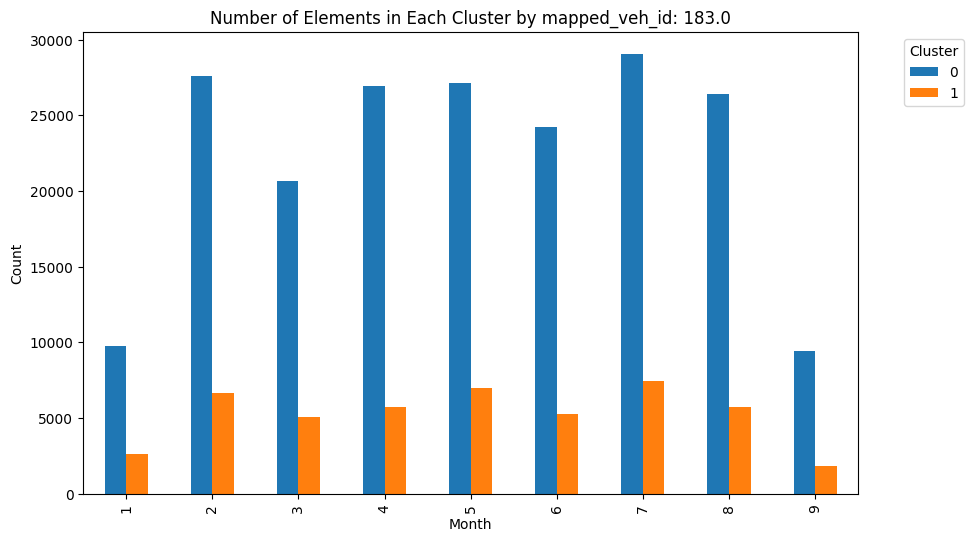

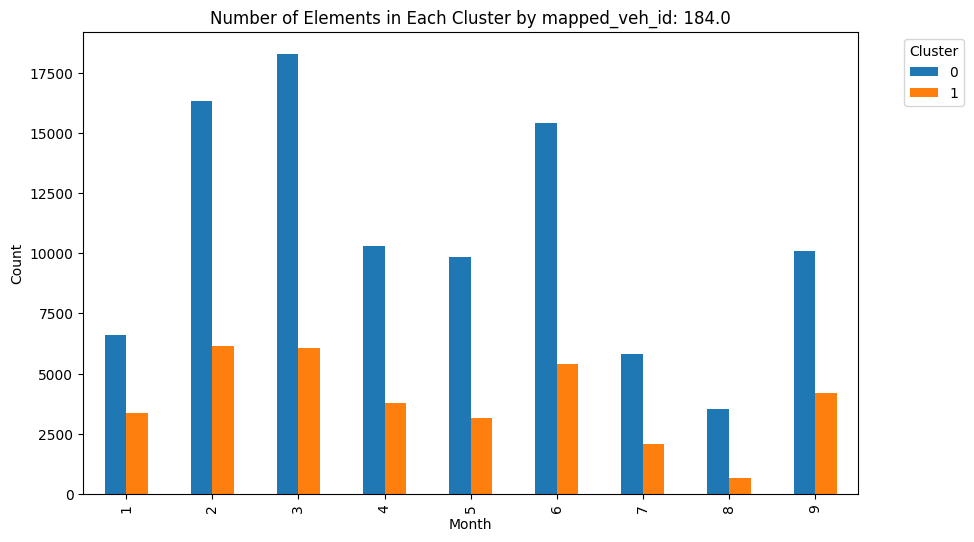

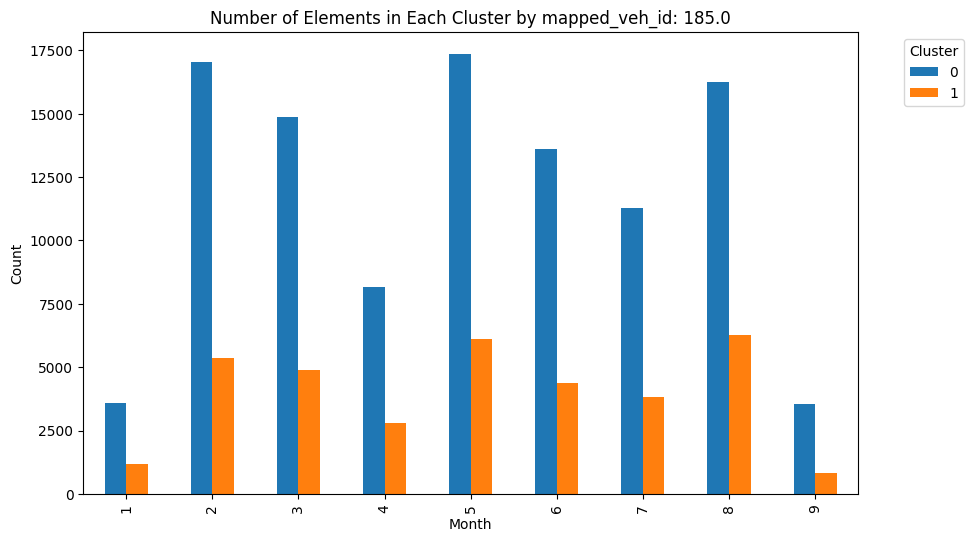

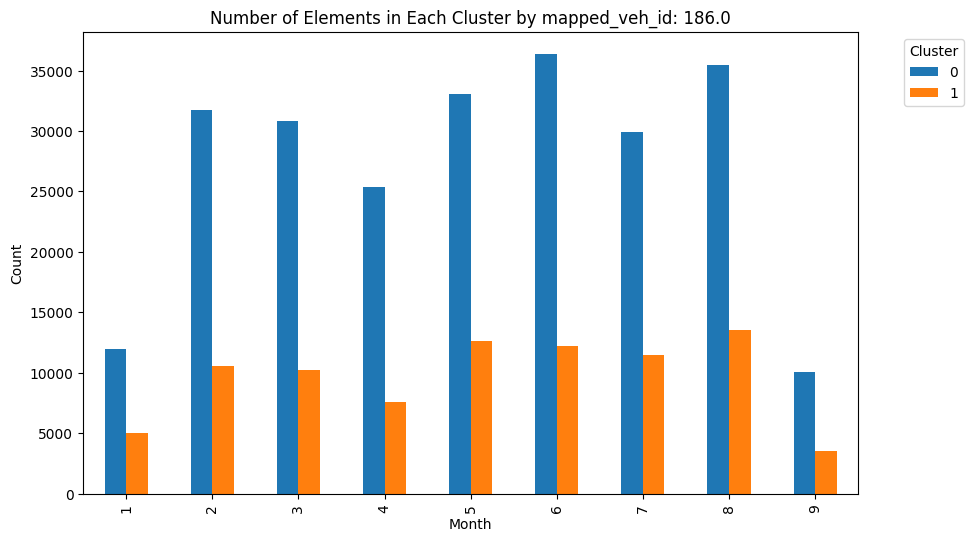

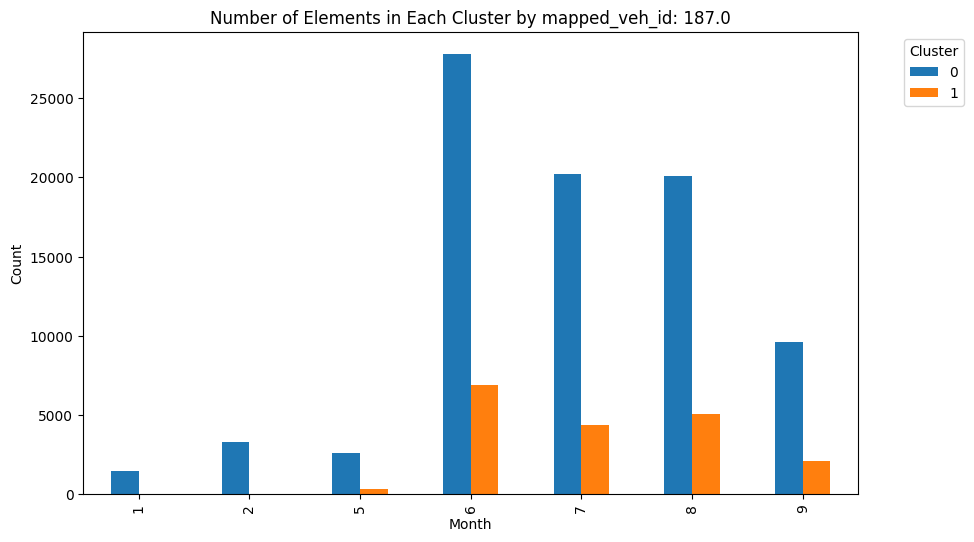

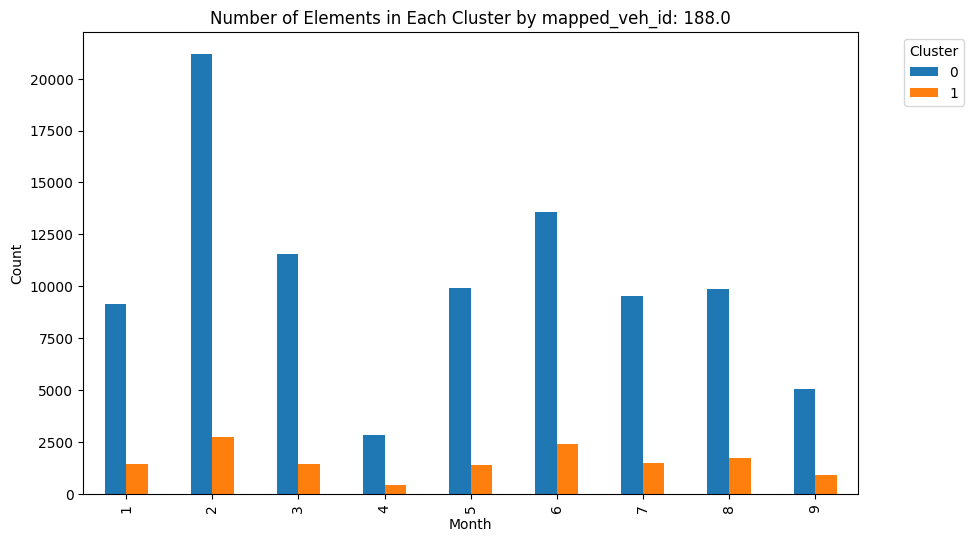

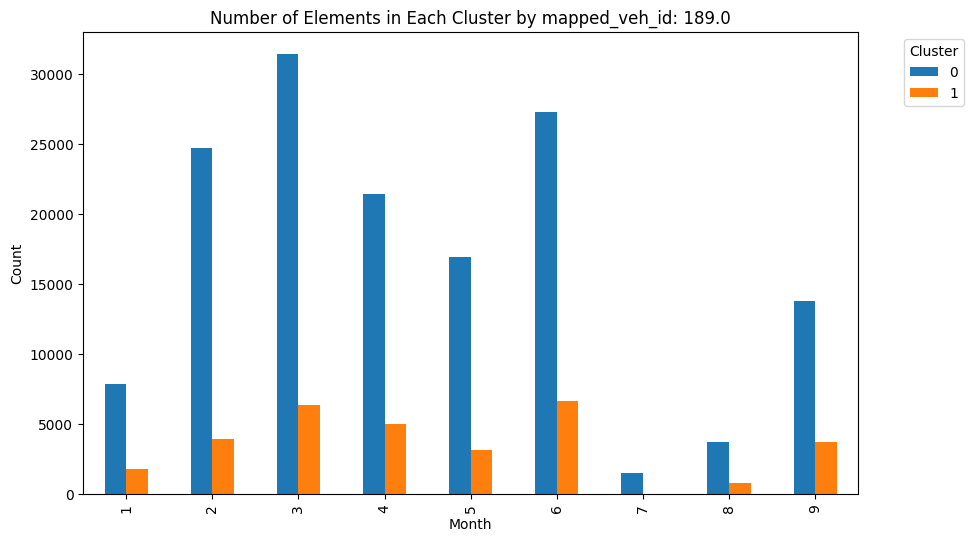

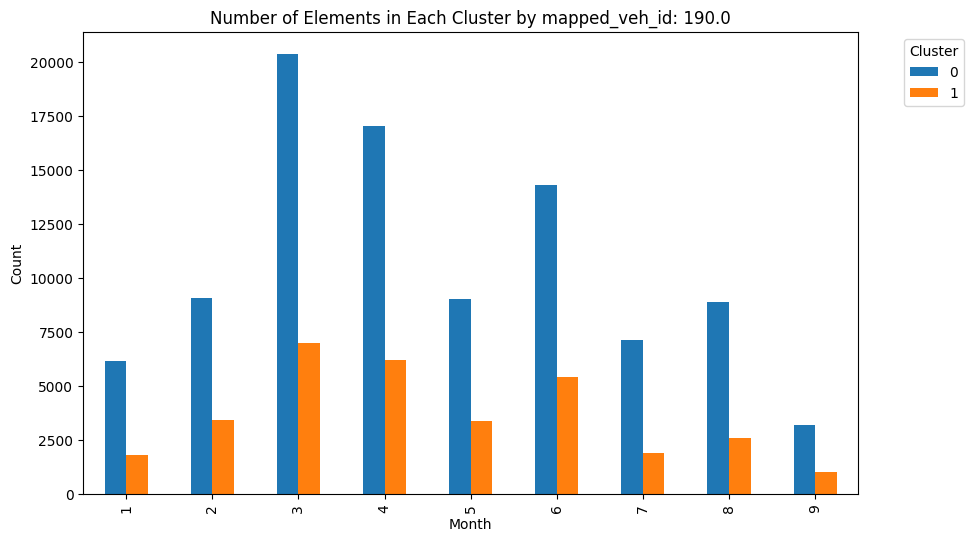

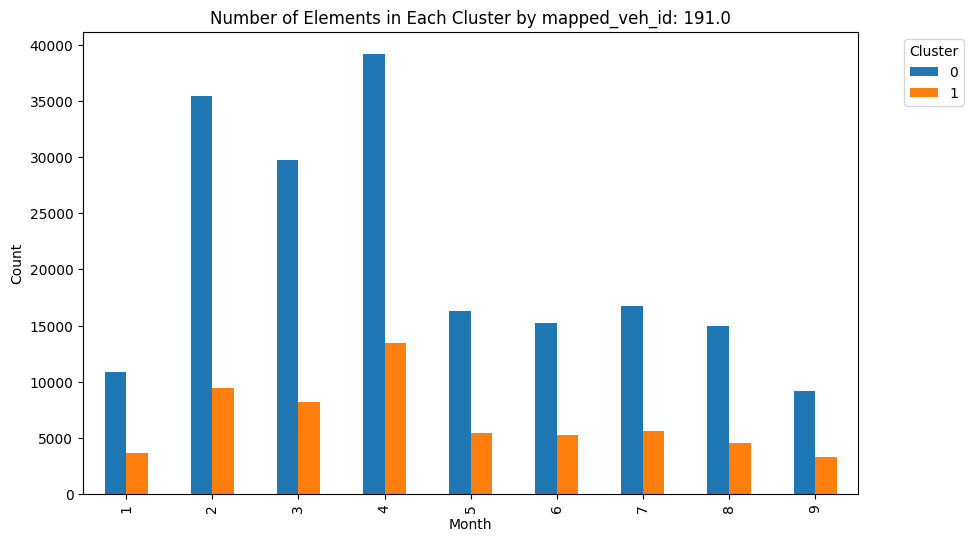

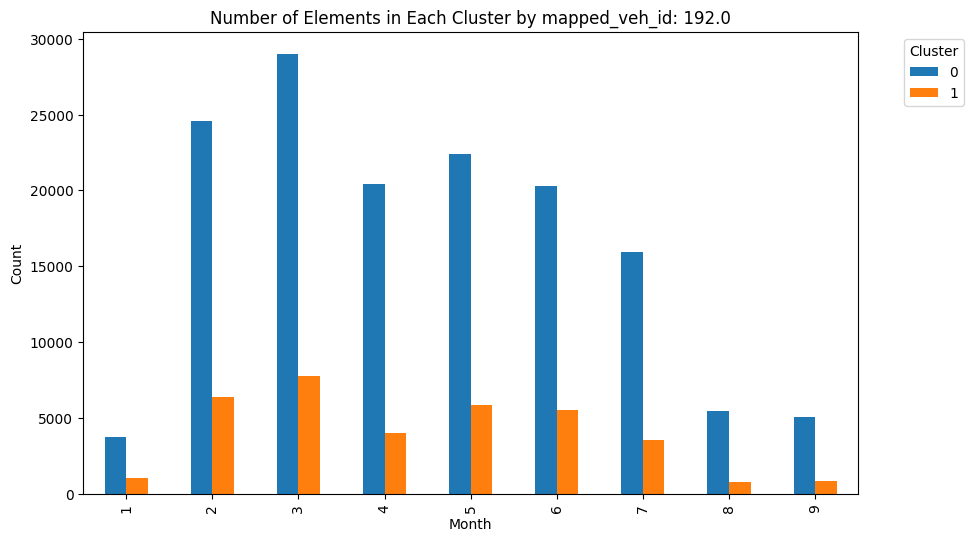

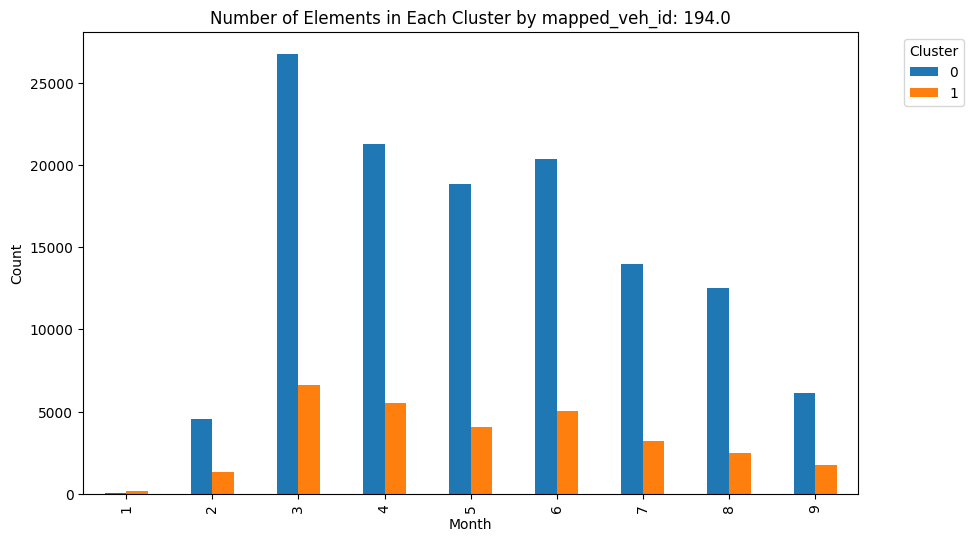

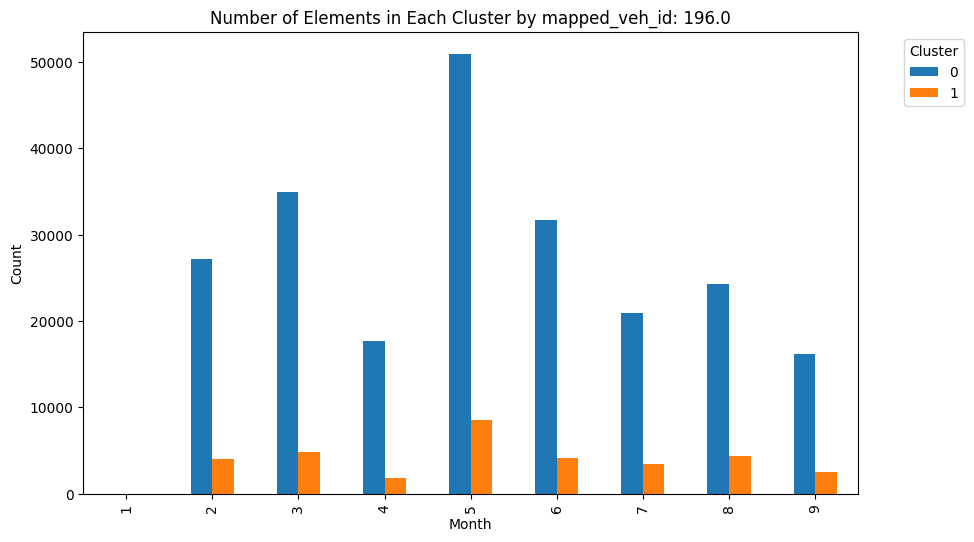

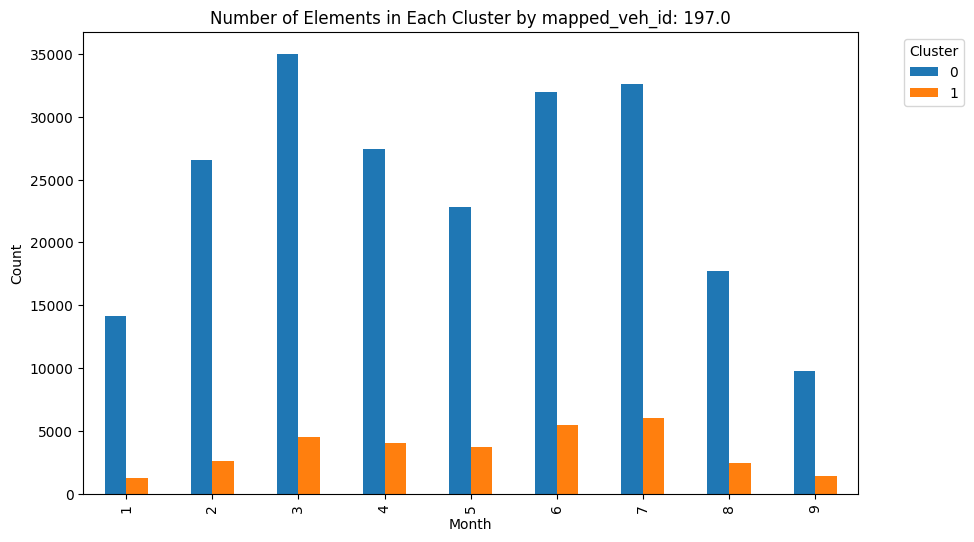

In [126]:
# Extract the month from the 'timestamps_UTC' column
data['month'] = pd.to_datetime(data['timestamps_UTC']).dt.month

# Group the data by 'mapped_veh_id', 'month', and 'cluster_Robust' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'month', 'cluster_Robust']).size().reset_index(name='count')

# Pivot the data to have 'mapped_veh_id' as the index, 'month' as the columns, 'cluster_Robust' as the sub-columns, and 'count' as the values
pivot_data = cluster_elements.pivot_table(index=['mapped_veh_id', 'month'], columns='cluster_Robust', values='count', fill_value=0)

# Plot the bar graph for each 'mapped_veh_id'
for veh_id in pivot_data.index.levels[0]:
    veh_data = pivot_data.loc[veh_id]
    veh_data.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'Number of Elements in Each Cluster by mapped_veh_id: {veh_id}')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

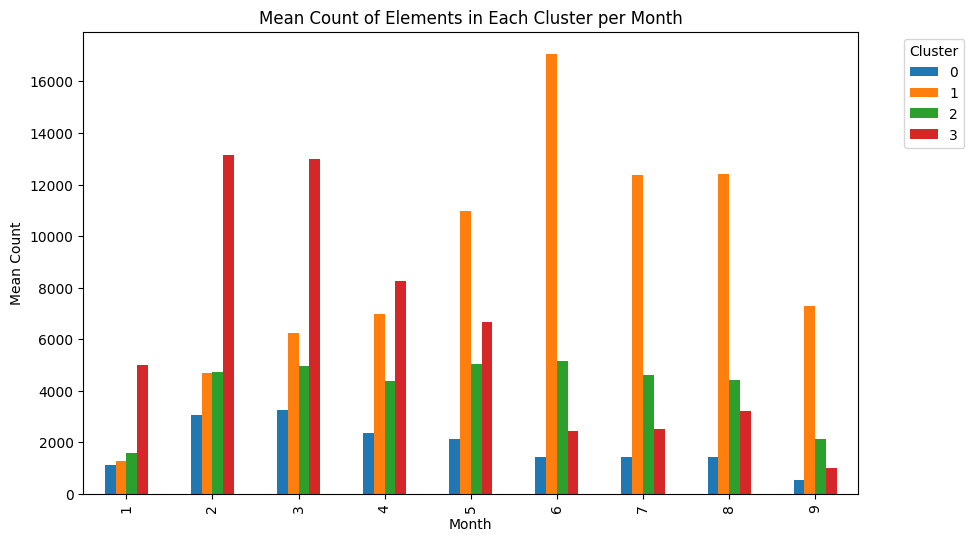

In [110]:
# Extract the month from the 'timestamps_UTC' column
data['month'] = pd.to_datetime(data['timestamps_UTC']).dt.month

# Group the data by 'mapped_veh_id', 'month', and 'cluster_Standard' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'month', 'cluster_Standard']).size().reset_index(name='count')

# Group by 'month' and 'cluster_Standard' and calculate the mean count
mean_count = cluster_elements.groupby(['month', 'cluster_Standard'])['count'].mean().reset_index()

# Pivot the data to have 'month' as the index, 'cluster_Standard' as the columns, and 'count' as the values
pivot_data = mean_count.pivot(index='month', columns='cluster_Standard', values='count')

# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the bar graph for mean count for each cluster per month
pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=custom_colors)
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.title('Mean Count of Elements in Each Cluster per Month')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

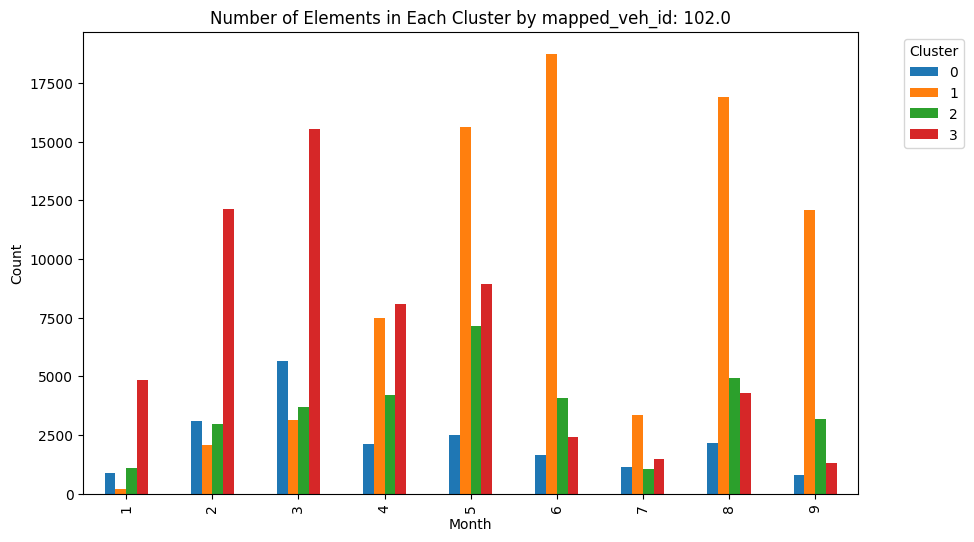

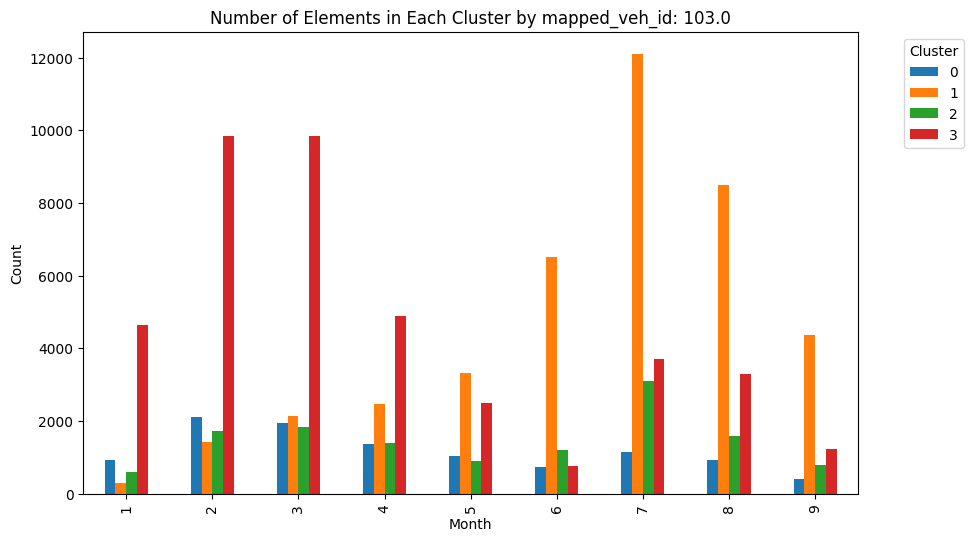

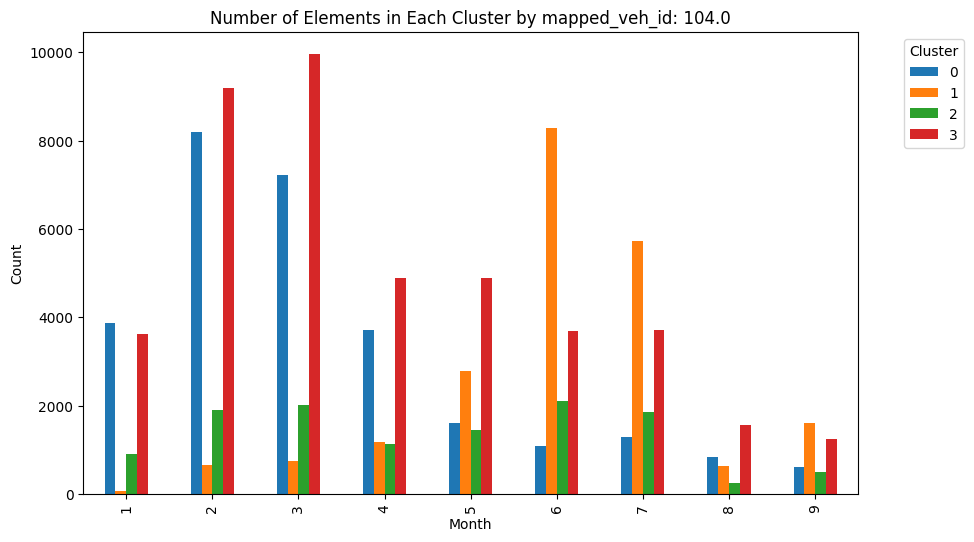

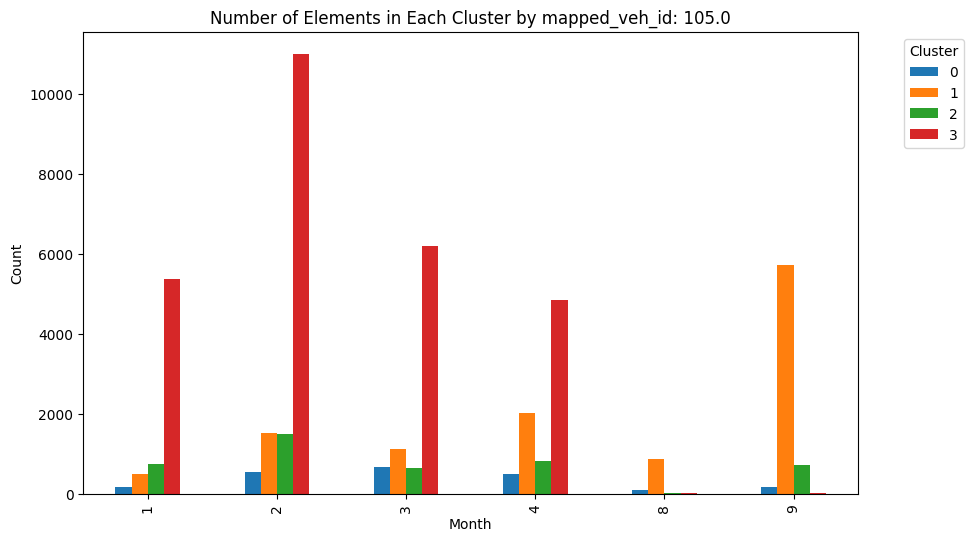

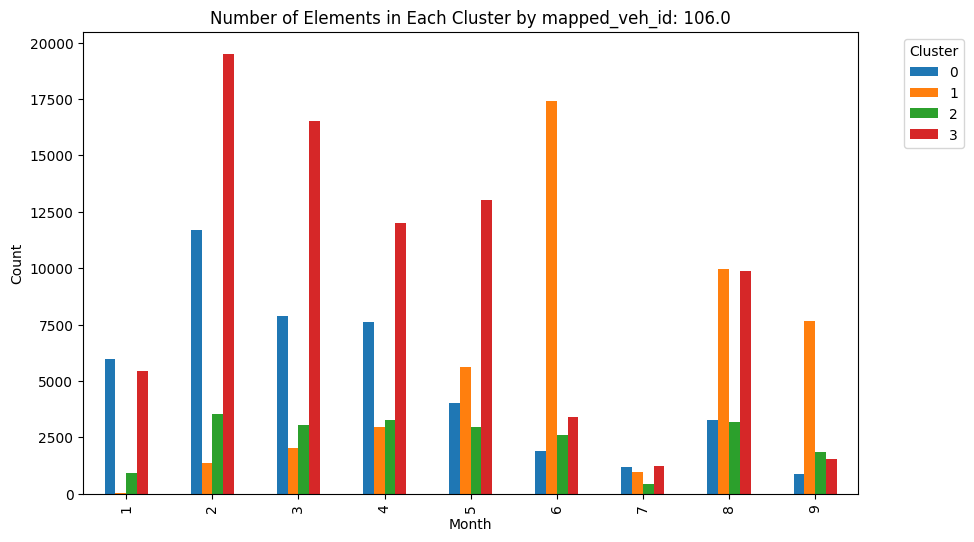

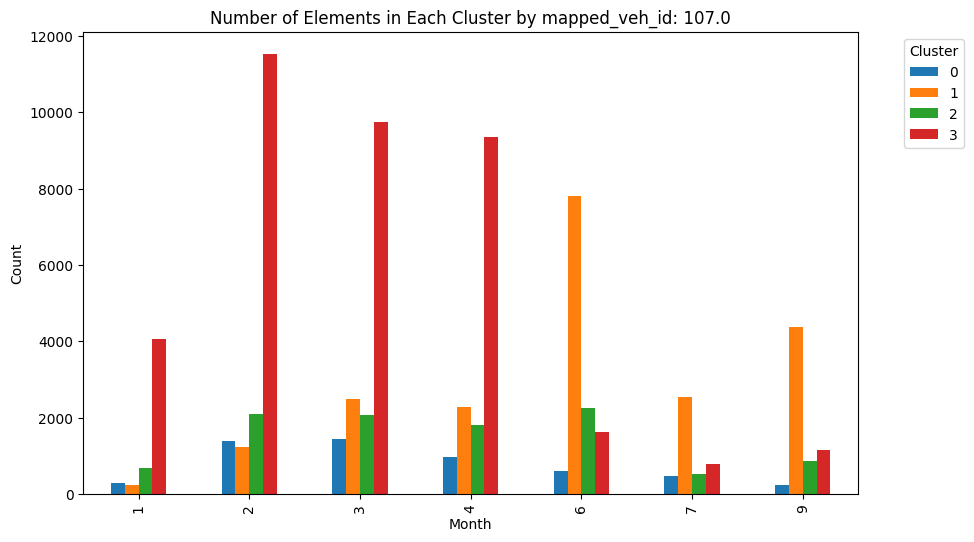

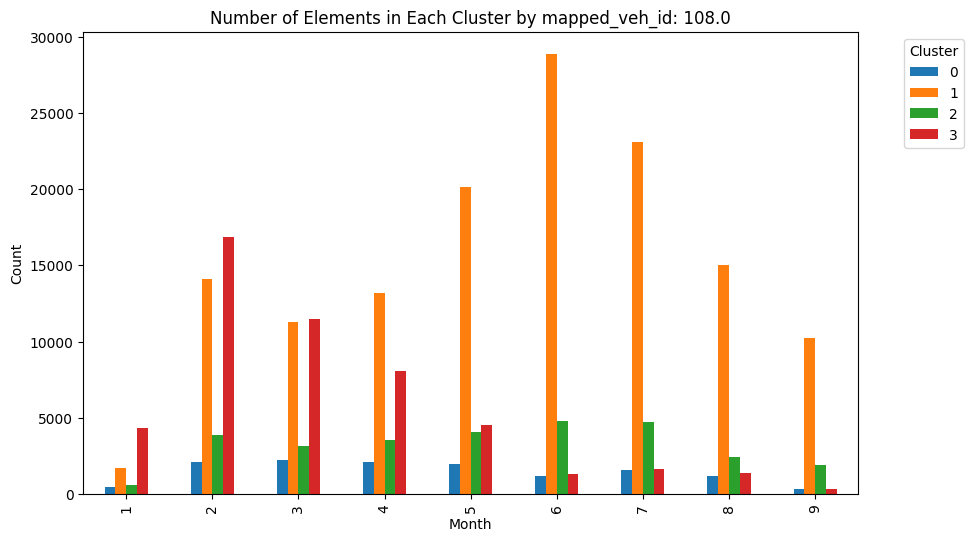

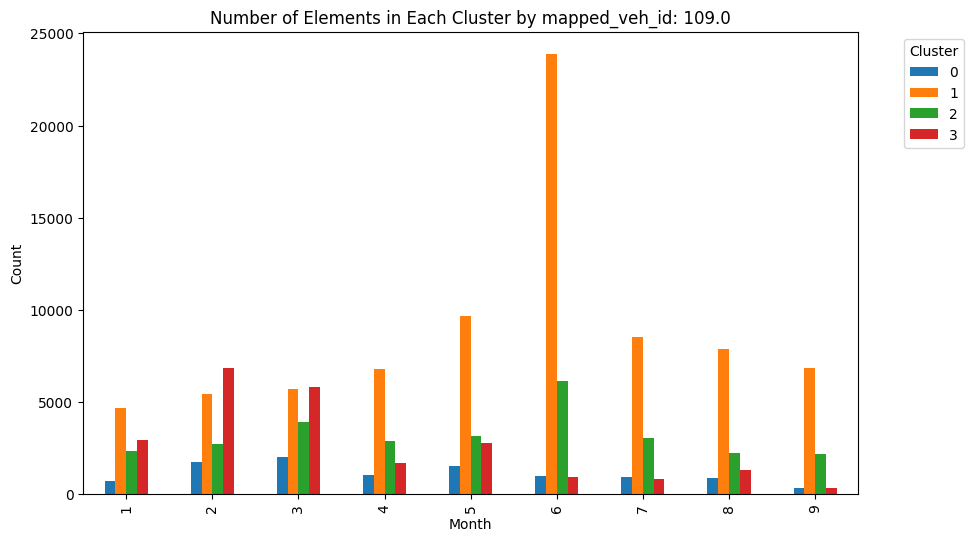

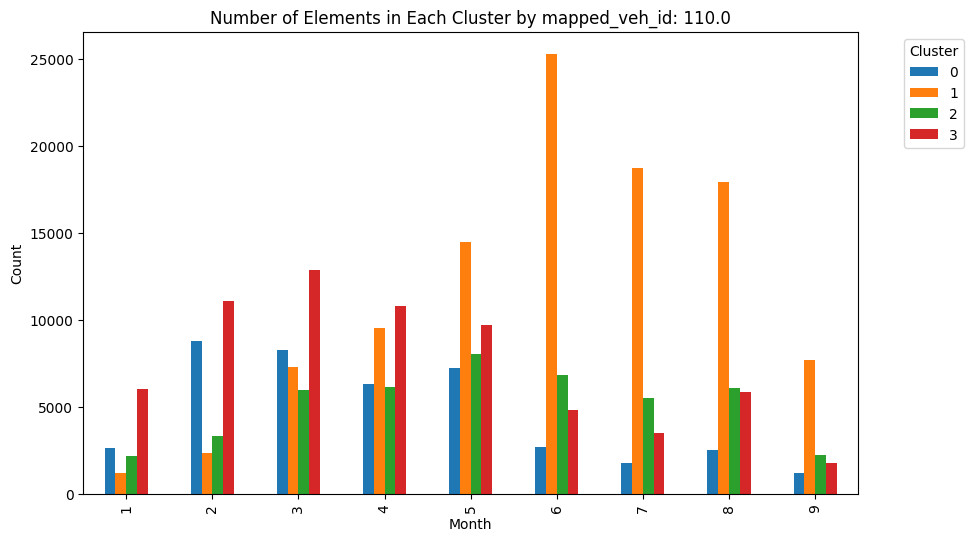

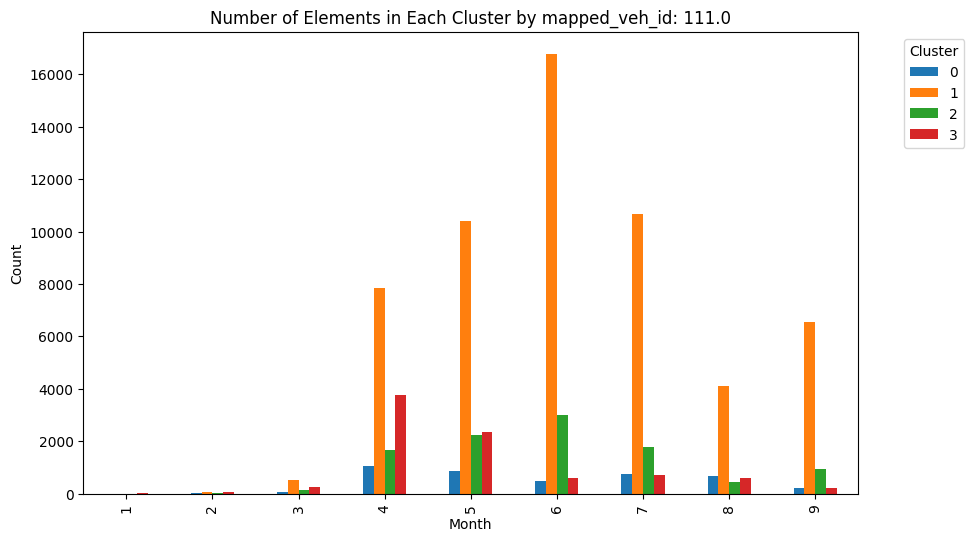

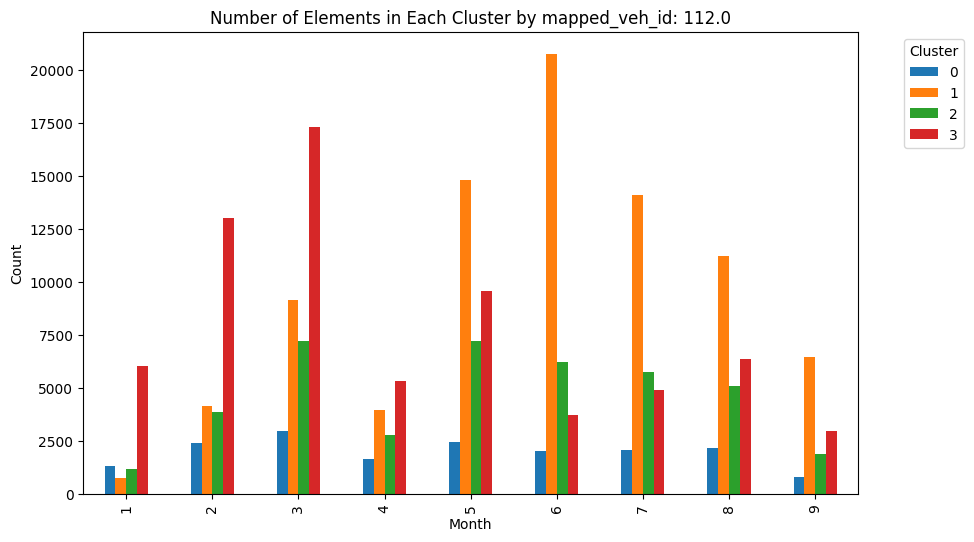

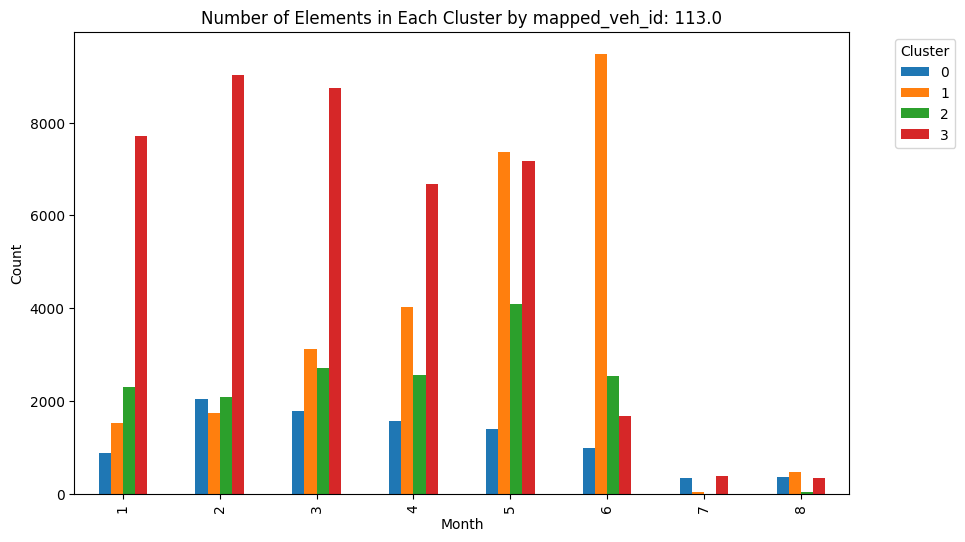

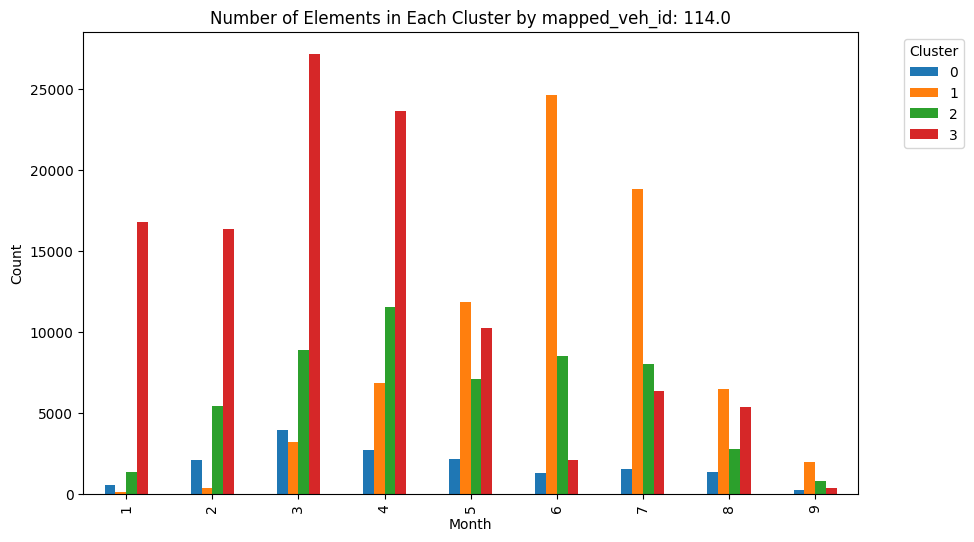

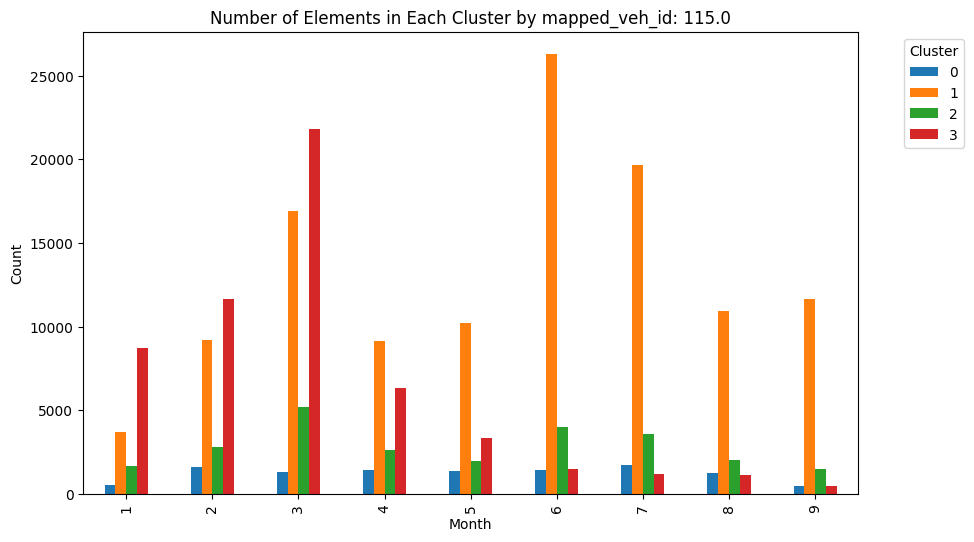

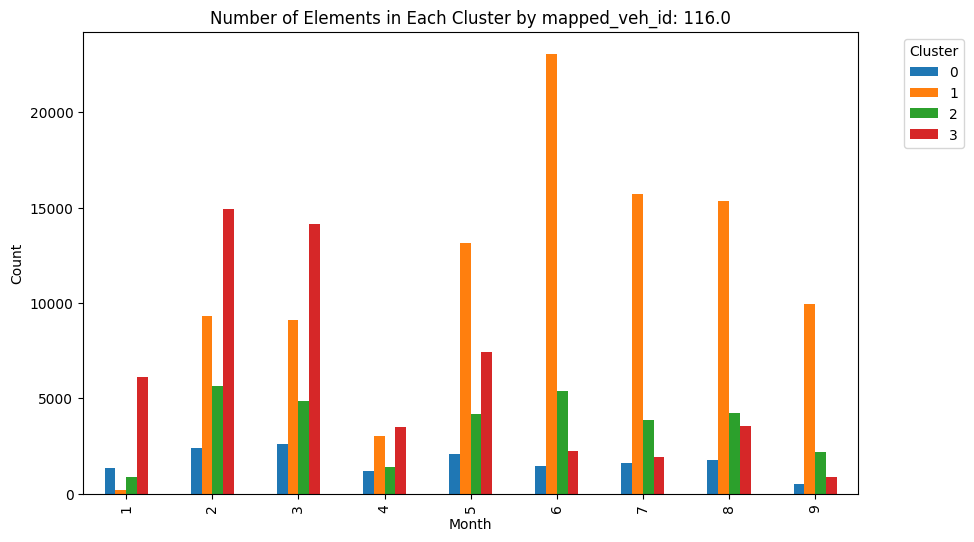

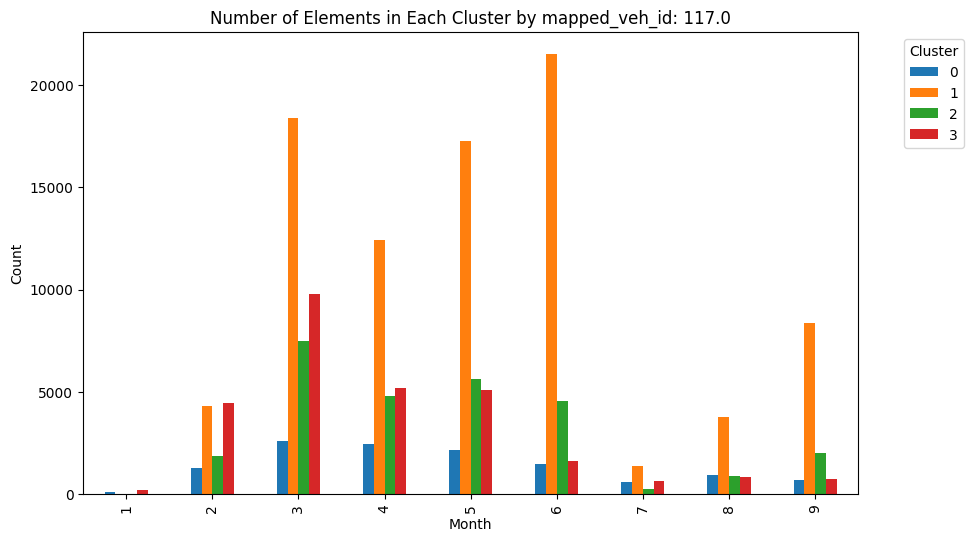

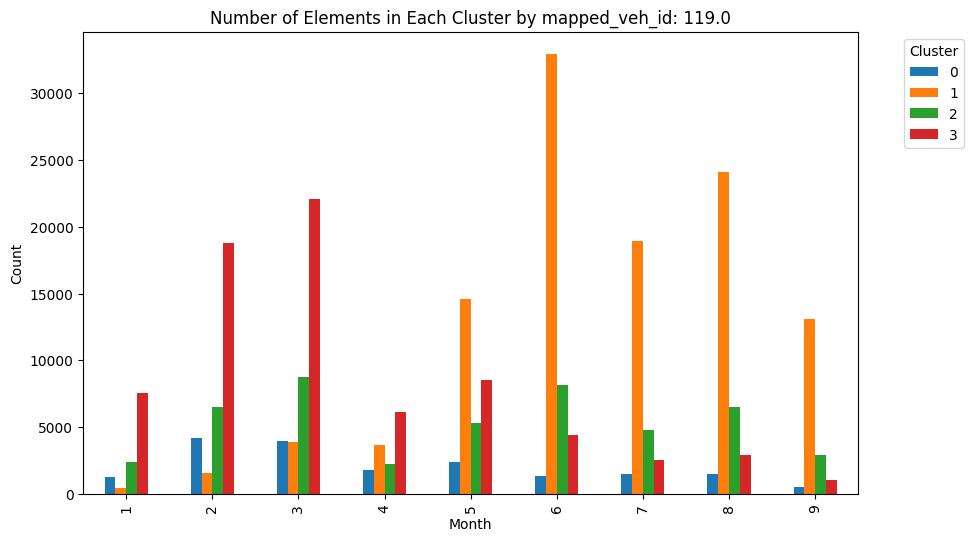

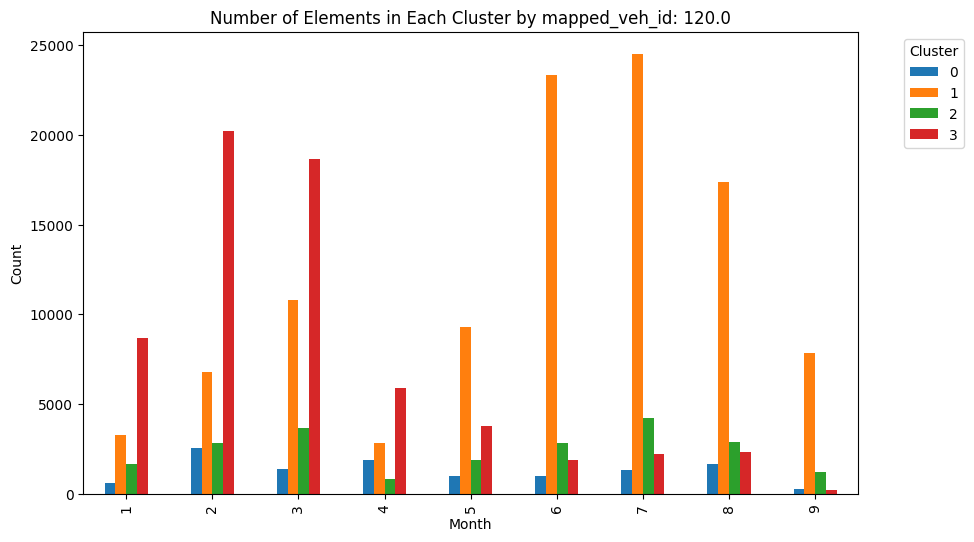

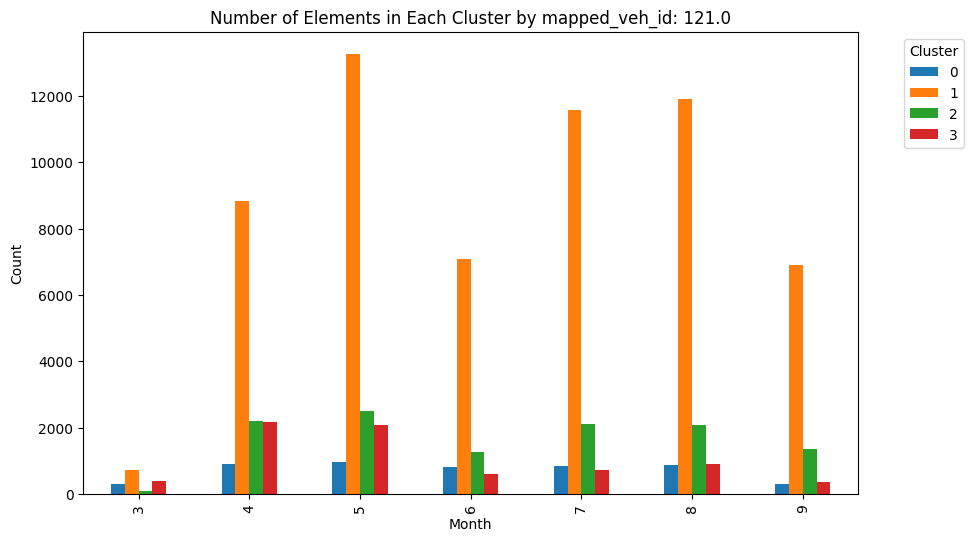

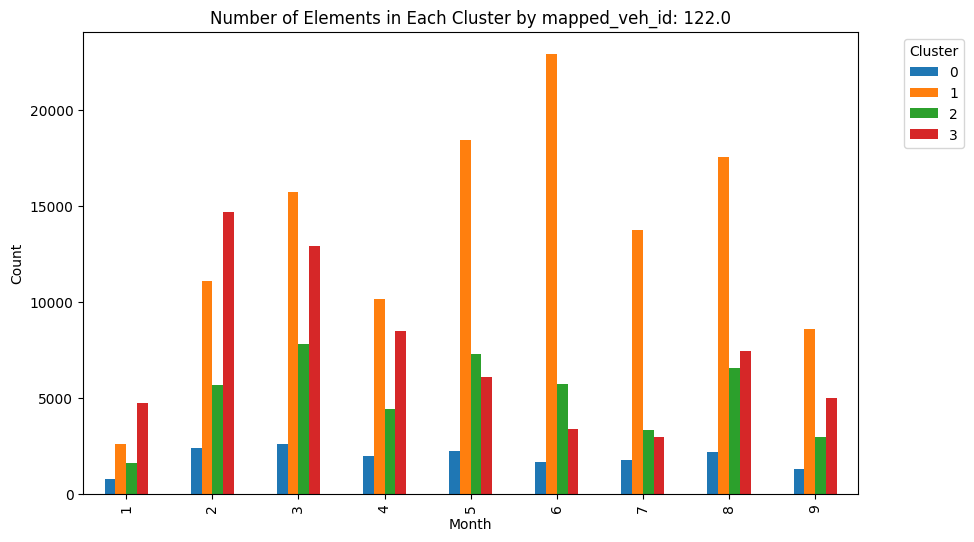

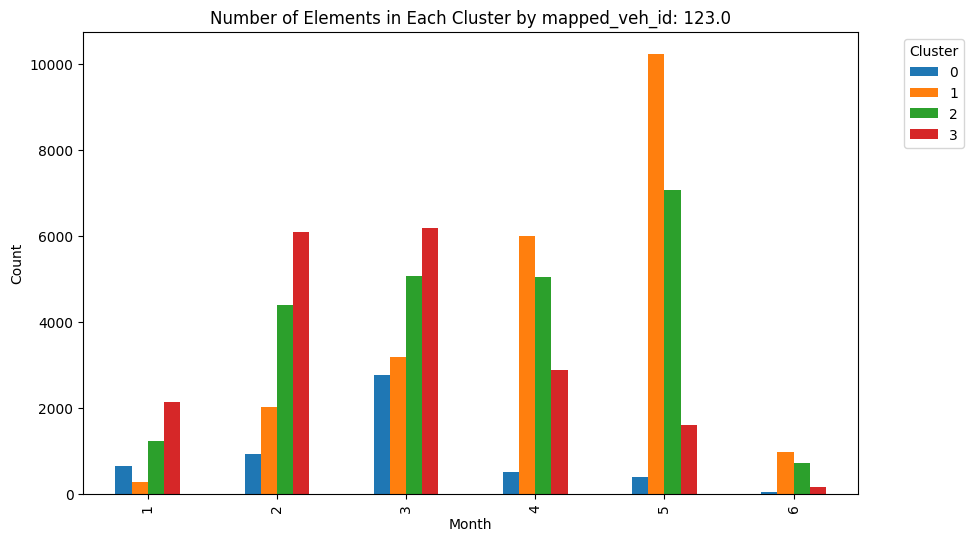

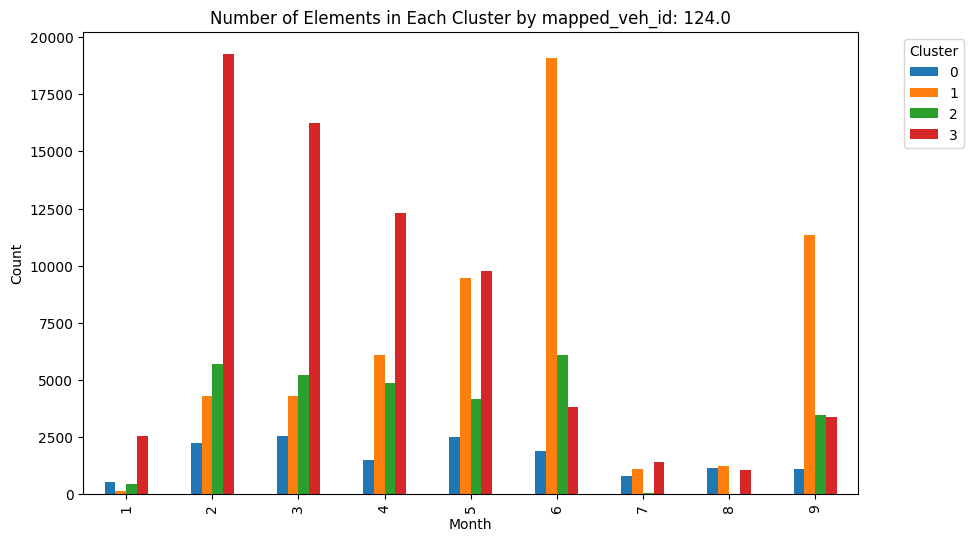

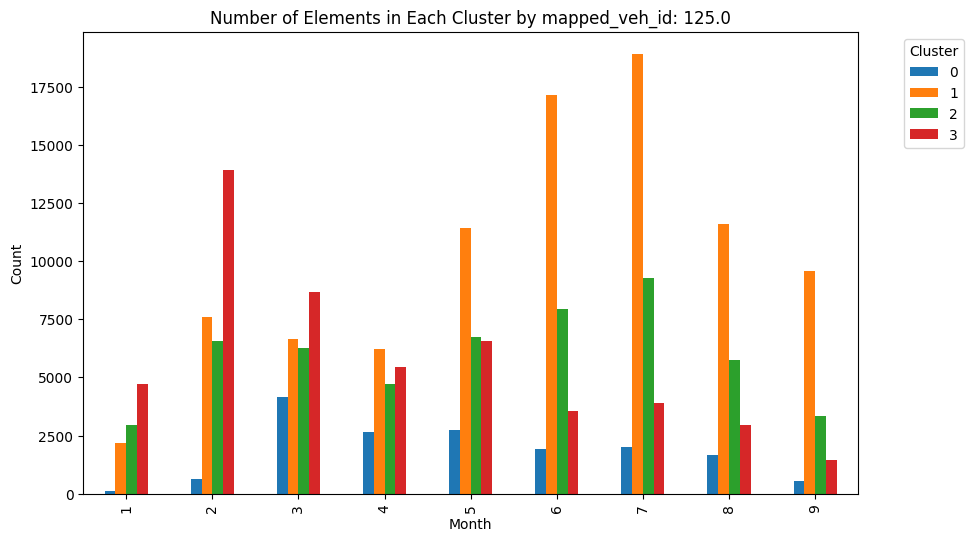

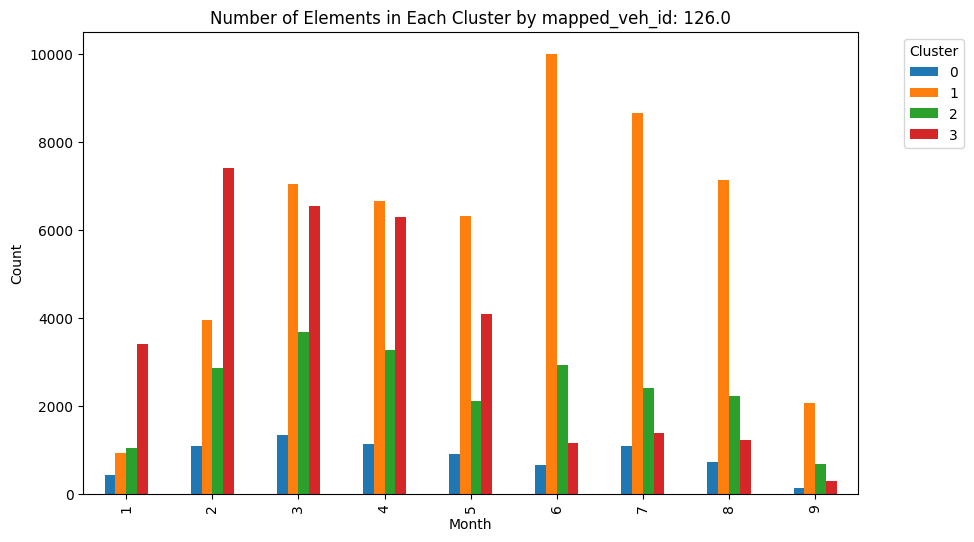

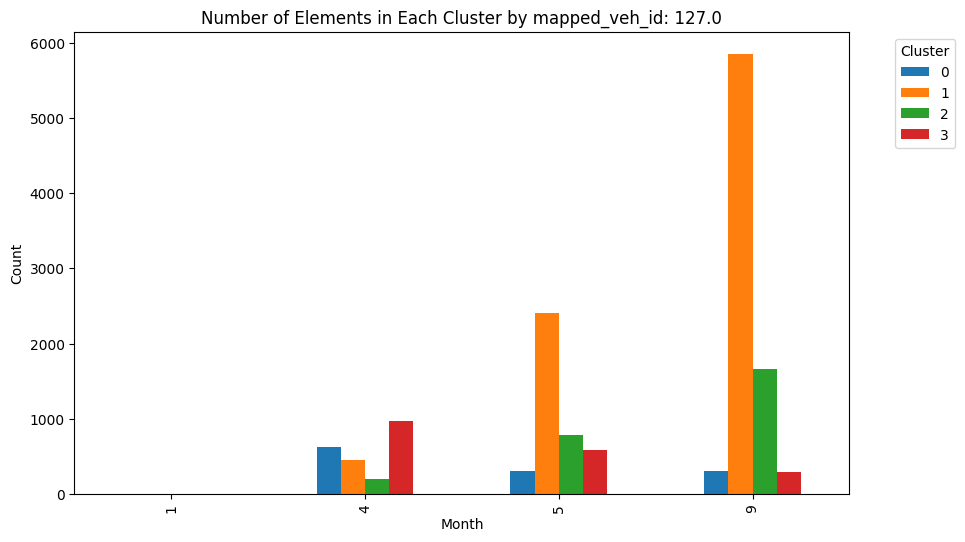

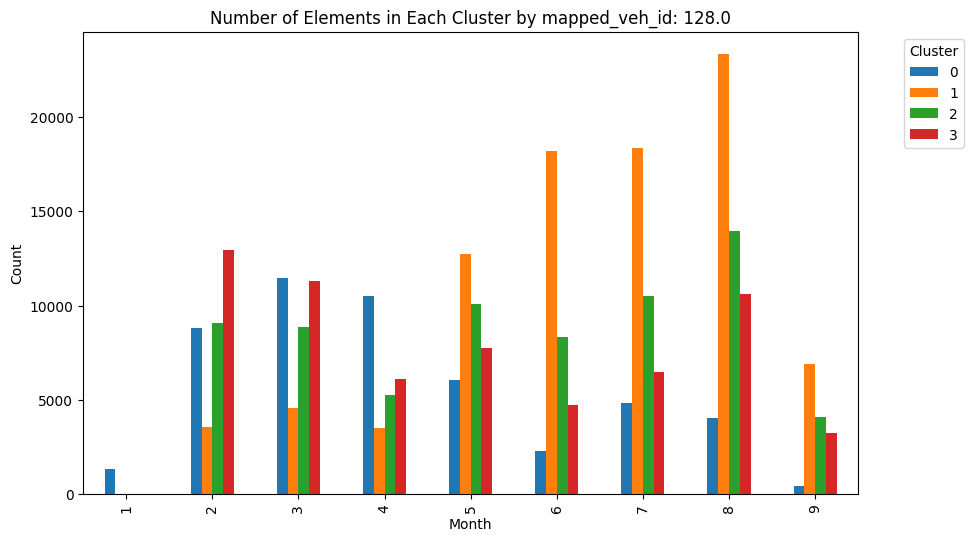

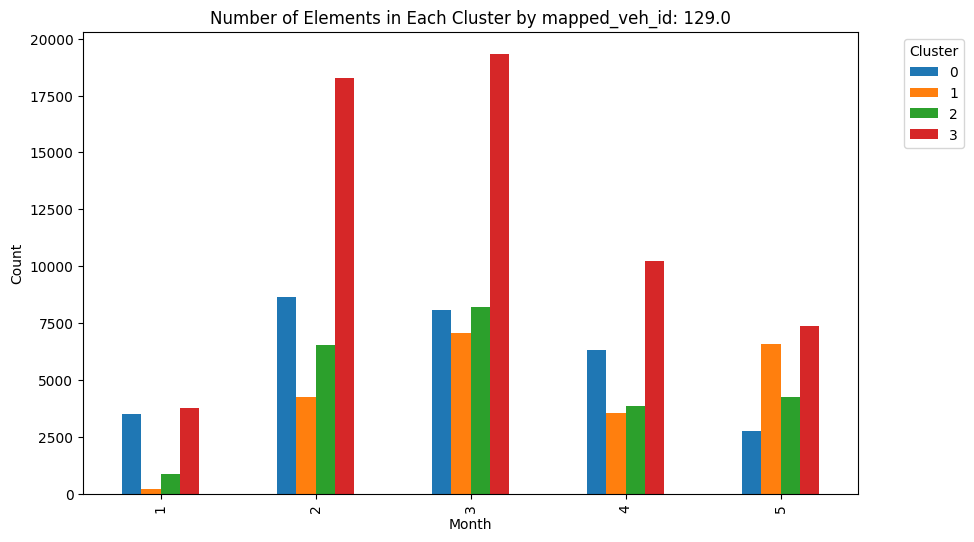

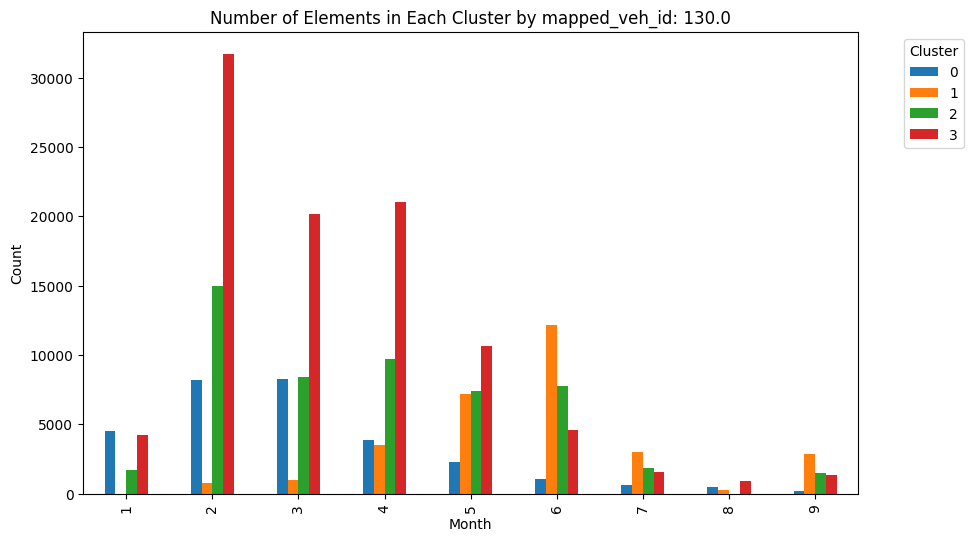

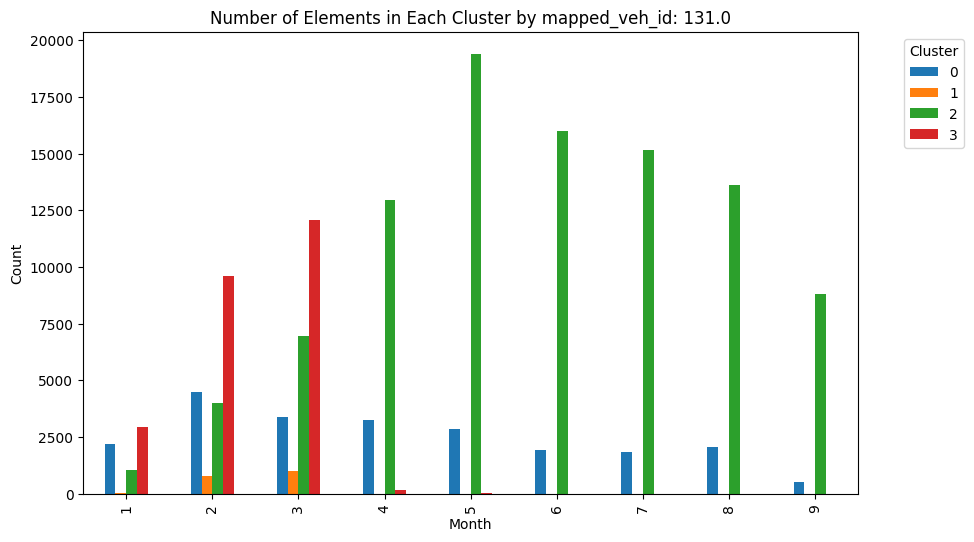

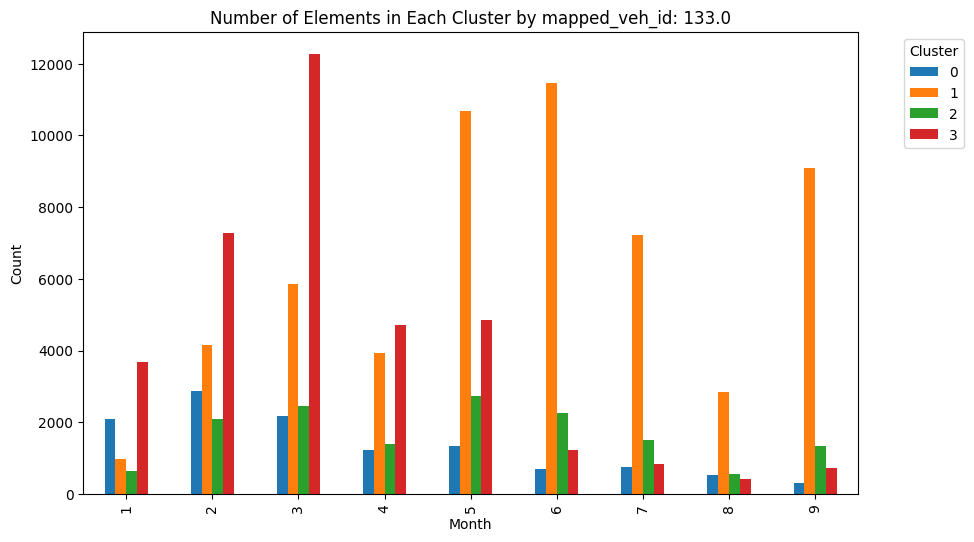

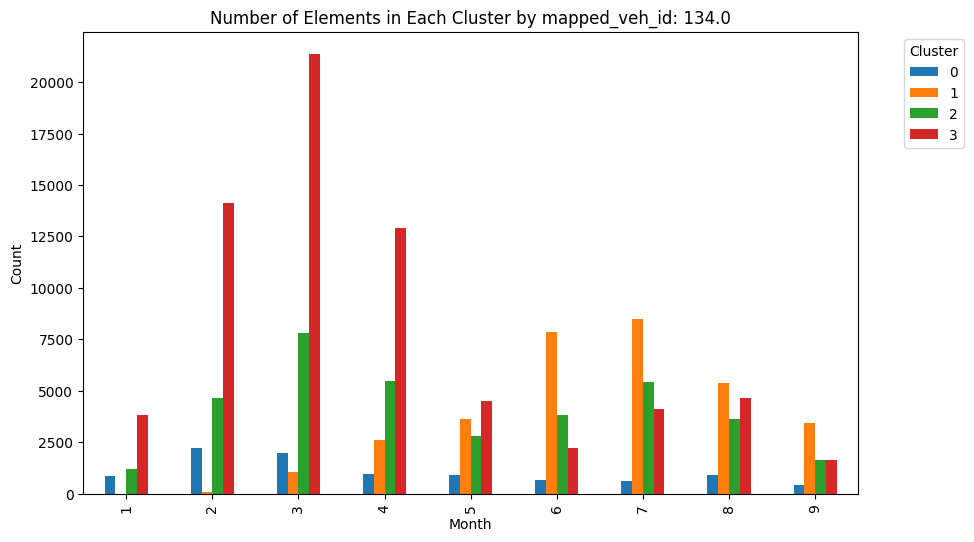

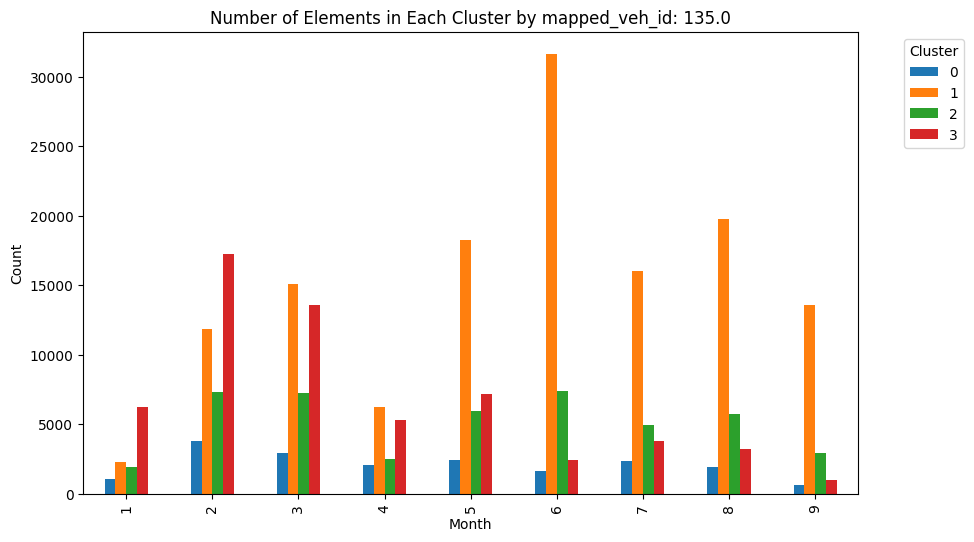

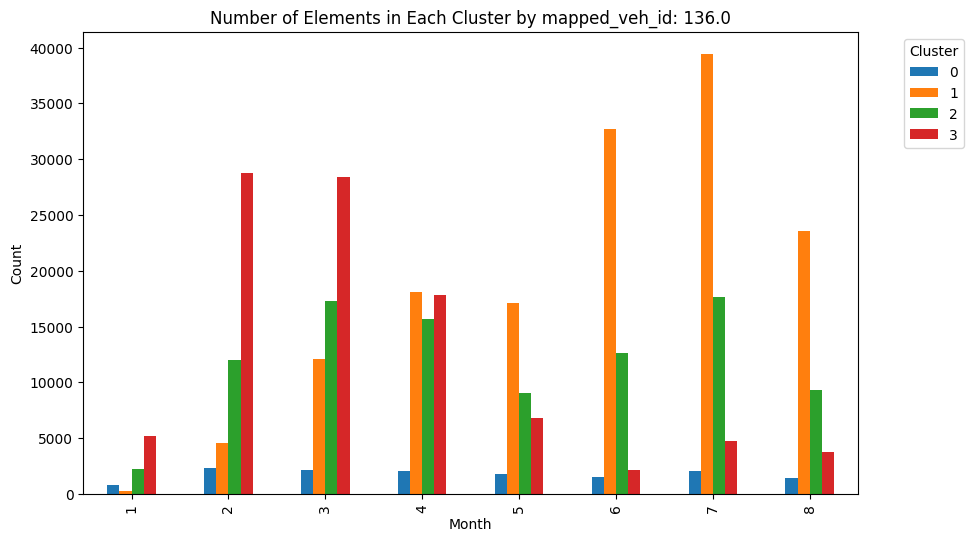

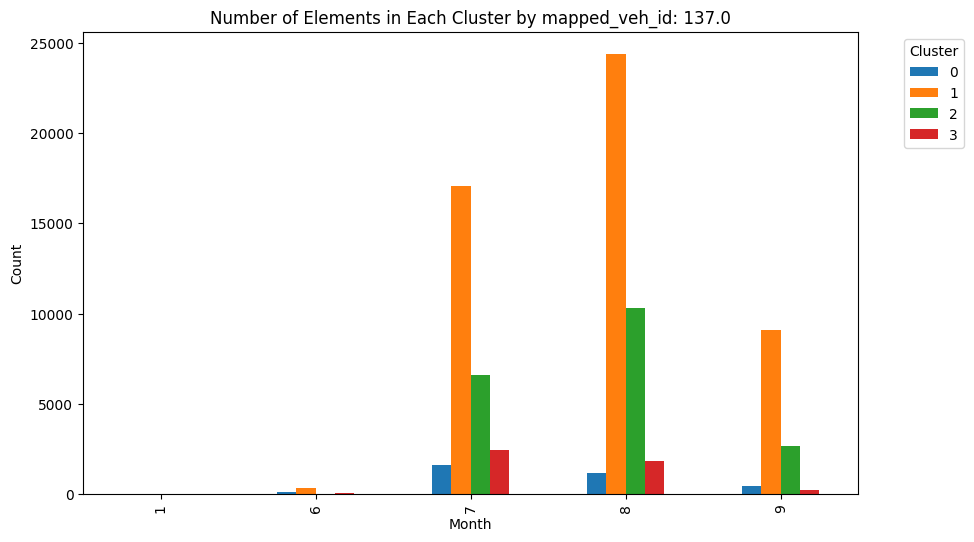

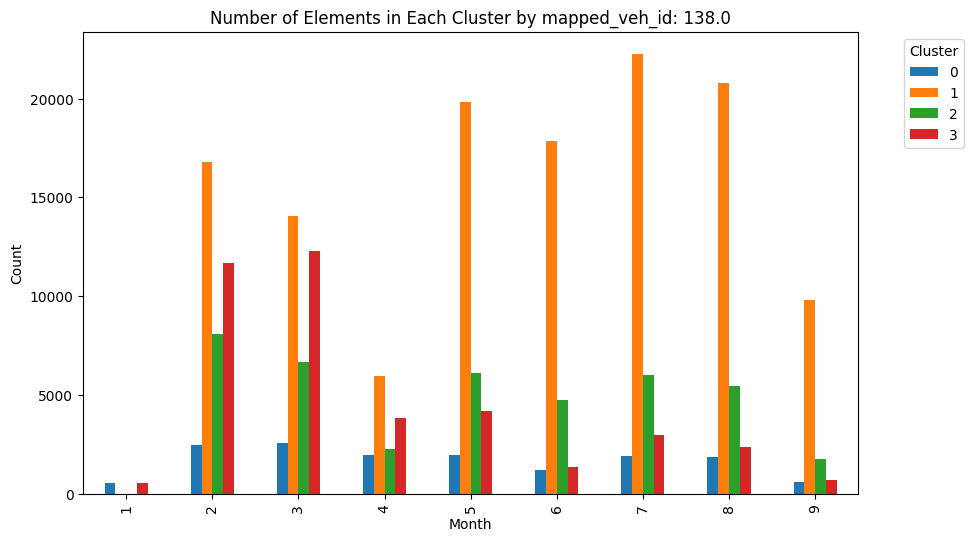

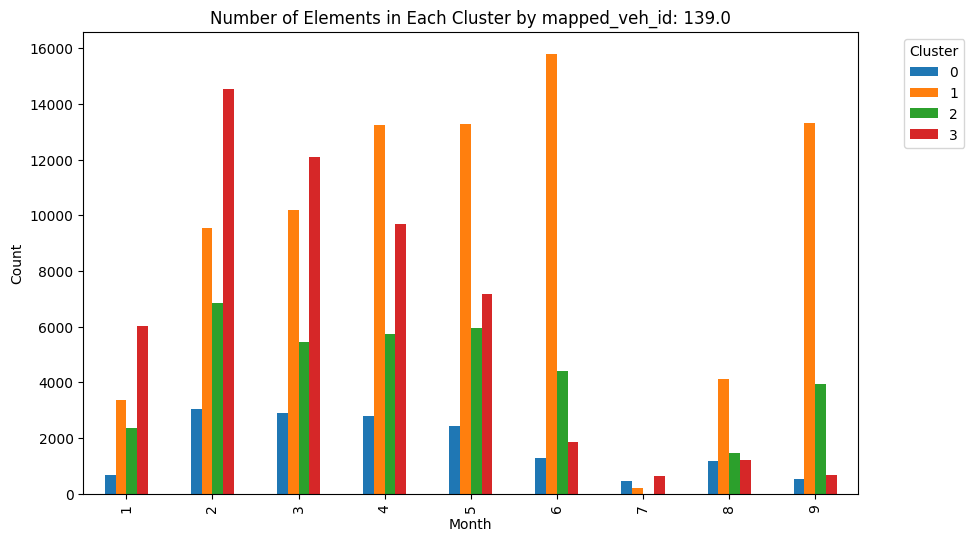

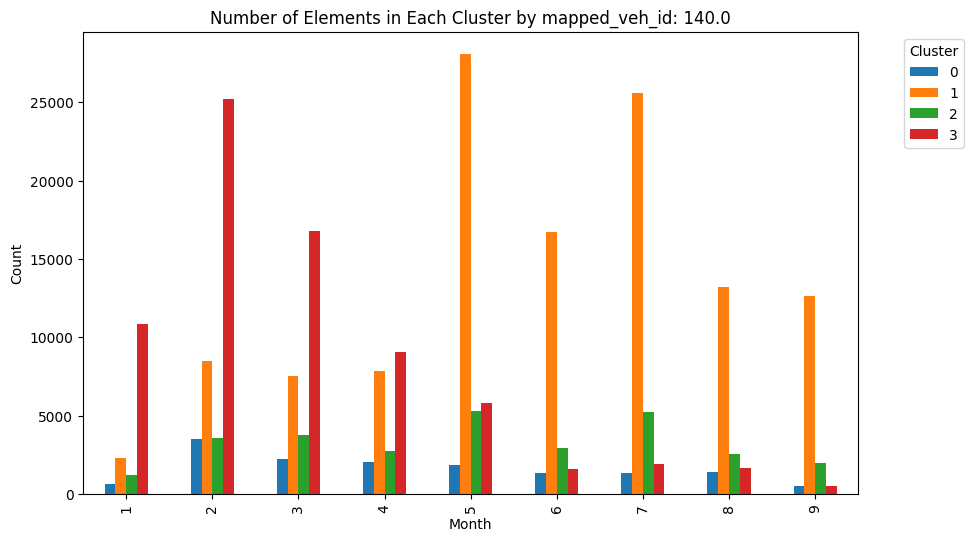

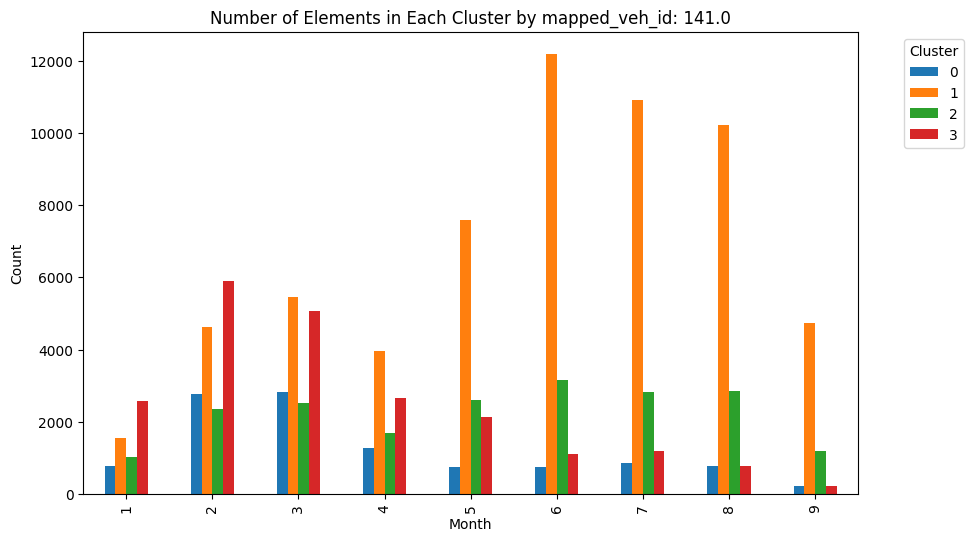

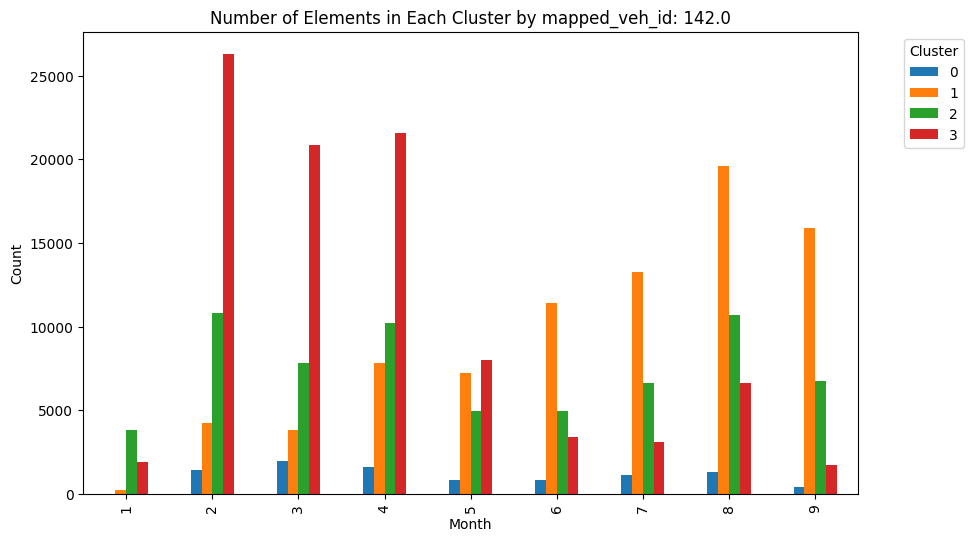

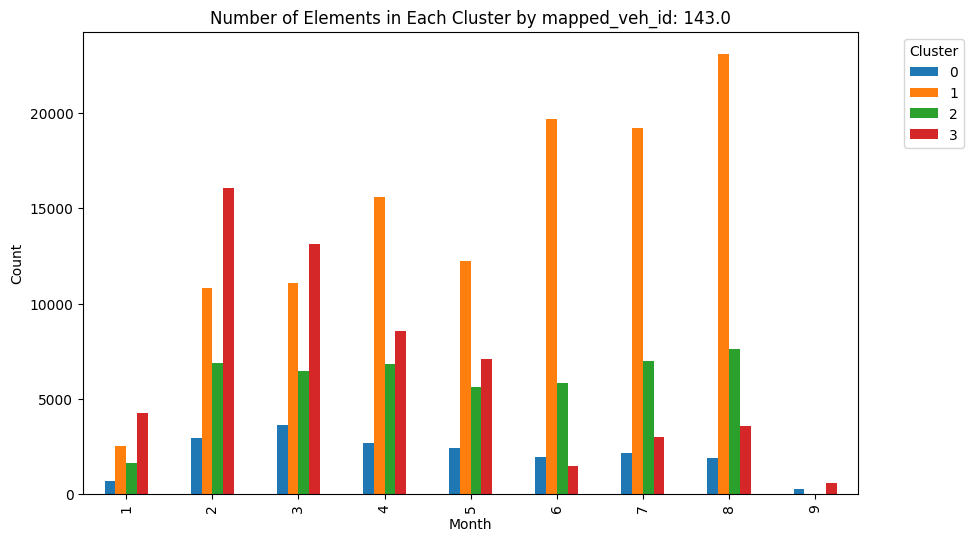

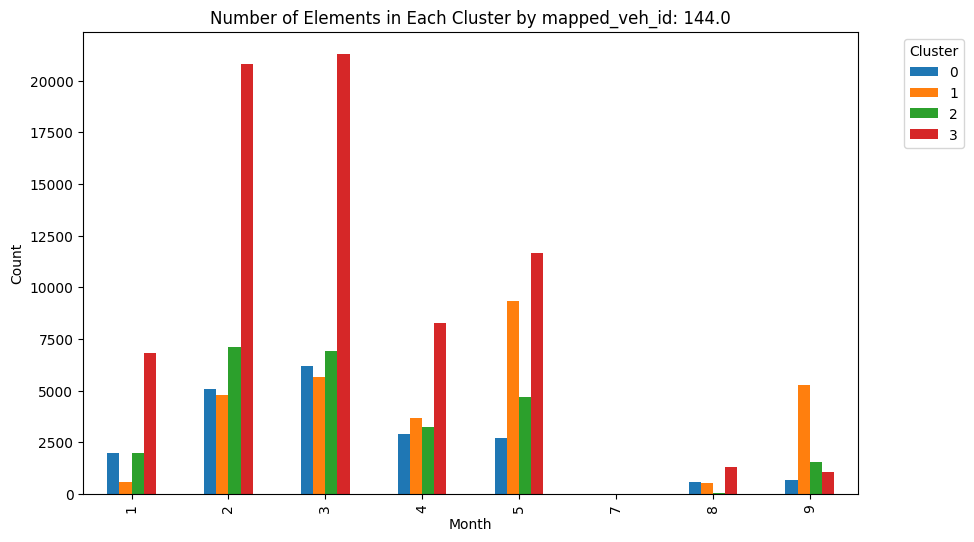

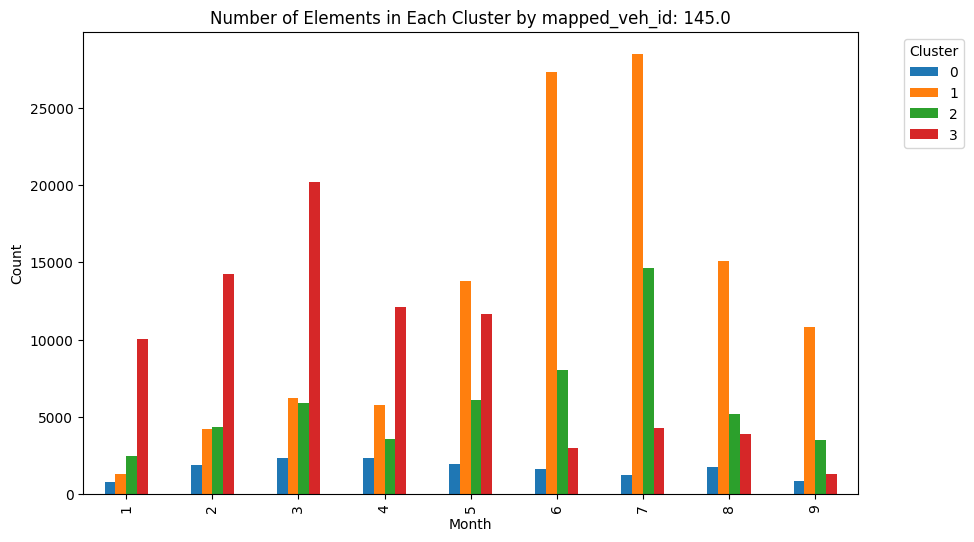

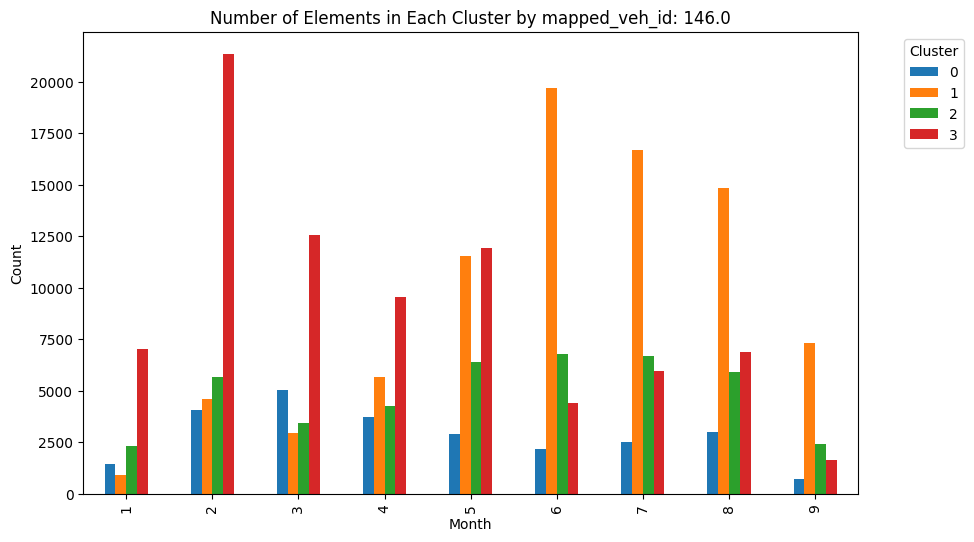

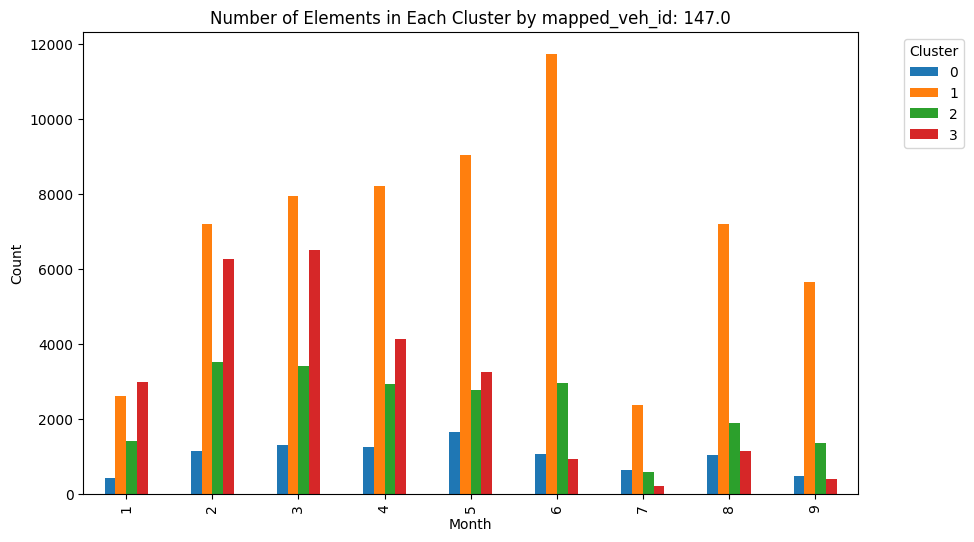

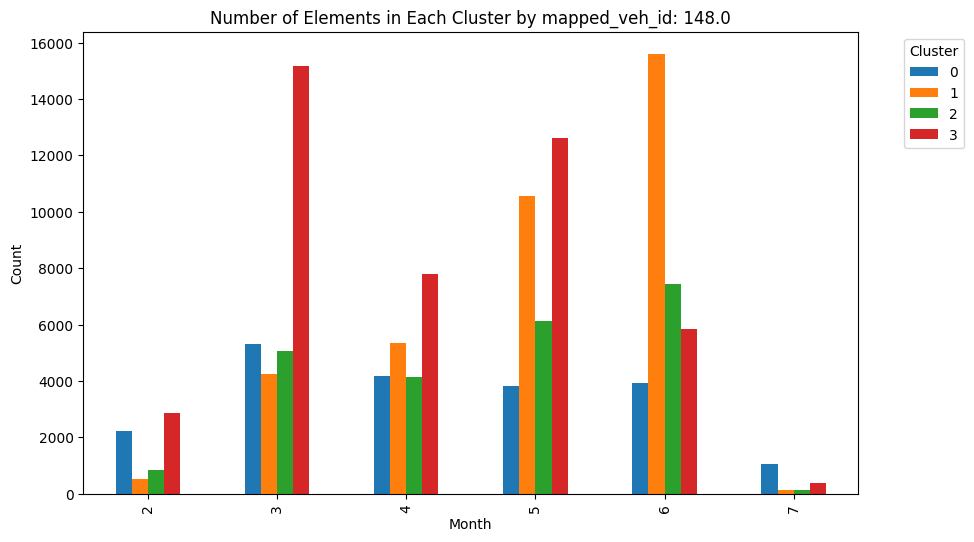

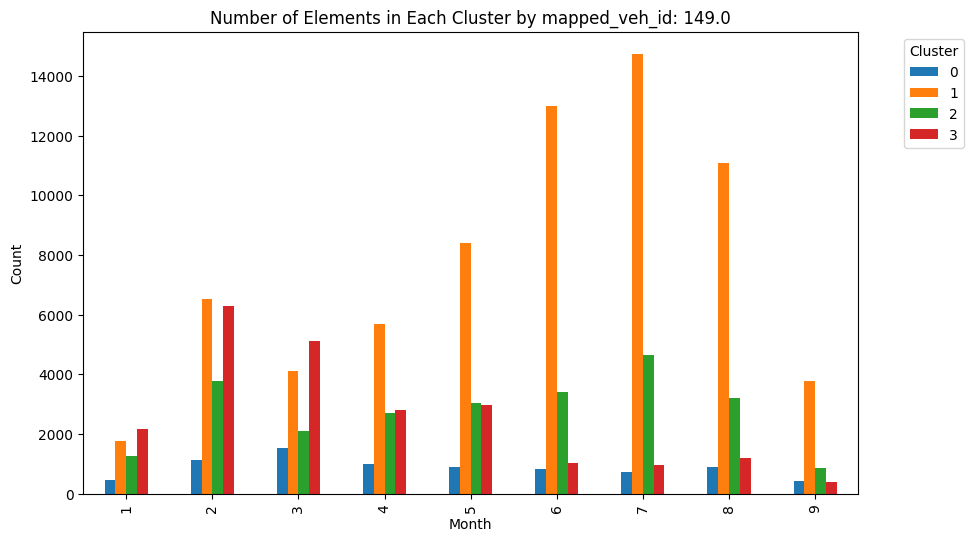

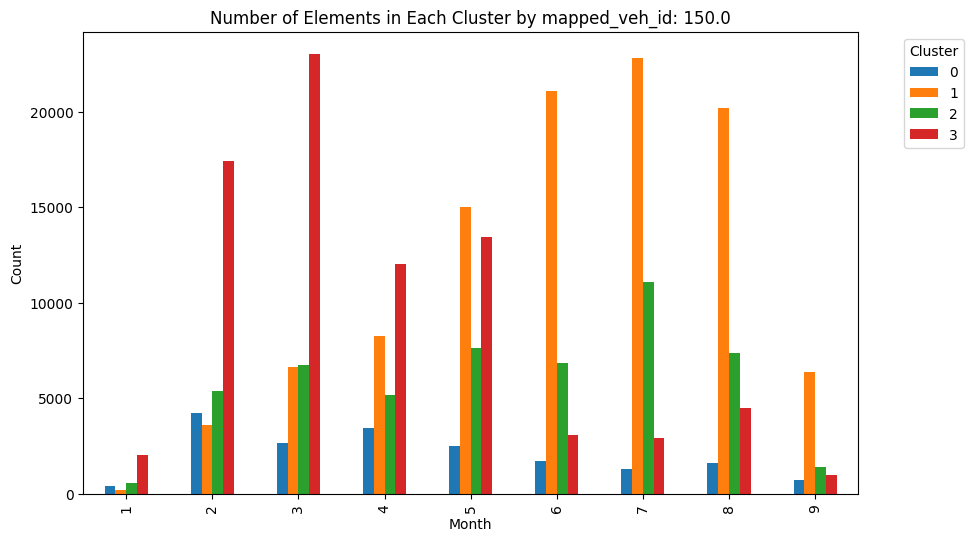

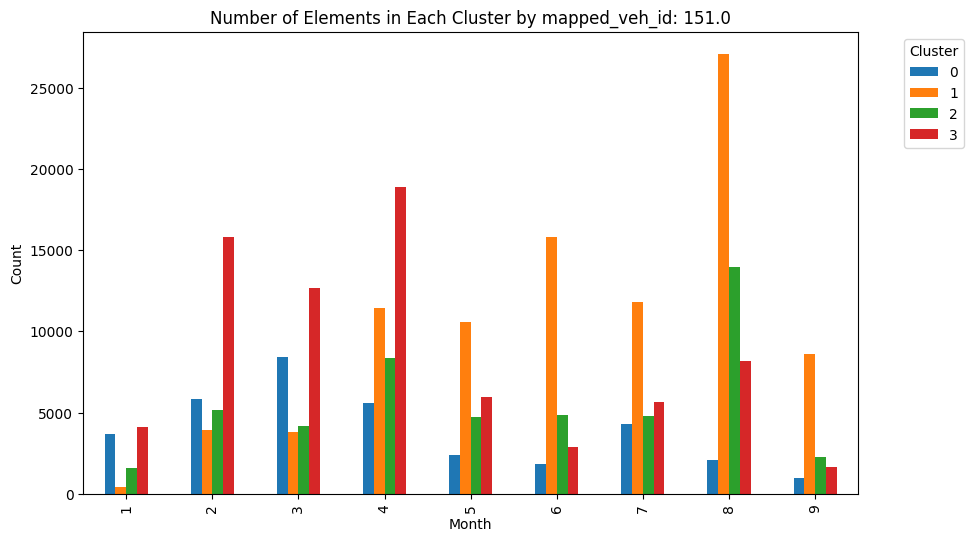

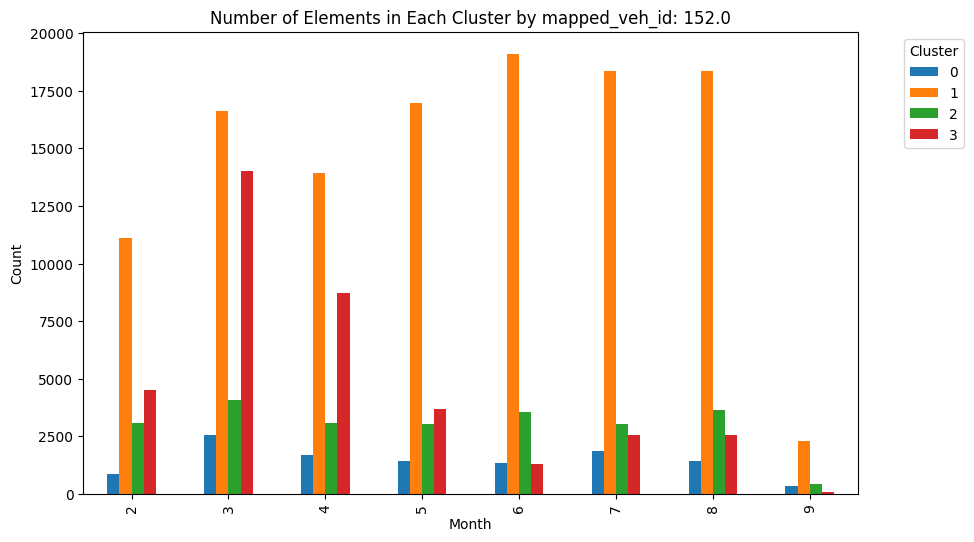

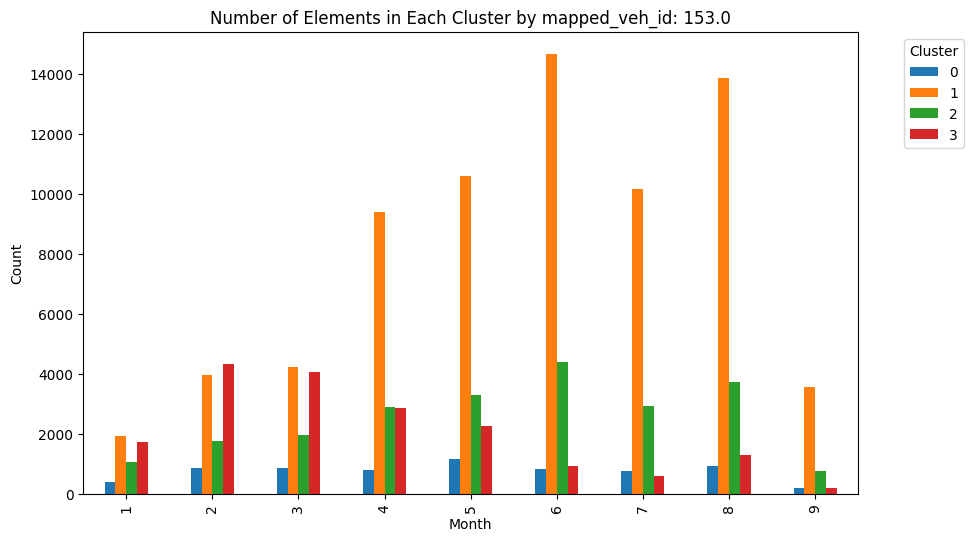

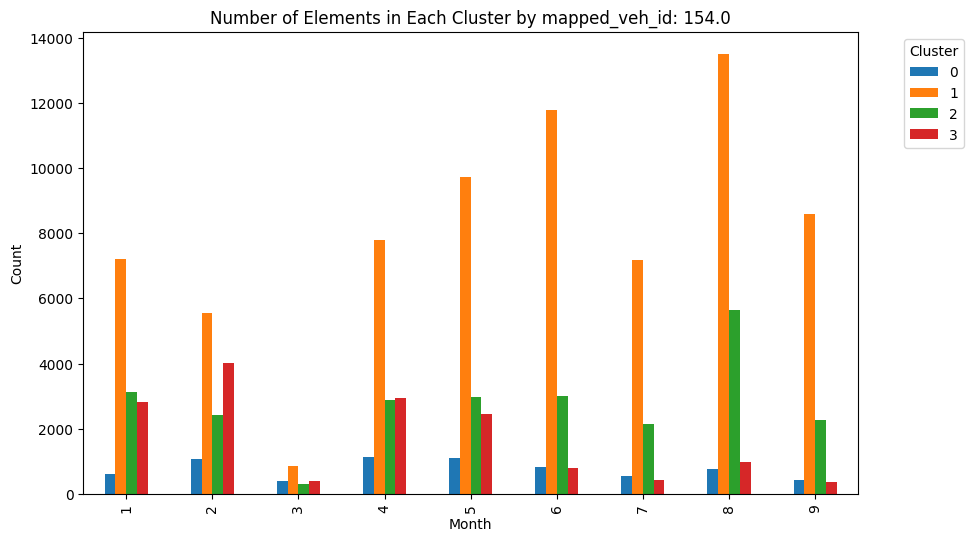

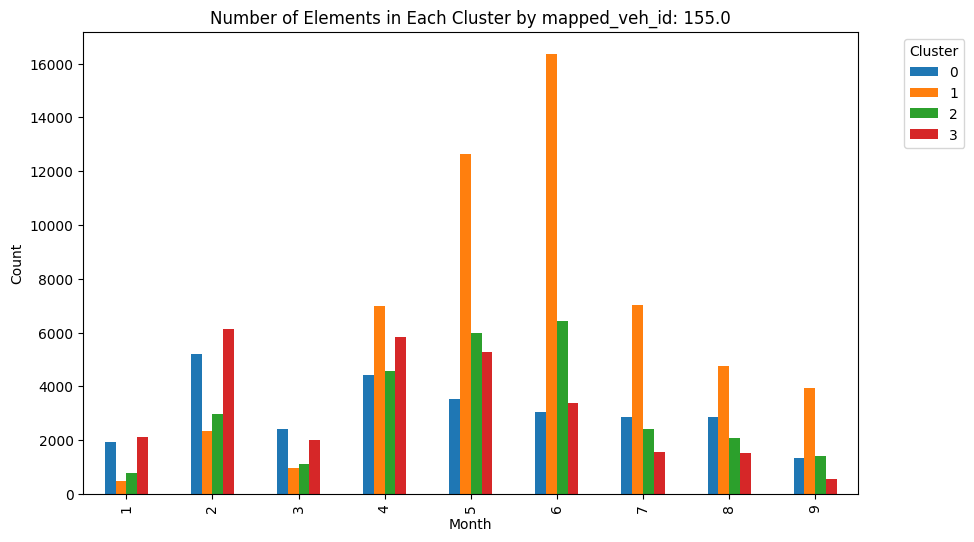

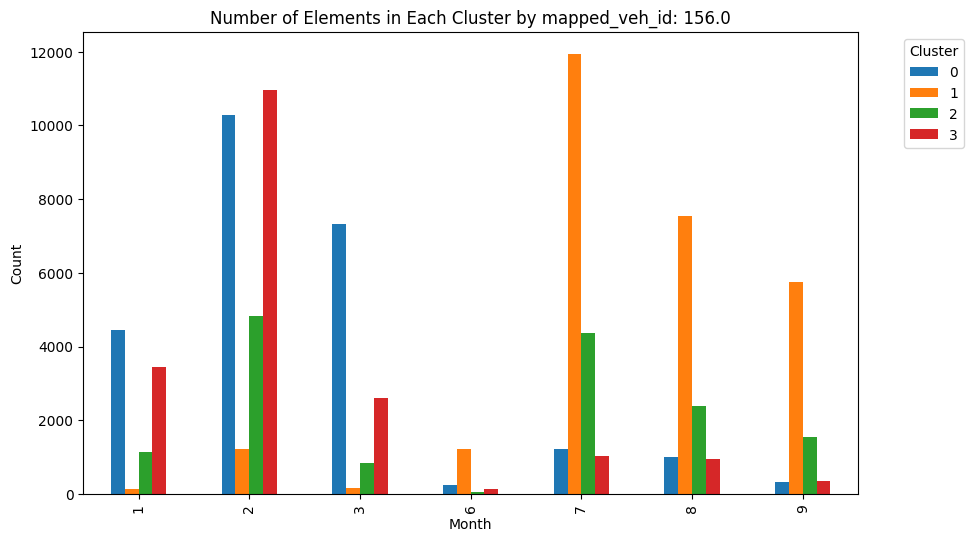

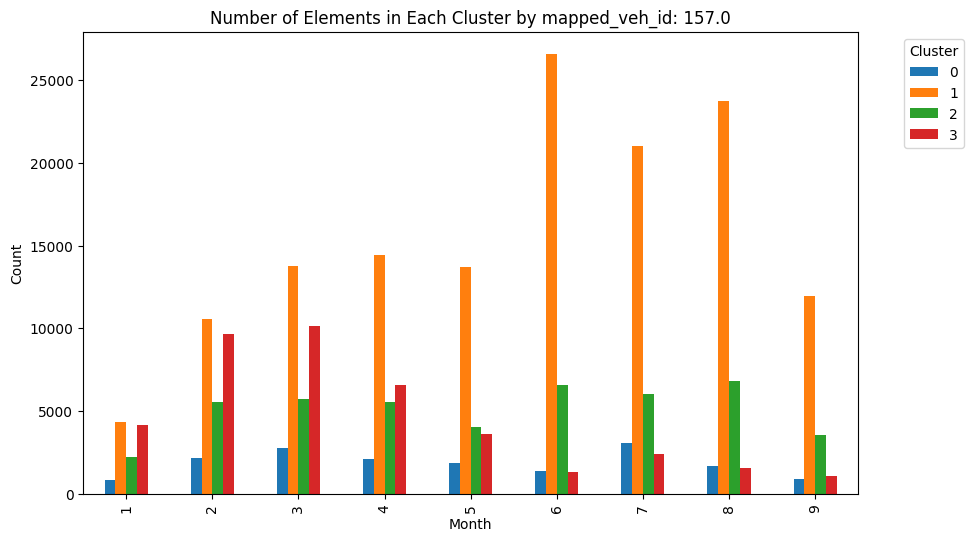

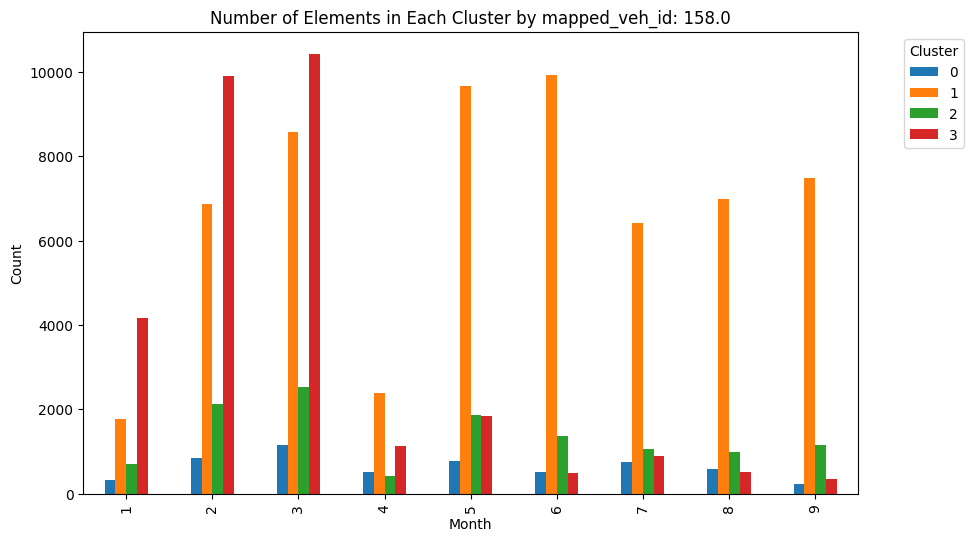

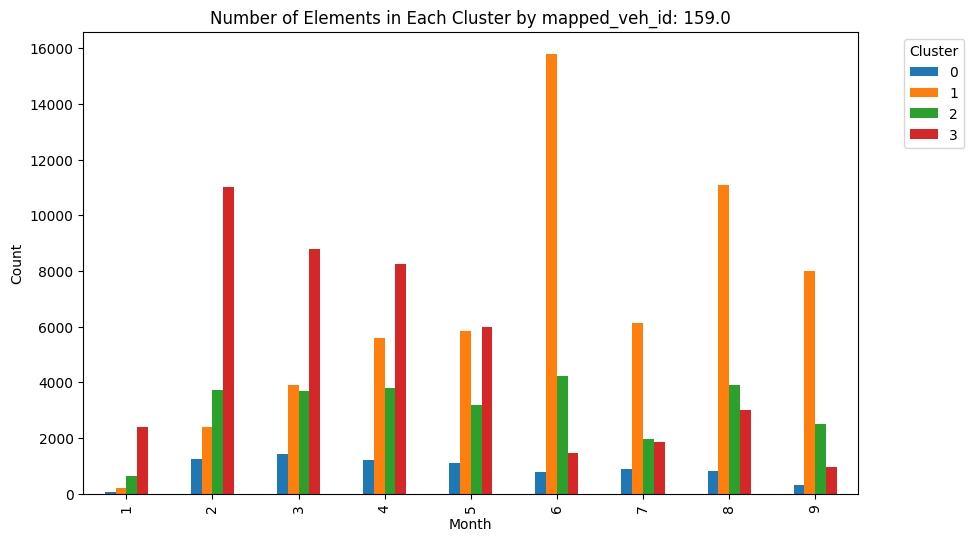

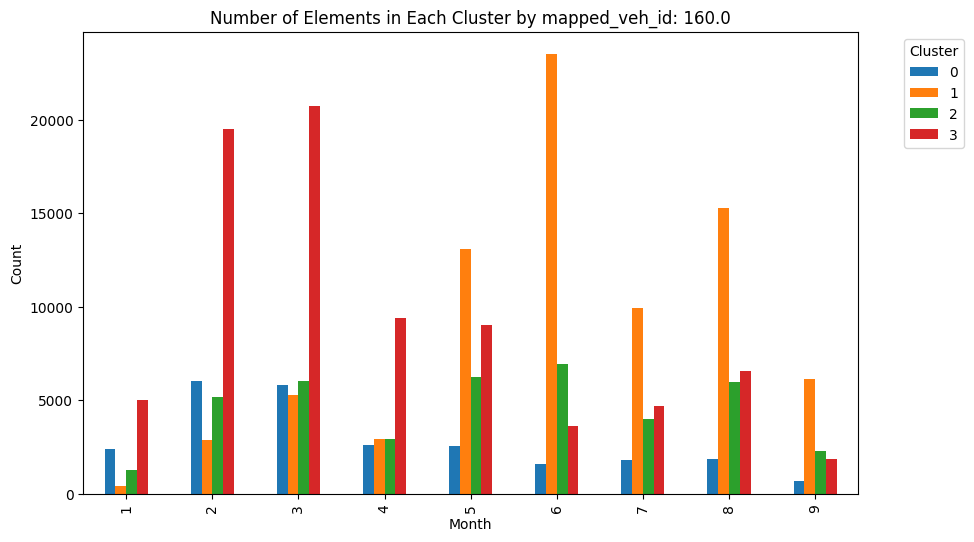

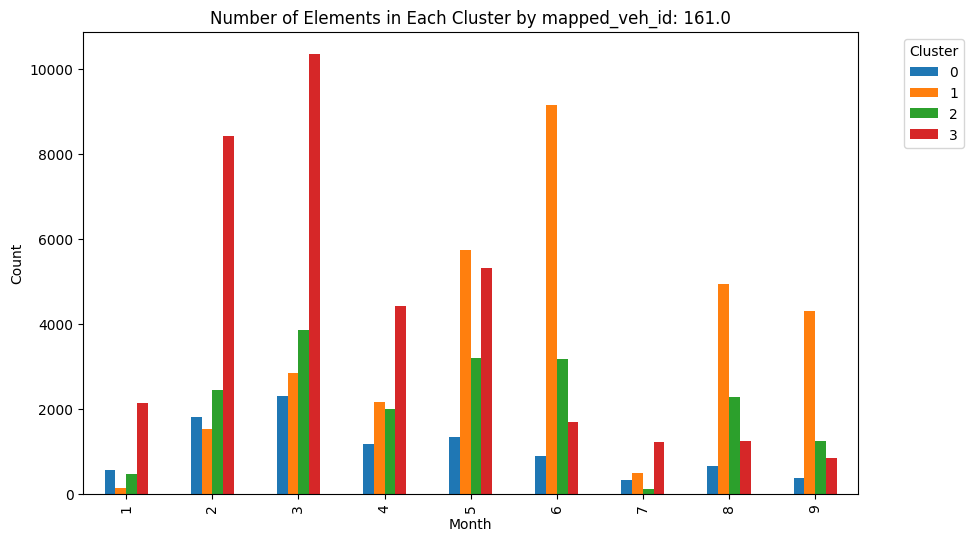

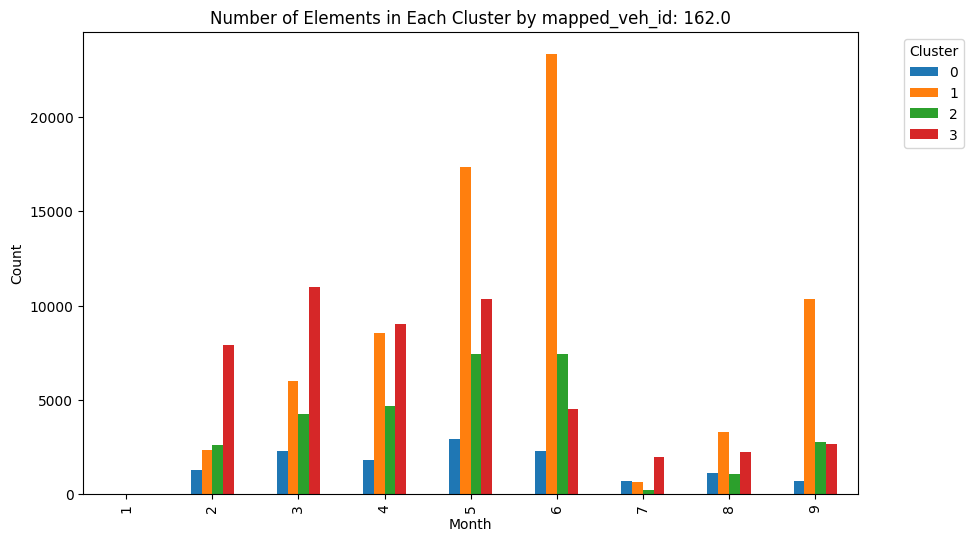

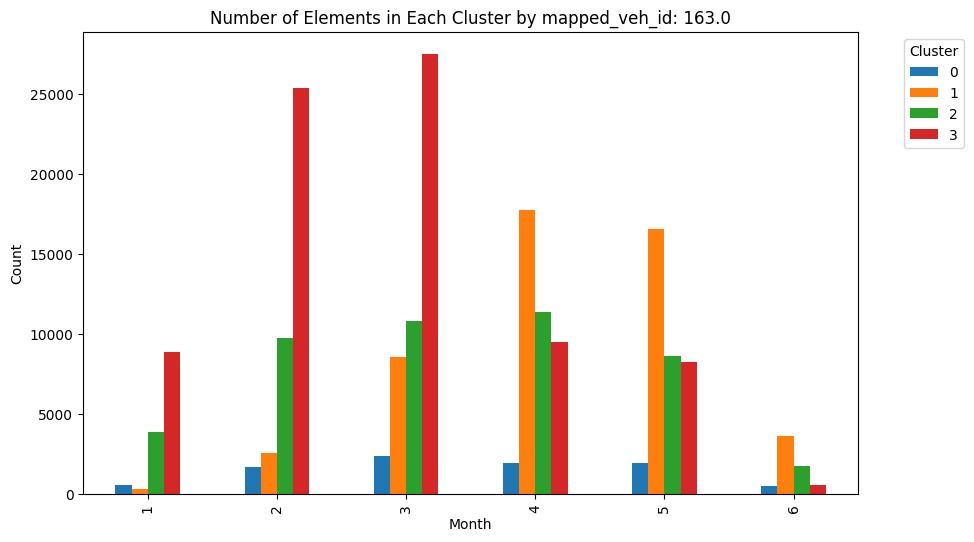

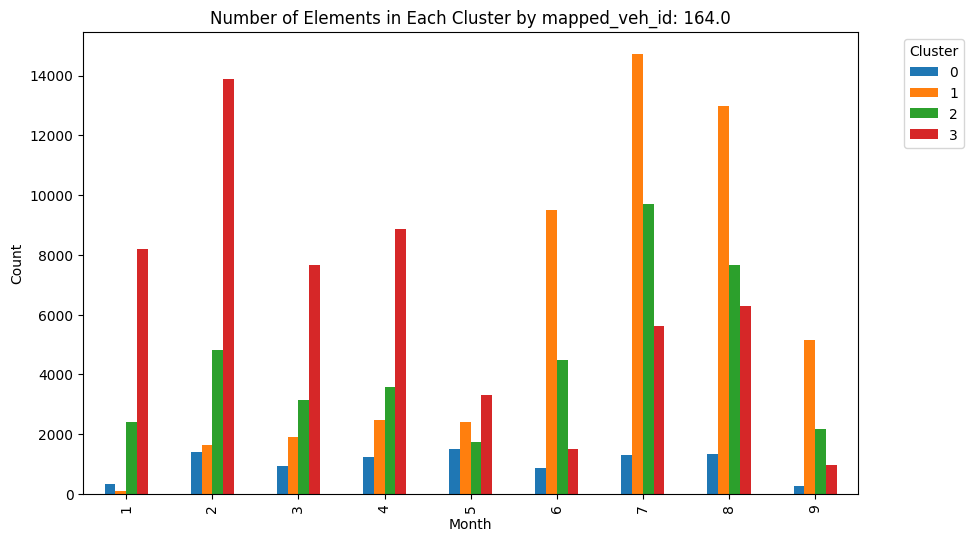

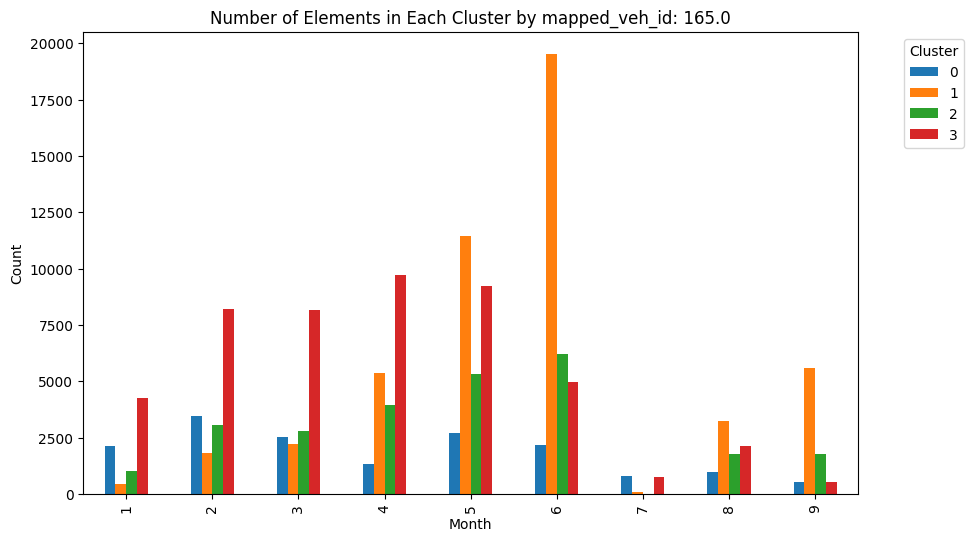

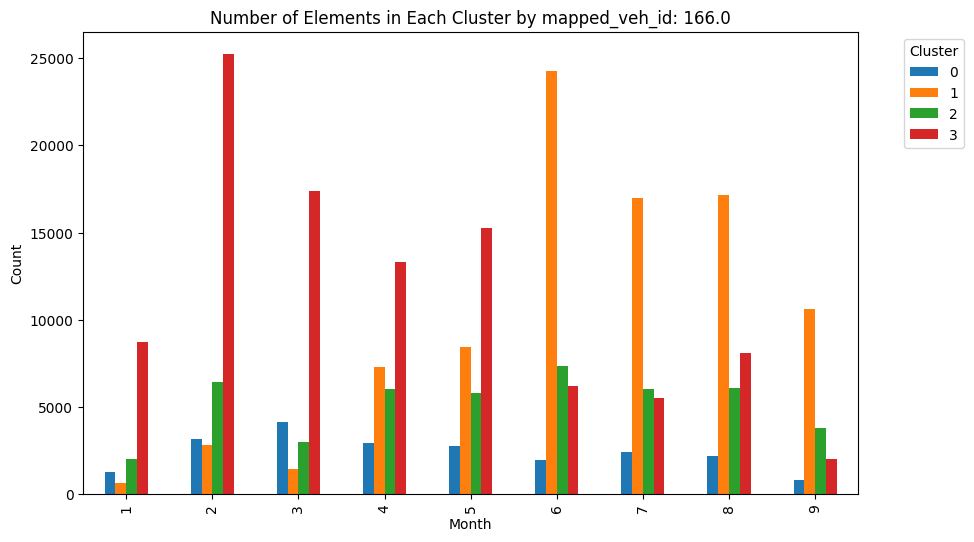

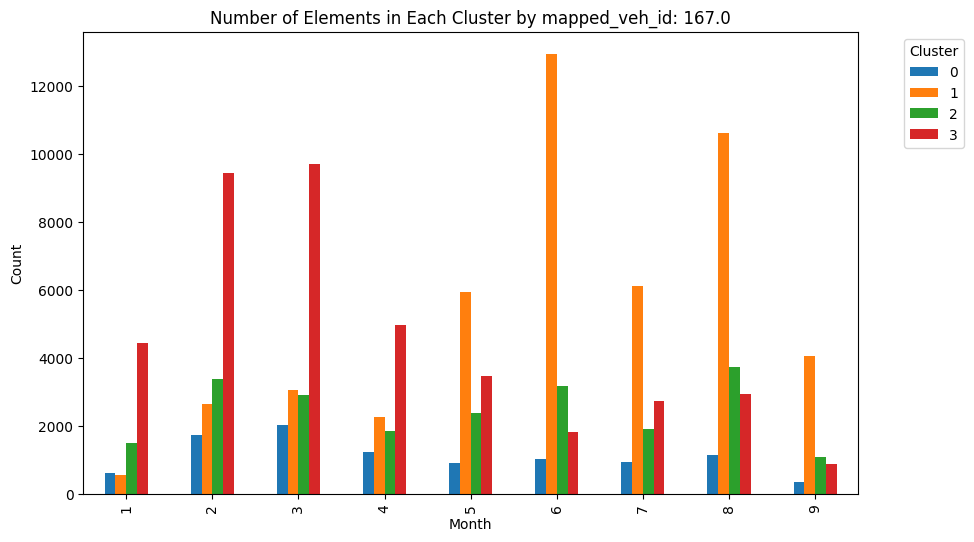

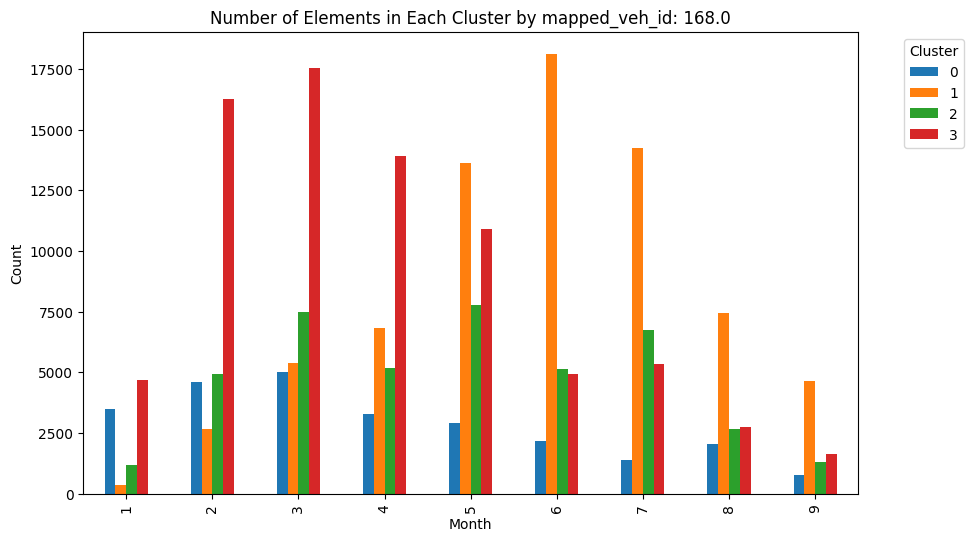

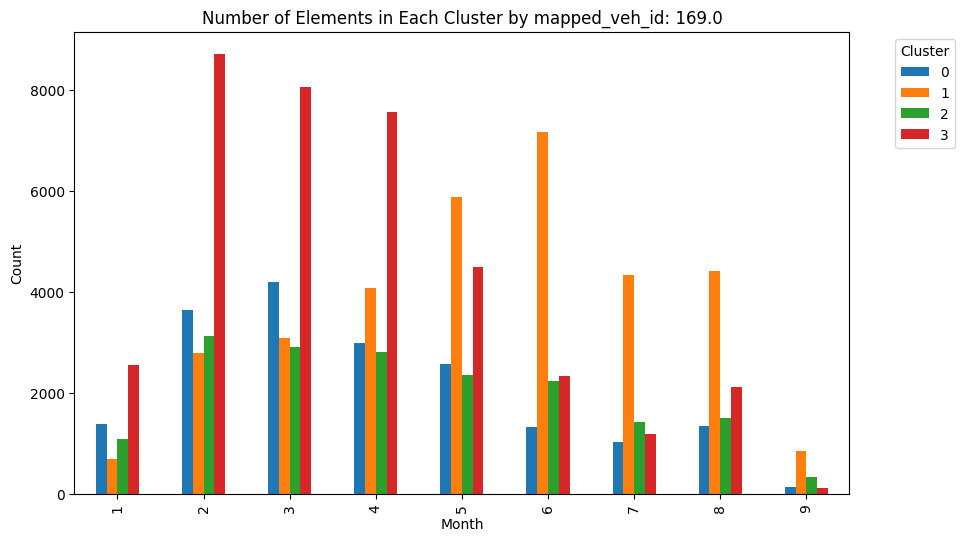

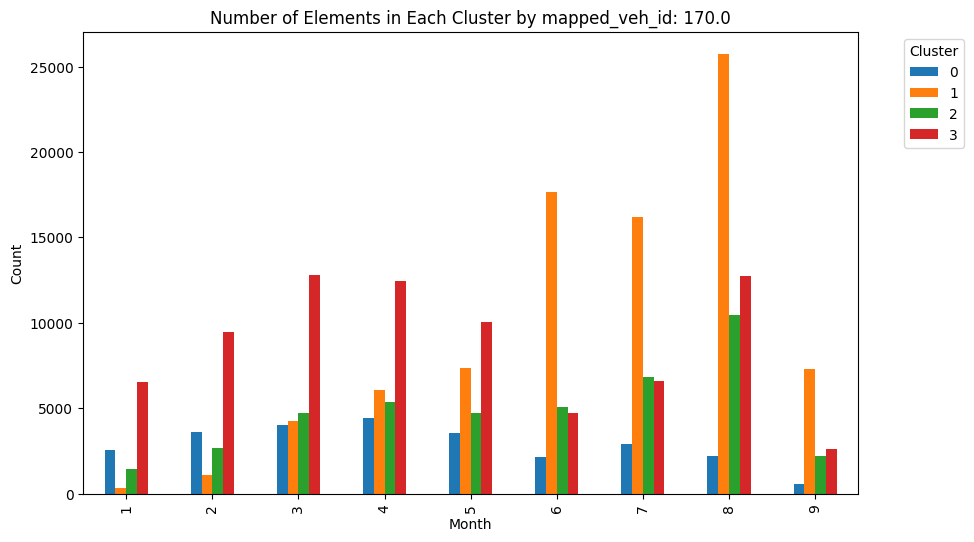

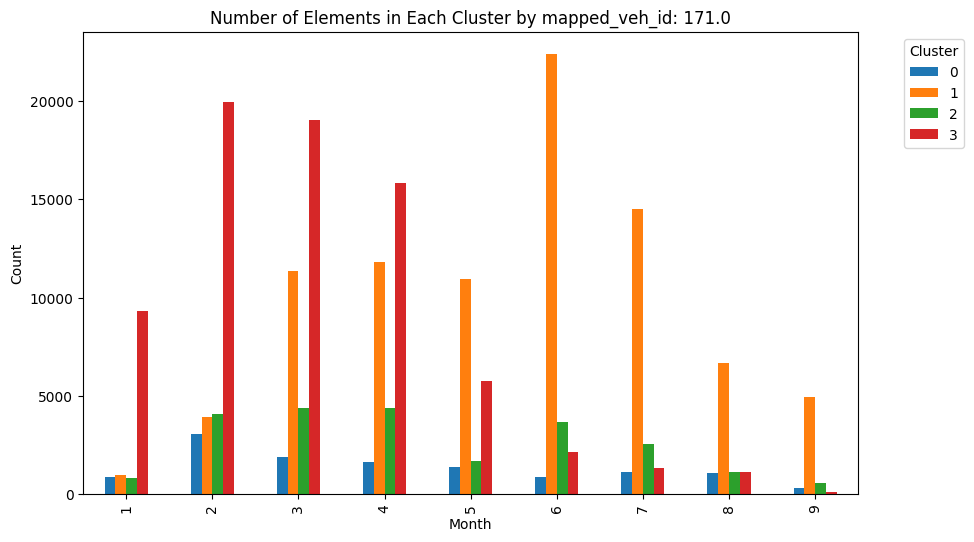

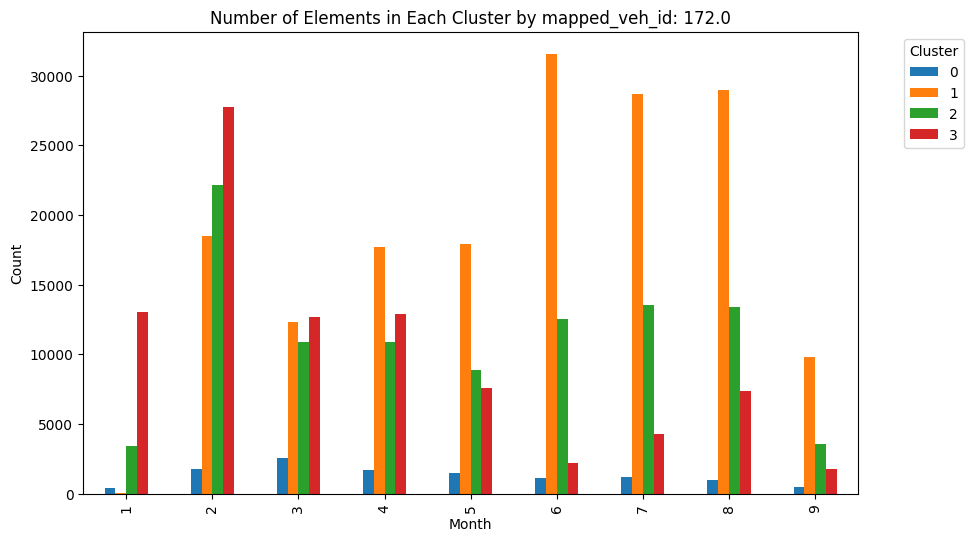

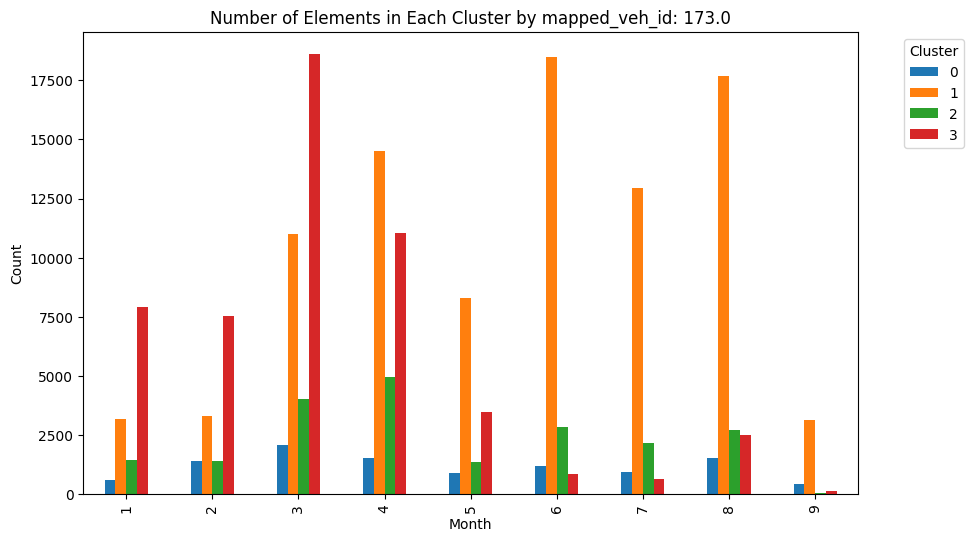

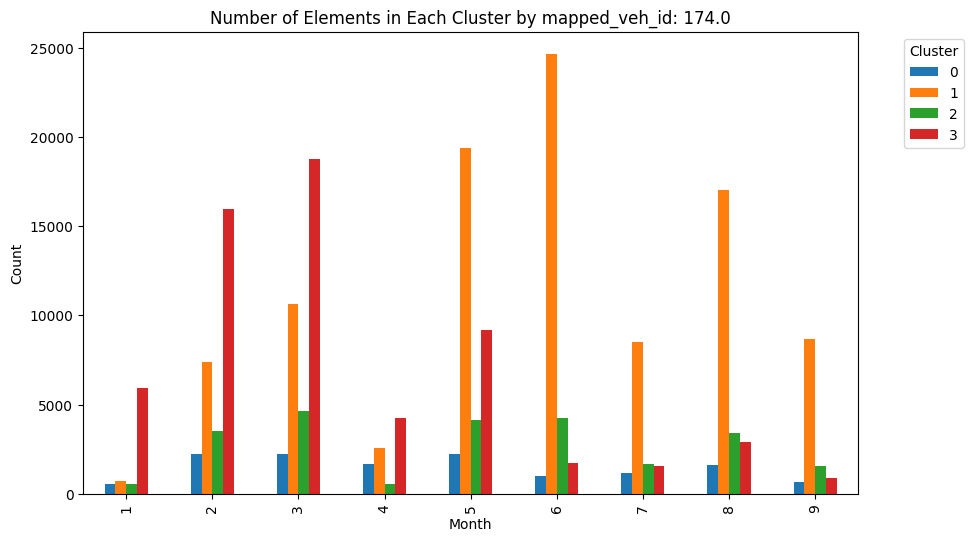

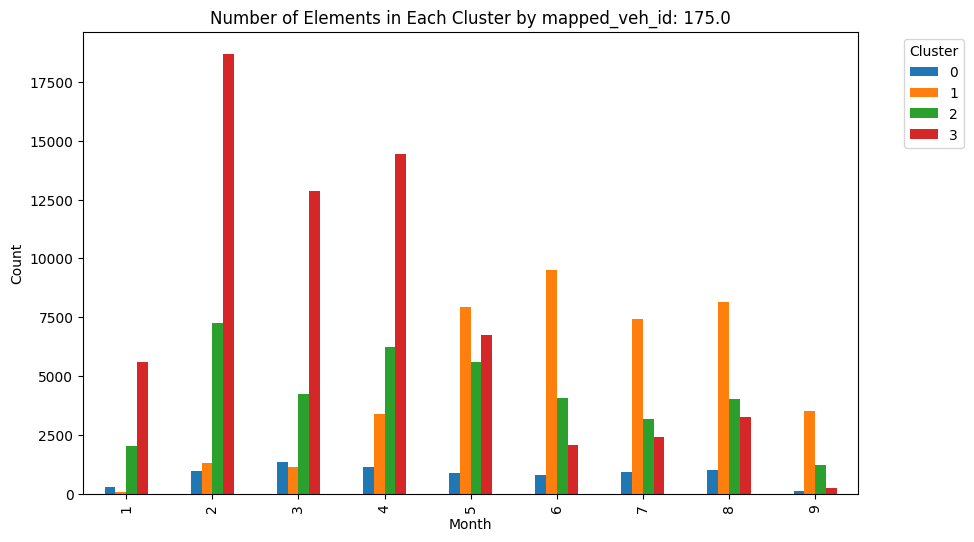

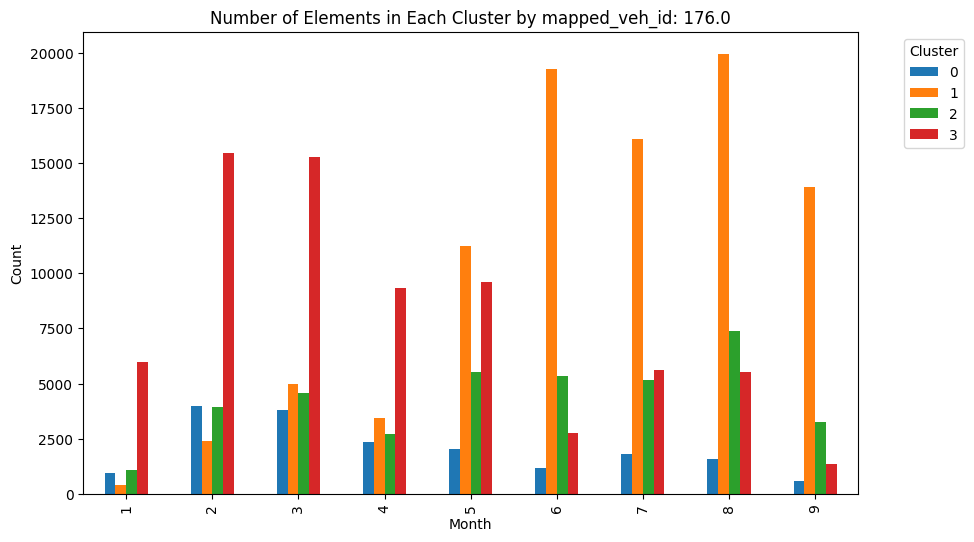

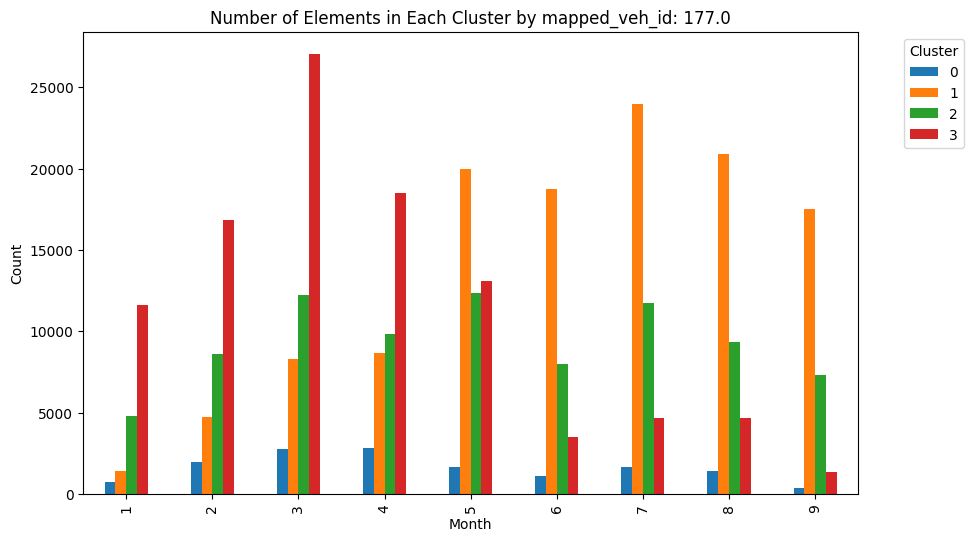

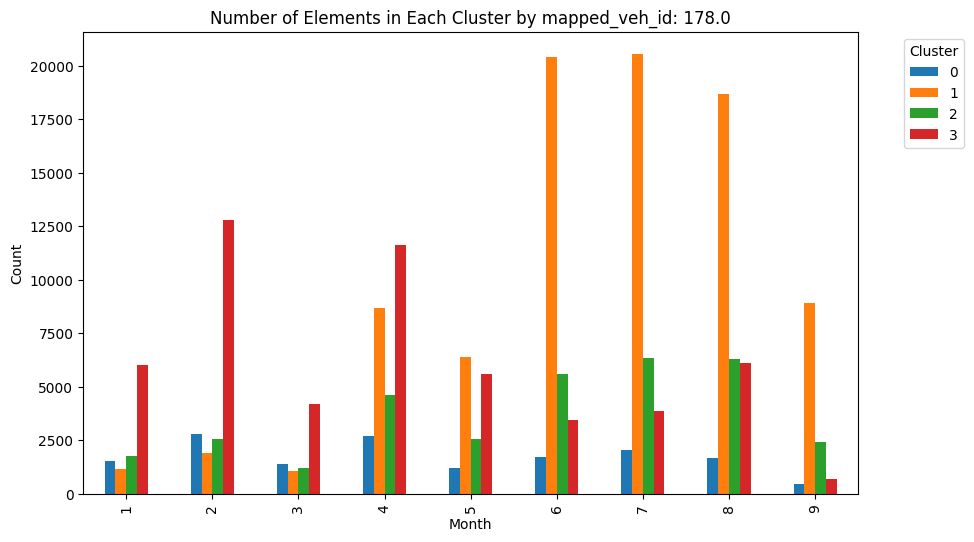

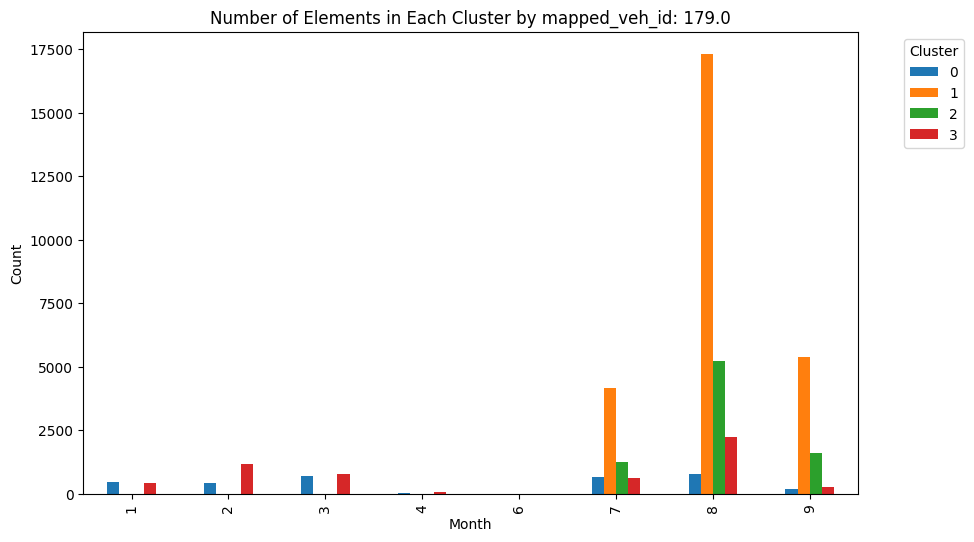

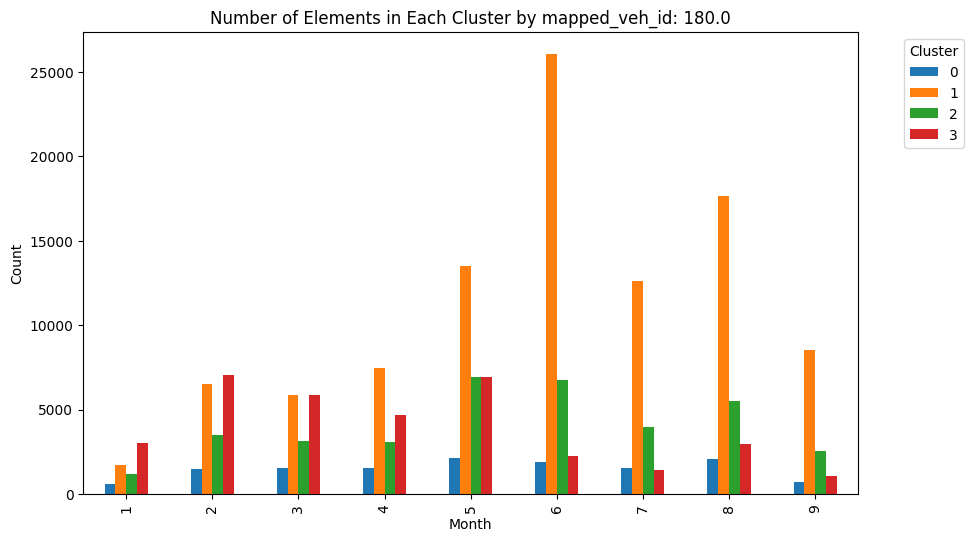

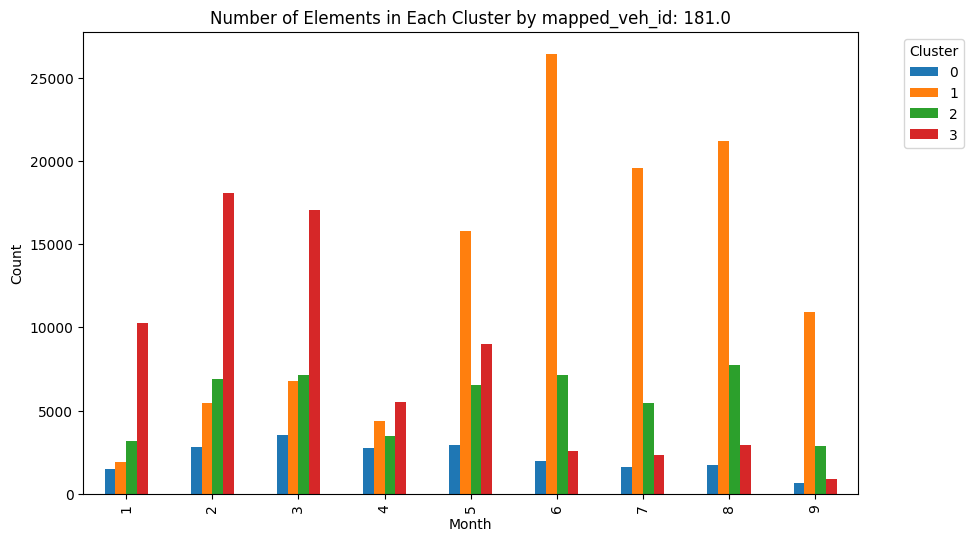

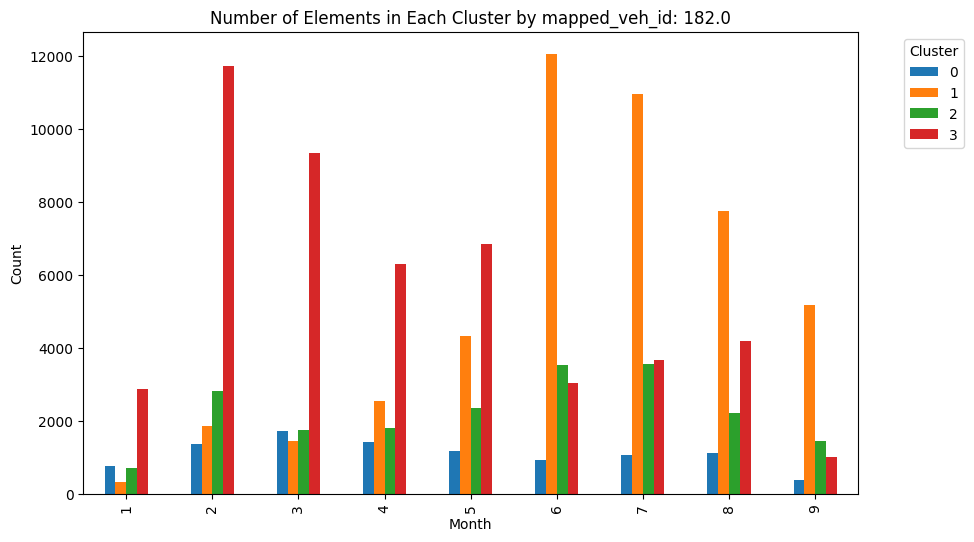

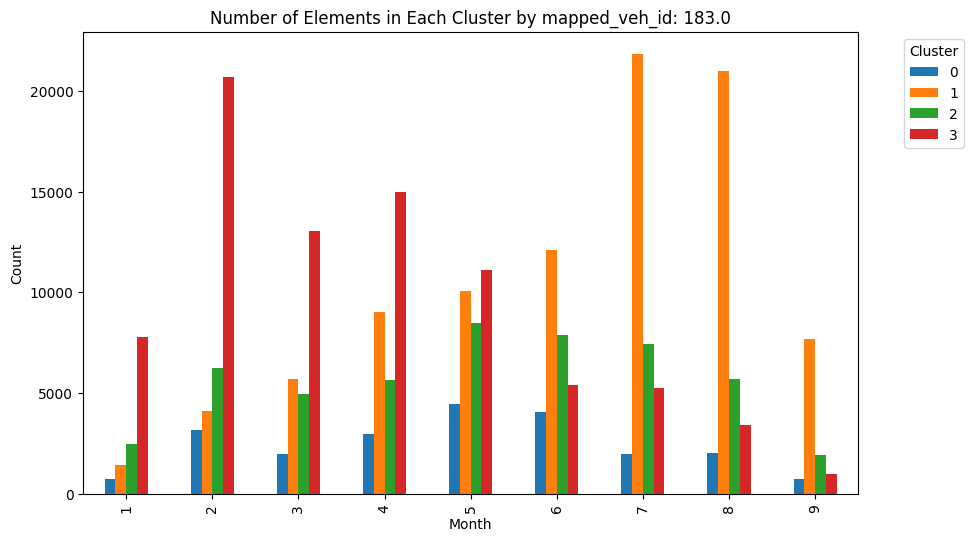

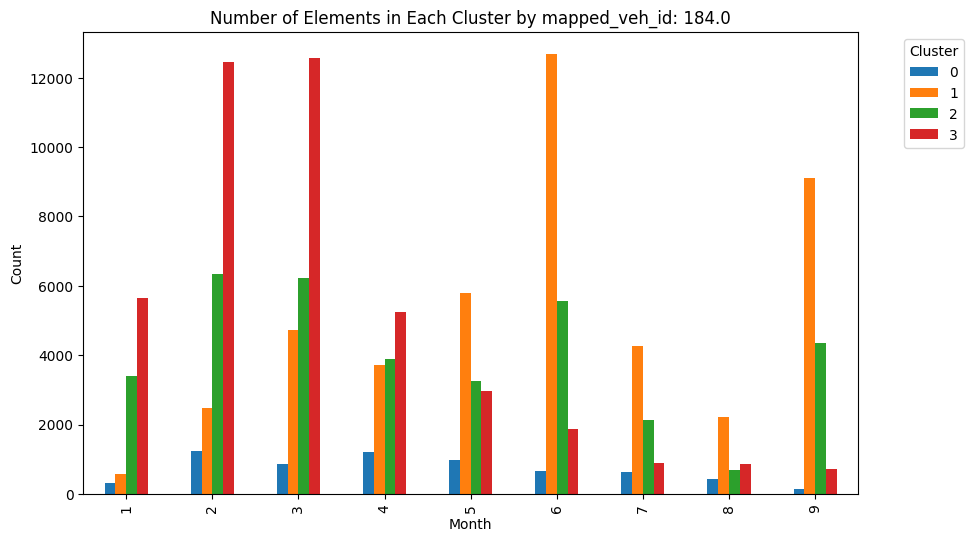

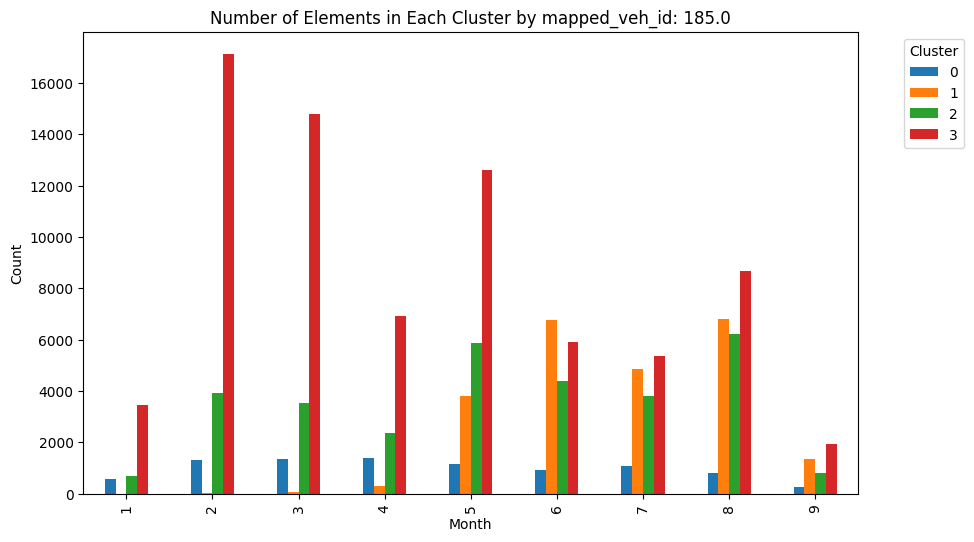

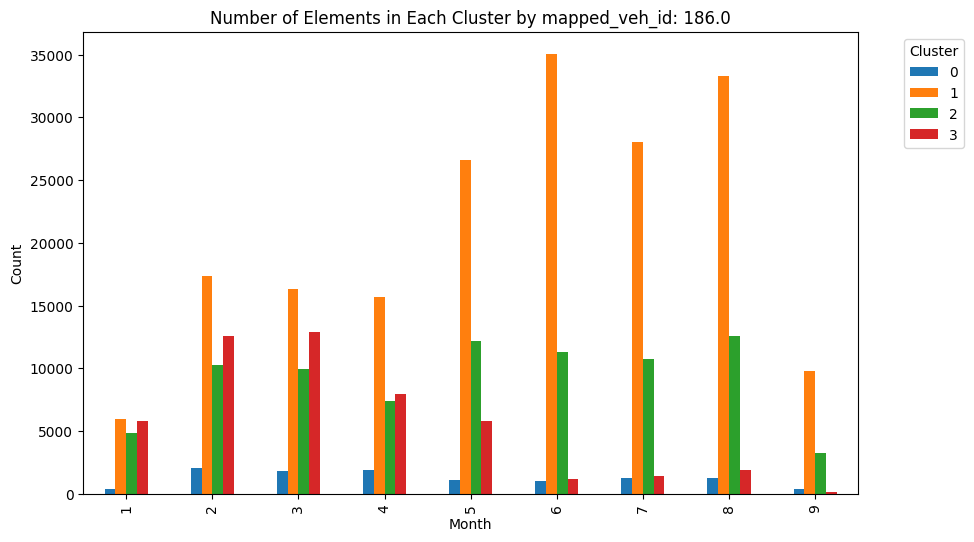

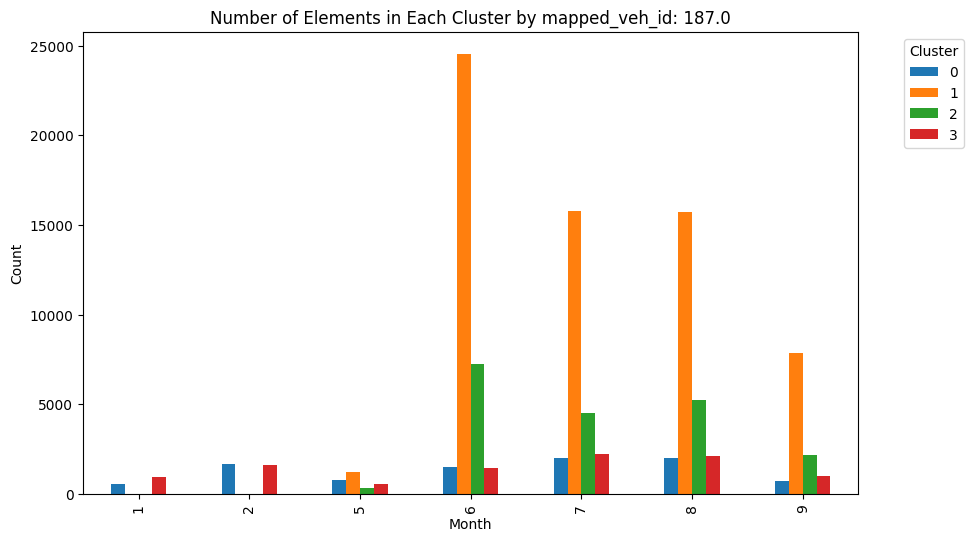

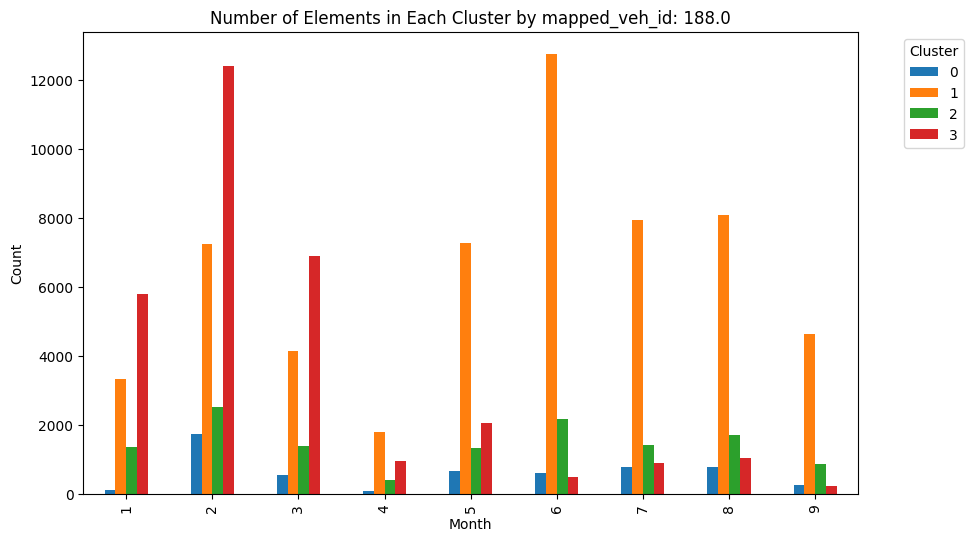

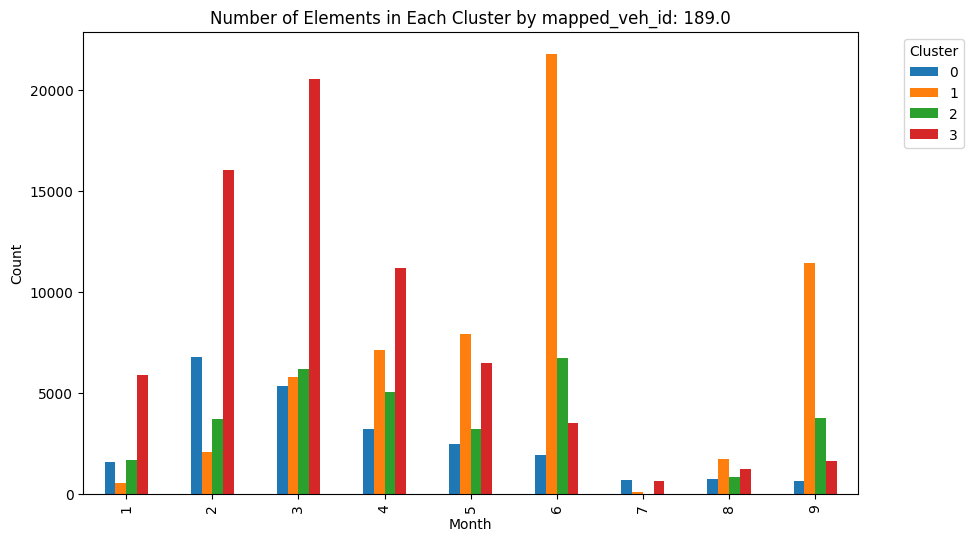

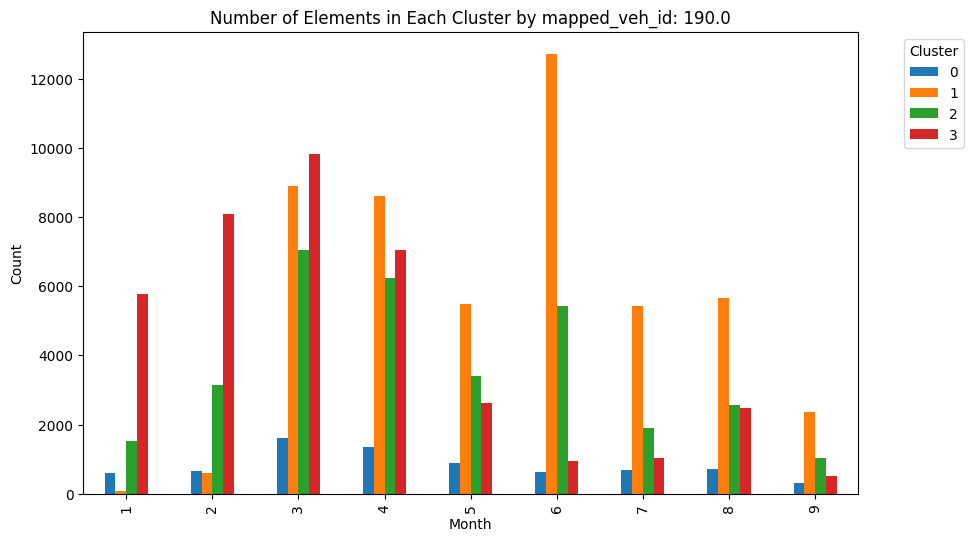

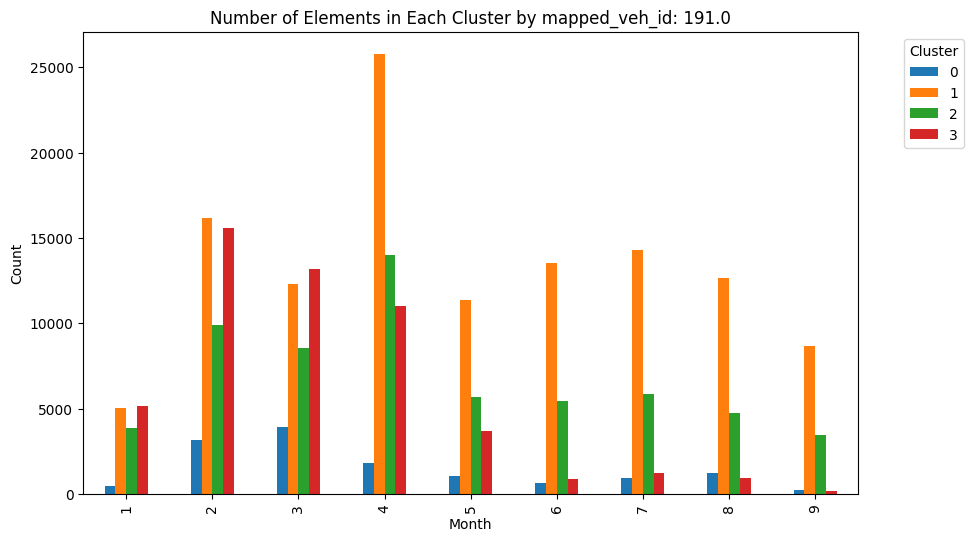

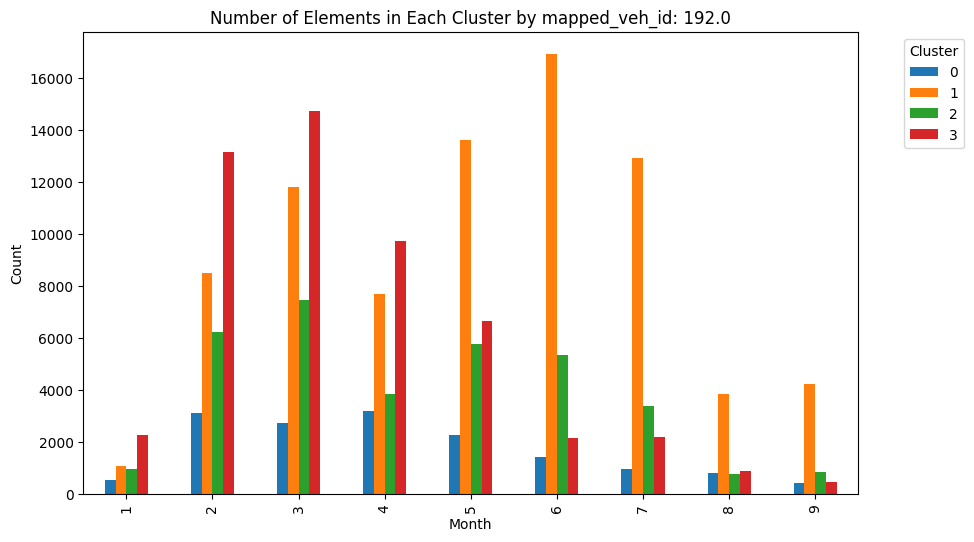

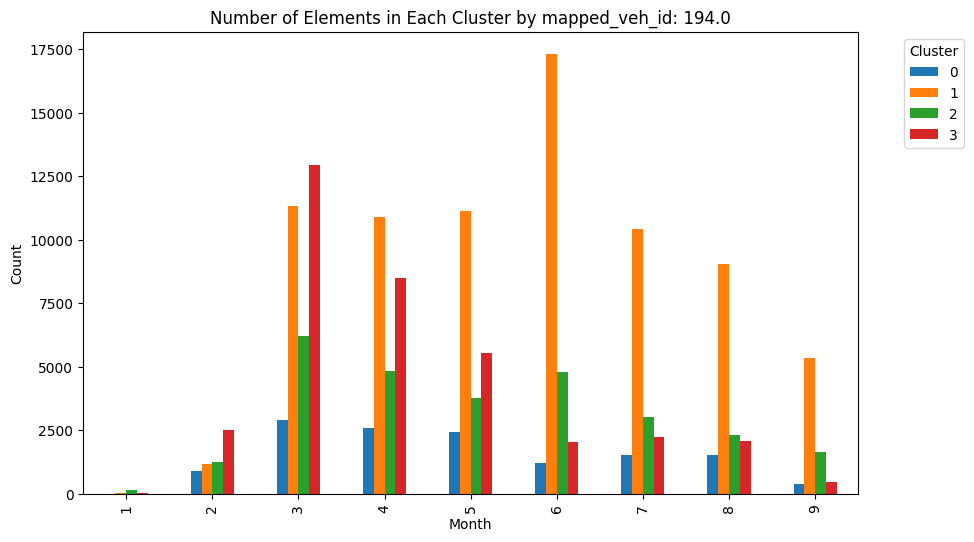

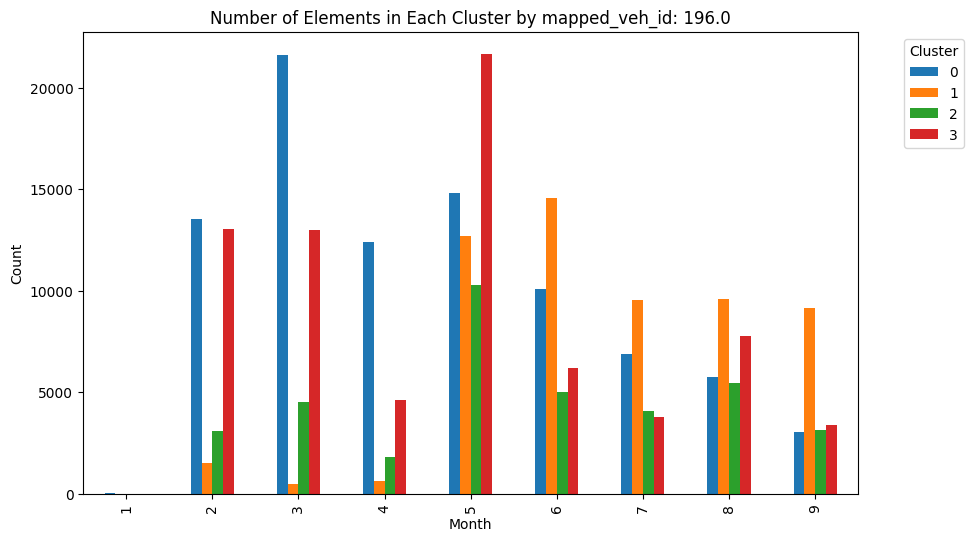

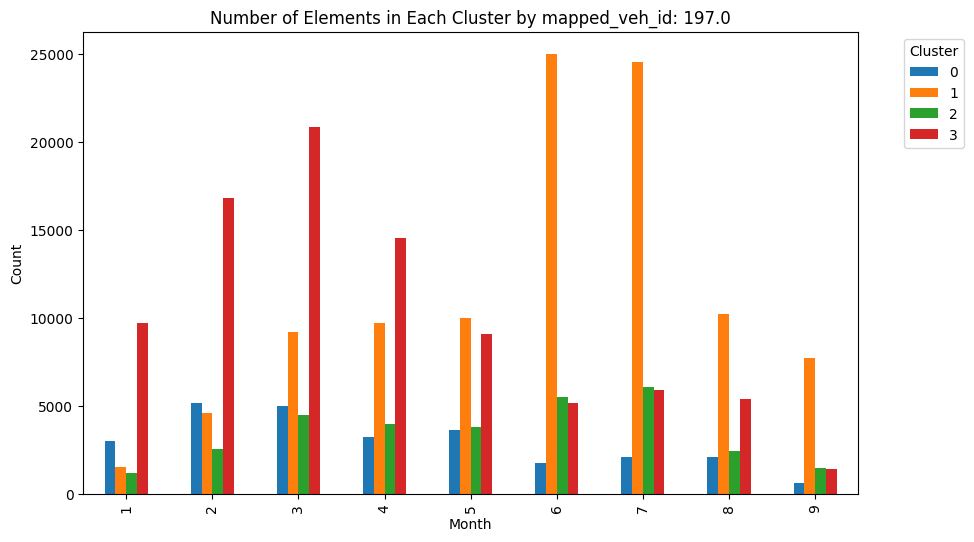

In [111]:
# Extract the month from the 'timestamps_UTC' column
data['month'] = pd.to_datetime(data['timestamps_UTC']).dt.month

# Group the data by 'mapped_veh_id', 'month', and 'cluster_Standard' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'month', 'cluster_Standard']).size().reset_index(name='count')

# Pivot the data to have 'mapped_veh_id' as the index, 'month' as the columns, 'cluster_Standard' as the sub-columns, and 'count' as the values
pivot_data = cluster_elements.pivot_table(index=['mapped_veh_id', 'month'], columns='cluster_Standard', values='count', fill_value=0)

# Plot the bar graph for each 'mapped_veh_id'
for veh_id in pivot_data.index.levels[0]:
    veh_data = pivot_data.loc[veh_id]
    veh_data.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'Number of Elements in Each Cluster by mapped_veh_id: {veh_id}')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [132]:
# Analyse in depth data from id 131
data_131 = data[data['mapped_veh_id'] == 131]
# show mean
means = data_131.mean()
print(means)
print(data_131.count())
print(data_131[data_131['RS_E_OilPress_PC2'] > 600].count())

mapped_veh_id                  131.000000
lat                             50.306776
lon                              4.447931
RS_E_InAirTemp_PC1              31.271198
RS_E_InAirTemp_PC2              32.762717
RS_E_OilPress_PC1              562.358361
RS_E_OilPress_PC2              689.873499
RS_E_RPM_PC1                   902.637087
RS_E_RPM_PC2                   905.081185
RS_E_WatTemp_PC1                79.488461
RS_E_WatTemp_PC2                79.626308
RS_T_OilTemp_PC1                75.917840
RS_T_OilTemp_PC2                77.920385
temperature                     12.250502
precipitation                    0.116939
windspeed_10m                   13.260813
sum_pollen                      17.490362
cluster_Robust                   0.127139
cluster_Standard                 1.849686
distance_to_center_Robust        6.893896
distance_to_center_Standard      5.352882
month                            4.942073
dtype: float64
timestamps_UTC                 147272
mapped_veh_id          

/var/folders/fj/rsg75z_s7cq8mvy8kr0fb2ym0000gn/T/ipykernel_20022/2094537836.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = data_131.mean()


In [140]:
# print the average oil pressure per id
means = data.groupby('mapped_veh_id').mean()
means[means['RS_E_OilPress_PC1']>400]





/var/folders/fj/rsg75z_s7cq8mvy8kr0fb2ym0000gn/T/ipykernel_20022/381878256.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby('mapped_veh_id').mean()


lat       lon  RS_E_InAirTemp_PC1  RS_E_InAirTemp_PC2  \
mapped_veh_id                                                                
131.0          50.306776  4.447931           31.271198           32.762717   
196.0          50.314700  4.451656           24.141483           25.354994   

               RS_E_OilPress_PC1  RS_E_OilPress_PC2  RS_E_RPM_PC1  \
mapped_veh_id                                                       
131.0                 562.358361         689.873499    902.637087   
196.0                 645.098983         289.215225    912.333873   

               RS_E_RPM_PC2  RS_E_WatTemp_PC1  RS_E_WatTemp_PC2  \
mapped_veh_id                                                     
131.0            905.081185         79.488461         79.626308   
196.0            906.412496         71.347812         72.102713   

               RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  temperature  precipitation  \
mapped_veh_id                                                                   
131.0                 75.917840         77.920385    12.250502       0.116939   
196.0                 72.123227         72.988356    12.635863       0.102298   

               windspeed_10m  sum_pollen  cluster_Robust  cluster_Standard  \
mapped_veh_id                                                                
131.0              13.260813   17.490362        0.127139          1.849686   
196.0              12.765873   16.813345        0.130982          1.374391   

               distance_to_center_Robust  distance_to_center_Standard  \
mapped_veh_id                                                           
131.0                           6.893896                     5.352882   
196.0                           6.984030                     4.314405   

                  month  
mapped_veh_id            
131.0          4.942073  
196.0          5.204908